<p style="font-size: 50px; font-family: 'Comic Sans MS'; background-color: #ADD8E6; color: #000080; padding: 10px; font-weight: bold; text-align: center;">MYOCARDIAL INFARCTION COMPLICATIONS</p>

In [67]:
import optuna
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#import randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [68]:
df = pd.read_csv("C:\\Users\\PC (newgear)\\Desktop\\Data\\DS\\DoAn_KTDL\\Doan_HocMay\\Myocardial infarction complications Database.csv")

In [69]:
df.shape

(1700, 124)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [71]:
df.describe()

ID          AGE          SEX     INF_ANAM    STENOK_AN  \
count  1700.000000  1692.000000  1700.000000  1696.000000  1594.000000   
mean    850.500000    61.856974     0.626471     0.554835     2.316186   
std     490.892045    11.259936     0.483883     0.836801     2.440586   
min       1.000000    26.000000     0.000000     0.000000     0.000000   
25%     425.750000    54.000000     0.000000     0.000000     0.000000   
50%     850.500000    63.000000     1.000000     0.000000     1.000000   
75%    1275.250000    70.000000     1.000000     1.000000     5.000000   
max    1700.000000    92.000000     1.000000     3.000000     6.000000   

         FK_STENOK     IBS_POST  IBS_NASL           GB   SIM_GIPERT  ...  \
count  1627.000000  1649.000000  72.00000  1691.000000  1692.000000  ...   
mean      1.205286     1.160703   0.37500     1.393258     0.033688  ...   
std       1.040814     0.801400   0.48752     1.088803     0.180478  ...   
min       0.000000     0.000000   0.00000     0.000000     0.000000  ...   
25%       0.000000     0.000000   0.00000     0.000000     0.000000  ...   
50%       2.000000     1.000000   0.00000     2.000000     0.000000  ...   
75%       2.000000     2.000000   1.00000     2.000000     0.000000  ...   
max       4.000000     2.000000   1.00000     3.000000     1.000000  ...   

         JELUD_TAH   FIBR_JELUD     A_V_BLOK    OTEK_LANC       RAZRIV  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean      0.024706     0.041765     0.033529     0.093529     0.031765   
std       0.155273     0.200110     0.180067     0.291259     0.175425   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          DRESSLER          ZSN       REC_IM    P_IM_STEN       LET_IS  
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000  
mean      0.044118     0.231765     0.093529     0.087059     0.477059  
std       0.205417     0.422084     0.291259     0.282004     1.381818  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     7.000000  

[8 rows x 124 columns]

In [72]:
df_head = df.head(20)
print(f"20 dòng đầu tiên về tập dữ liệu : {df_head}")

20 dòng đầu tiên về tập dữ liệu :     ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0    1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1    2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2    3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3    4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4    5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   
5    6  64.0    1       0.0        1.0        2.0       1.0       NaN  0.0   
6    7  70.0    1       1.0        1.0        2.0       1.0       NaN  2.0   
7    8  65.0    1       0.0        1.0        1.0       2.0       NaN  2.0   
8    9  60.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
9   10  77.0    0       2.0        0.0        0.0       0.0       NaN  3.0   
10  11  71.0    1       0.0        0.0        0.0       0.0       NaN  0.0   
11  12  50.0    0       0.0   

In [73]:
df_tail = df.tail(20)
print(f"20 dòng cuối cùng của tập dữ liệu: {df_tail}")

20 dòng cuối cùng của tập dữ liệu:         ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
1680  1681  76.0    0       0.0        4.0        2.0       1.0       NaN   
1681  1682  61.0    1       3.0        6.0        2.0       2.0       NaN   
1682  1683  61.0    0       1.0        5.0        2.0       2.0       NaN   
1683  1684  73.0    1       1.0        6.0        2.0       1.0       NaN   
1684  1685  66.0    0       0.0        5.0        1.0       1.0       NaN   
1685  1686  88.0    0       2.0        6.0        2.0       2.0       NaN   
1686  1687  85.0    1       1.0        0.0        0.0       0.0       NaN   
1687  1688  54.0    0       2.0        6.0        3.0       1.0       NaN   
1688  1689  77.0    1       1.0        5.0        2.0       2.0       NaN   
1689  1690  53.0    1       1.0        NaN        NaN       2.0       NaN   
1690  1691  77.0    1       0.0        0.0        0.0       0.0       NaN   
1691  1692  62.0    1       0.0        0.

In [74]:
df.dtypes

ID             int64
AGE          float64
SEX            int64
INF_ANAM     float64
STENOK_AN    float64
              ...   
DRESSLER       int64
ZSN            int64
REC_IM         int64
P_IM_STEN      int64
LET_IS         int64
Length: 124, dtype: object

In [75]:
df.isnull().sum()

ID             0
AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 124, dtype: int64

In [76]:
df.columns

Index(['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT',
       ...
       'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV',
       'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'],
      dtype='object', length=124)

<p style="font-family: 'Comic Sans MS';padding: 10px; font-weight: bold;">Sơ lược về chữ viết tắt trong tập dữ liệu</p>
<ul style="font-family: 'Comic Sans MS';padding: 10px; font-weight: bold;">
    <p>Bảng viết tắt các từ trong tập dữ liệu</p>
    <li>FC là lớp chức năng của đau thắt ngực trong năm qua theo Campeau, L., 1976. Phân loại đau thắt ngực. Circulation, 54(3), tr.522-523.</li>
    <li>CHD là bệnh tim mạch vành.</li>
    <li>HF là suy tim.</li>
    <li>ECG là điện tâm đồ.</li>
    <li>AV là block nhĩ thất.</li>
    <li>LBBB là block nhánh trái.</li>
    <li>RBBB là block nhánh phải.</li>
    <li>QRS là phức hợp QRS trong ECG.</li>
    <li>IU là đơn vị quốc tế.</li>
    <li>ICU là khoa chăm sóc đặc biệt.</li>
    <li>ESR là tốc độ lắng hồng cầu./li>
    <li>NSAID là thuốc chống viêm không steroid.</li>
</ul>
</p>

<p style="font-family: 'Comic Sans MS';padding: 10px; font-weight: bold;">Sơ lược về 123 biến trong tập dữ liệu</p>
<ul style="font-family: 'Comic Sans MS';padding: 10px; font-weight: bold;">
    <p>Thuộc tính trong tập dữ liệu</p> </br>
    <li>ID hồ sơ (ID): Mã định danh duy nhất. Không thể liên quan đến người tham gia.</li>
    <li>Tuổi (AGE): Tuổi thực của bệnh nhân.</li>
    <li>Giới tính (SEX): Danh nghĩa:
    Ca bệnh Phân số
    0: nữ 635 37,35%
    1: nam 1065 62,65%</li>
    <li>Số lượng nhồi máu cơ tim trong tiền sử (INF_ANAM): Thứ tự
Ca bệnh Phân số
0: không 1060 62,35%
1: một 410 24,12%
2: hai 147 8,65%
3: ba trở lên 79 4,65%
Thiếu 4 0,24%</li>
    <li>Đau thắt ngực gắng sức trong tiền sử (STENOK_AN): Thứ tự
Ca bệnh Phân số
0: không bao giờ 661 38,88%
1: trong năm ngoái 146 8,59%
2: một năm trước 137 8,06%
3: hai năm trước 117 6,88%
4: ba năm trước 76 4,47%
5: 4-5 năm trước 125 7,35%
6: hơn 5 năm trước 332 19,53%
Thiếu 106 6,24%</li>
    <li>Lớp chức năng (FC) của đau thắt ngực trong năm qua (FK_STENOK): Thứ tự
Các trường hợp Phân số
0: không có đau thắt ngực 661 38,88%
1: I FC 47 2,76%
2: II FC 854 50,24%
3: III FC 54 3,18%
4: IV FC 11 0,65%
Thiếu 73 4,29%</li>
    <li>Bệnh tim mạch vành (CHD) trong những tuần gần đây, những ngày trước khi nhập viện (IBS_POST): Thứ tự
Các trường hợp Phân số
0: không có Ð¡HD 418 24,59%
1: đau thắt ngực khi gắng sức 548 32,24%
2: đau thắt ngực không ổn định 683 40,18%
Thiếu 51 3,00%</li>
    <li>Di truyền về CHD (IBS_NASL): Danh nghĩa
Các trường hợp Phân số
0: không bị gánh nặng 45 2,65%
1: bị gánh nặng 27 1,59%
Thiếu 1628 95,76%</li>
    <li>Có tăng huyết áp vô căn (GB): Thứ tự
Các trường hợp Phân số
0: không có tăng huyết áp vô căn 605 35,59%
1: Giai đoạn 1 11 0,65%
2: Giai đoạn 2 880 51,76%
3: Giai đoạn 3 195 11,47%
Thiếu 9 0,53%</li>
    <li>Tăng huyết áp có triệu chứng (SIM_GIPERT): Danh nghĩa
Các trường hợp Phân số
0: không 1635 96,18%
1: có 57 3,35%
Thiếu 8 0,47%</li>
    <li>Thời gian tăng huyết áp động mạch (DLIT_AG): Thứ tự
Các trường hợp Phân số
0: không có tăng huyết áp động mạch 551 32,41%
1: một năm 93 5,47%
2: hai năm 58 3,41%
3: ba năm 58 3,41%
4: bốn năm 22 1,29%
5: năm năm 73 4,29%
6: 6-10 năm 165 9,71%
7: hơn 10 năm 432 25,41%
Thiếu 248 14,59%</li>
    <li>Có suy tim mạn tính (HF) ở tiền sử bệnh (ZSN_A): Thuộc tính được sắp xếp một phần: có hai dòng mức độ nghiêm trọng:
0<1<2<4,
0<1<3<4.
Trạng thái 4 có nghĩa là trạng thái đồng thời 2 và 3
Tỷ lệ ca bệnh
0: không có suy tim mạn tính 1468 86,35%
1: Giai đoạn I 103 6,06%
2: Giai đoạn IIÐ (suy tim do rối loạn chức năng tâm thu thất phải) 27 1,59%
3: Giai đoạn IIÐ (suy tim do rối loạn chức năng tâm thu thất trái) 29 1,71%
4: Giai đoạn IIB (suy tim do rối loạn chức năng tâm thu thất trái và
phải) 19 1,12%
Thiếu 54 3,18%.</li>
    <li>Quan sát thấy loạn nhịp tim trong tiền sử (nr11): Danh nghĩa
Tỷ lệ ca bệnh
0: không 1637 96,29%
1: có 42 2,47%
Thiếu 21 1,24%.</li>
    <li>Co thắt nhĩ sớm trong tiền sử (nr01): Danh nghĩa
Các trường hợp Phân số
0: không 1675 98,53%
1: có 4 0,24%
Thiếu 21 1,24%.</li>
    <li>Co thắt thất sớm trong tiền sử (nr02): Danh nghĩa
Các trường hợp Phân số
0: không 1660 97,65%
1: có 19 1,12%
Thiếu 21 1,24%.</li>
    <li>Cơn rung nhĩ kịch phát trong tiền sử (nr03): Danh nghĩa
Các trường hợp Phân số
0: không 1644 96,71%
1: có 35 2,06%
Thiếu 21 1,24%.</li>
    <li>Một dạng rung nhĩ dai dẳng trong tiền sử (nr04): Danh nghĩa
Các trường hợp Phân số
0: không 1650 97,06%
1: có 29 1,71%
Thiếu 21 1,24%.</li>
    <li>Rung thất trong tiền sử (nr07): Danh nghĩa
Các trường hợp Phân số
0: không 1678 98,71%
1: có 1 0,06%
Thiếu 21 1,24%.</li>
    <li>Nhịp nhanh kịch phát thất trong tiền sử (nr08): Danh nghĩa
Các trường hợp Phân số
0: không 1675 98,53%
1: có 4 0,24%
Thiếu 21 1,24%.</li>
    <li>Block AV độ một trong tiền sử (np01): Danh nghĩa
Các trường hợp Phân số
0: không 1680 98,82%
1: có 2 0,12%
Thiếu 18 1,06%.</li>
    <li>Block AV độ ba trong tiền sử (np04): Danh nghĩa
Các trường hợp Phân số
0: không 1679 98,76%
1: có 3 0,18%
Thiếu 18 1,06%.</li>
    <li>LBBB (nhánh trước) trong tiền sử (np05): Danh nghĩa
Các trường hợp Phân số
0: không 1671 98,29%
1: có 11 0,65%
Thiếu 18 1,06%.</li>
    <li>LBBB không đầy đủ trong tiền sử (np07): Danh nghĩa
Các trường hợp Phân số
0: không 1681 98,88%
1: có 1 0,06%
Thiếu 18 1,06%.</li>
    <li>LBBB đầy đủ trong tiền sử (np08): Danh nghĩa
Các trường hợp Phân số
0: không 1676 98,59%
1: có 6 0,35%
Thiếu 18 1,06%.</li>
    <li>RBBB không đầy đủ trong tiền sử (np09): Danh nghĩa
Các trường hợp Phân số
0: không 1680 98,82%
1: có 2 0,12%
Thiếu 18 1,06%.</li>
    <li>RBBB hoàn chỉnh trong tiền sử (np10): Danh nghĩa
Các trường hợp Phân số
0: không 1679 98,76%
1: có 3 0,18%
Thiếu 18 1,06%.</li>
    <li>Đái tháo đường trong tiền sử (endocr_01): Danh nghĩa
Các trường hợp Phân số
0: không 1461 85,94%
1: có 228 13,41%
Thiếu 11 0,65%.</li>
    <li>Béo phì trong tiền sử (endocr_02): Danh nghĩa
Các trường hợp Phân số
0: không 1648 96,94%
1: có 42 2,47%
Thiếu 10 0,59%.</li>
    <li>Cường giáp trong tiền sử (endocr_03): Danh nghĩa
Ca bệnh Phân số
0: không 1677 98,65%
1: có 13 0,76%
Thiếu 10 0,59%.</li>
    <li>Viêm phế quản mãn tính trong tiền sử (zab_leg_01): Danh nghĩa
Ca bệnh Phân số
0: không 1559 91,71%
1: có 13</li>
    <li>Viêm phế quản mạn tính tắc nghẽn trong tiền sử (zab_leg_02): Danh nghĩa
Ca bệnh Phân số
0: không 1572 92,47%
1: có 121 7,12%
Thiếu 7 0,41%</li>
    <li>Hen phế quản trong tiền sử (zab_leg_03): Danh nghĩa
Ca bệnh Phân số
0: không 1656 97,41%
1: có 37 2,18%
Thiếu 7 0,41%</li>
    <li>Viêm phổi mạn tính trong tiền sử (zab_leg_04): Danh nghĩa
Ca bệnh Phân số
0: không 1684 99,06%
1: có 9 0,53%
Thiếu 7 0,41%</li>
    <li>Lao phổi trong tiền sử (zab_leg_06): Danh nghĩa
Ca bệnh Phân số
0: không 1684 99,06%
1: có 9 0,53%
Thiếu 7 0,41%</li>
    <li>Huyết áp tâm thu theo Nhóm tim mạch cấp cứu (S_AD_KBRIG) (mmHg): Thực.</li>
    <li>Huyết áp tâm trương theo Nhóm tim mạch cấp cứu (D_AD_KBRIG) (mmHg): Thực.</li>
    <li>Huyết áp tâm thu theo đơn vị chăm sóc đặc biệt (S_AD_ORIT) (mmHg): Thực.</li>
    <li>Huyết áp tâm trương theo đơn vị chăm sóc đặc biệt (D_AD_ORIT) (mmHg): Thực.</li>
    <li>Phù phổi tại thời điểm nhập khoa chăm sóc đặc biệt (O_L_POST): Danh nghĩa
Ca bệnh Tỷ lệ
0: không 1578 92,82%
1: có 110 6,47%
Thiếu 12 0,71%</li>
    <li>Sốc tim tại thời điểm nhập khoa chăm sóc đặc biệt (K_SH_POST): Danh nghĩa
Ca bệnh Tỷ lệ
0: không 1639 96,41%
1: có 46 2,71%
Thiếu 15 0,88%</li>
    <li>Cơn rung nhĩ kịch phát tại thời điểm nhập khoa chăm sóc đặc biệt (hoặc ở giai đoạn trước khi nhập viện) (MP_TP_POST): Danh nghĩa
Ca bệnh Tỷ lệ
0: không 1572 92,47%
1: có 114 6,71%
Thiếu 14 0,82%</li>
    <li>Cơn nhịp nhanh thất kịch phát tại thời điểm nhập viện (hoặc ở giai đoạn trước khi nhập viện) (SVT_POST): Danh nghĩa
Các trường hợp Phân số
0: không 1680 98,82%
1: có 8 0,47%
Thiếu 12 0,71%</li>
    <li>Cơn nhịp nhanh thất kịch phát tại thời điểm nhập viện (hoặc ở giai đoạn trước khi nhập viện) (GT_POST): Danh nghĩa
Các trường hợp Phân số
0: không 1680 98,82%
1: có 8 0,47%
Thiếu 12 0,71%</li>
    <li>Rung thất tại thời điểm nhập viện (hoặc ở giai đoạn trước khi nhập viện) (FIB_G_POST): Danh nghĩa
Các trường hợp Phân số
0: không 1673 98,41%
1: có 15 0,88%
Thiếu 12 0,71%</li>
    <li>Có nhồi máu cơ tim trước (thất trái) (ECG thay đổi ở các đạo trình V1: V4) (ant_im): Thứ tự
Các trường hợp Phân số
0: không có nhồi máu ở vị trí này 660 38,82%
1: QRS không thay đổi 392 23,06%
2: QRS giống như phức hợp QR 39 2,29%
3: QRS giống như phức hợp Qr 34 2,00%
4: QRS giống như phức hợp QS 492 28,94%
Thiếu 83 4,88%</li>
    <li>Có nhồi máu cơ tim bên (thất trái) (ECG thay đổi ở các đạo trình V5: V6, I, AVL) (lat_im): Thứ tự
Các trường hợp Phân số
0: không có nhồi máu ở vị trí này 576 33,88%
1: QRS không thay đổi 838 49,29%
2: QRS giống phức hợp QR 97 5,71%
3: QRS giống phức hợp Qr 72 4,24%
4: QRS giống phức hợp QS 37 2,18%
Thiếu 80 4,71%</li>
    <li>Có nhồi máu cơ tim dưới (thất trái) (thay đổi ECG ở chuyển đạo III, AVF, II). (inf_im): Thứ tự
Các trường hợp Phân số
0: không có nhồi máu ở vị trí này 937 55,12%
1: QRS không có thay đổi 195 11,47%
2: QRS giống như phức hợp QR 191 11,24%
3: QRS giống như phức hợp Qr 121 7,12%
4: QRS giống như phức hợp QS 176 10,35%
Thiếu 80 4,71%</li>
    <li>Có nhồi máu cơ tim sau (thất trái) (ECG thay đổi ở V7: V9, thay đổi tính đối ứng ở các chuyển đạo V1 - V3) (post_im): Thứ tự
Các trường hợp Phân số
0: không có nhồi máu ở vị trí này 1370 80,59%
1: QRS không có thay đổi 157 9,24%
2: QRS là giống QR-complex 52 3,06%
3: QRS giống Qr-complex 35 2,06%
4: QRS giống QS-complex 14 0,82%
Thiếu 72 4,24%</li>
    <li>Có nhồi máu cơ tim thất phải (IM_PG_P): Danh nghĩa
Các trường hợp Phân số
0: không 1649 97,00%
1: có 50 2,94%
Thiếu 1 0,06%</li>
    <li>Nhịp ECG tại thời điểm nhập viện: xoang (với nhịp tim 60-90) (ritm_ecg_p_01): Danh nghĩa
Các trường hợp Phân số
0: không 519 30,53%
1: có 1029 60,53%
Thiếu 152 8,94%</li>
    <li>Nhịp ECG tại thời điểm nhập viện: rung nhĩ (ritm_ecg_p_02): Nominal
Cases Phân số
0: không 1453 85,47%
1: có 95 5,59%
Thiếu 152 8,94%</li>
    <li>Nhịp ECG tại thời điểm nhập viện: nhĩ (ritm_ecg_p_04): Nominal
Cases Phân số
0: không 1525 89,71%
1: có 23 1,35%
Thiếu 152 8,94%</li>
    <li>Nhịp ECG tại thời điểm nhập viện: thất riêng (ritm_ecg_p_06): Nominal
Cases Phân số
0: không 1547 91,00%
1: có 1 0,06%
Thiếu 152 8,94%</li>
    <li>Nhịp ECG tại thời điểm nhập viện: xoang với nhịp tim trên 90 (nhịp tim nhanh) (ritm_ecg_p_07): Danh nghĩa
Các trường hợp Phân số
0: không 1195 70,29%
1: có 353 20,76%
Thiếu 152 8,94%</li>
    <li>Nhịp tim ECG tại thời điểm nhập viện: xoang với nhịp tim dưới 60 (nhịp tim chậm) (ritm_ecg_p_08): Danh nghĩa
Các trường hợp Phân số
0: không 1502 88,35%
1: có 46 2,71%
Thiếu 152 8,94%</li>
    <li>Co thắt nhĩ sớm trên ECG tại thời điểm nhập viện (n_r_ecg_p_01): Danh nghĩa
Các trường hợp Phân số
0: không 1527 89,82%
1: có 58 3,41%
Thiếu 115 6,76%</li>
    <li>Co thắt nhĩ sớm thường xuyên trên ECG tại thời điểm nhập viện (n_r_ecg_p_02): Danh nghĩa
Các trường hợp Phân số
0: không 1577 92,76%
1: có 8 0,47%
Thiếu 115 6,76%</li>
    <li>Co thắt thất sớm trên ECG tại thời điểm nhập viện (n_r_ecg_p_03): Danh nghĩa
Các trường hợp Phân số
0: không 1381 81,24%
1: có 204 12,00%
Thiếu 115 6,76%</li>
    <li>Co thắt thất sớm thường xuyên trên ECG tại thời điểm nhập viện (n_r_ecg_p_04): Danh nghĩa
Các trường hợp Phân số
0: không 1516 89,18%
1: có 69 4,06%
Thiếu 115 6,76%</li>
    <li>Cơn rung nhĩ kịch phát trên ECG tại thời điểm nhập viện (n_r_ecg_p_05): Danh nghĩa
Các trường hợp Phân số
0: không 1515 89,12%
1: có 70 4,12%
Thiếu 115 6,76%</li>
    <li>Dạng rung nhĩ dai dẳng trên ECG tại thời điểm nhập viện (n_r_ecg_p_06): Danh nghĩa
Các trường hợp Phân số
0: không 1553 91,35%
1: có 32 1,88%
Thiếu 115 6,76%</li>
    <li>Cơn nhịp nhanh trên thất kịch phát trên ECG tại thời điểm nhập viện (n_r_ecg_p_08): Danh nghĩa
Các trường hợp Phân số
0: không 1581 93,00%
1: có 4 0,24%
Thiếu 115 6,76%</li>
    <li>Cơn nhịp nhanh thất kịch phát trên ECG tại thời điểm nhập viện (n_r_ecg_p_09): Danh nghĩa
Các trường hợp Phân số
0: không 1583 93,12%
1: có 2 0,12%
Thiếu 115 6,76%</li>
    <li>Rung thất trên ECG tại thời điểm nhập viện (n_r_ecg_p_10): Danh nghĩa
Các trường hợp Phân số
0: không 1583 93,12%
1: có 2 0,12%
Thiếu 115 6,76%</li>
    <li>Block xoang nhĩ trên ECG tại thời điểm nhập viện (n_p_ecg_p_01): Danh nghĩa
Các trường hợp Phân số
0: không 1583 93,12%
1: có 2 0,12%
Thiếu 115 6,76%</li>
    <li>Block AV độ một trên ECG tại thời điểm nhập viện (n_p_ecg_p_03): Danh nghĩa
Tỷ lệ ca bệnh
0: không 1553 91,35%
1: có 32 1,88%
Thiếu 115 6,76%</li>
    <li>Block AV độ hai loại 1 (Mobitz I/Wenckebach) trên ECG tại thời điểm nhập viện (n_p_ecg_p_04): Danh nghĩa
Tỷ lệ ca bệnh
0: không 1580 92,94%
1: có 5 0,29%
Thiếu 115 6,76%</li>
    <li>Block AV độ hai loại 2 (Mobitz II/Hay) trên ECG tại thời điểm nhập viện (n_p_ecg_p_05): Danh nghĩa
Tỷ lệ ca bệnh
0: không 1583 93,12%
1: có 2 0,12%
Thiếu 115 6,76%</li>
    <li>Block AV độ 3 trên ECG tại thời điểm nhập viện (n_p_ecg_p_06): Danh nghĩa
Tỷ lệ ca bệnh
0: không 1558 91,65%
1: có 27 1,59%
Thiếu 115 6,76%</li>
    <li>LBBB (nhánh trước) trên ECG tại thời điểm nhập viện (n_p_ecg_p_07): Danh nghĩa
Tỷ lệ ca bệnh
0: không 1483 87,24%
1: có 102 6,00%
Thiếu 115 6,76%</li>
    <li>LBBB (nhánh sau) trên ECG tại thời điểm nhập viện (n_p_ecg_p_08): Danh nghĩa
Tỷ lệ ca bệnh
0: không 1578 92,82%
1: có 7 0,41%
Thiếu 115 6,76%</li>
    <li>LBBB không đầy đủ trên ECG tại thời điểm nhập viện (n_p_ecg_p_09): Danh nghĩa
Các trường hợp Phân số
0: không 1575 92,65%
1: có 10 0,59%
Thiếu 115 6,76%</li>
    <li>LBBB hoàn chỉnh trên ECG tại thời điểm nhập viện (n_p_ecg_p_10): Danh nghĩa
Các trường hợp Phân số
0: không 1551 91,24%
1: có 34 2,00%
Thiếu 115 6,76%</li>
    <li>RBBB không đầy đủ trên ECG tại thời điểm nhập viện (n_p_ecg_p_11): Danh nghĩa
Các trường hợp Phân số
0: không 1557 91,59%
1: có 28 1,65%
Thiếu 115 6,76%</li>
    <li>RBBB hoàn toàn trên ECG tại thời điểm nhập viện (n_p_ecg_p_12):
Tỷ lệ ca bệnh
0: không 1507 88,65%
1: có 78 4,59%
Thiếu 115 6,76%.</li>
    <li>Liệu pháp tiêu sợi huyết bằng Ð¡Ðµliasum 750k IU (fibr_ter_01): Danh nghĩa
Tỷ lệ ca bệnh
0: không 1677 98,65%
1: có 13 0,76%
Thiếu 10 0,59%.</li>
    <li>Liệu pháp tiêu sợi huyết bằng Ð¡Ðµliasum 1m IU (fibr_ter_02): Danh nghĩa
Tỷ lệ ca bệnh
0: không 1674 98,47%
1: có 16 0,94%
Thiếu 10 0,59%.</li>
    <li>Liệu pháp tiêu sợi huyết bằng Ð¡Ðµliasum 3m IU (fibr_ter_03): Danh nghĩa
Các trường hợp Phân số
0: không 1622 95,41%
1: có 68 4,00%
Thiếu 10 0,59%.</li>
    <li>Liệu pháp tiêu sợi huyết bằng Streptase (fibr_ter_05): Danh nghĩa
Các trường hợp Phân số
0: không 1686 99,18%
1: có 4 0,24%
Thiếu 10 0,59%.</li>
    <li>Liệu pháp tiêu sợi huyết bằng Ð¡Ðµliasum 500k IU (fibr_ter_06): Danh nghĩa
Các trường hợp Phân số
0: không 1681 98,88%
1: có 9 0,53%
Thiếu 10 0,59%.</li>
    <li>Liệu pháp tiêu sợi huyết bằng Ð¡Ðµliasum 250k IU (fibr_ter_07): Danh nghĩa
Các trường hợp Phân số
0: không 1684 99,06%
1: có 6 0,35%
Thiếu 10 0,59%.</li>
    <li>Liệu pháp tiêu sợi huyết bằng Streptodecase 1,5m IU (fibr_ter_08): Danh nghĩa
Các trường hợp Phân số
0: không 1688 99,29%
1: có 2 0,12%
Thiếu 10 0,59%.</li>
    <li>Hạ kali máu (< 4 mmol/L) (GIPO_K): Danh nghĩa
Các trường hợp Phân số
0: không 797 46,88%
1: có 534 31,41%
Thiếu 369 21,71%.</li>
    <li>Nồng độ kali huyết thanh (K_BLOOD) (mmol/L): Thực tế..</li>
    <li>Tăng natri trong huyết thanh (hơn 150 mmol/L) (GIPER_Na): Danh nghĩa
Các trường hợp Phân số
0: không 1295 76,18%
1: có 30 1,76%
Thiếu 375 22,06%.</li>
    <li>Nồng độ natri huyết thanh (Na_BLOOD) (mmol/L): Thực tế.</li>
    <li>Nồng độ AlAT huyết thanh (ALT_BLOOD) (IU/L): Thực tế.</li>
    <li>Nồng độ AsAT huyết thanh (AST_BLOOD) (IU/L): Thực tế.</li>
    <li>Nồng độ CPK huyết thanh (KFK_BLOOD) (IU/L): Thực tế.</li>
    <li>Số lượng bạch cầu (tỷ trên một lít) (L_BLOOD): Thực tế.</li>
    <li>ESR (tốc độ lắng hồng cầu) (ROE) (Ð¼Ð¼): Thực tế.</li>
    <li>Thời gian trôi qua từ khi bắt đầu cơn đau tim đến khi nhập viện (TIME_B_S): Thứ tự
Các trường hợp Phân số
1: dưới 2 giờ 198 11,65%
2: 2-4 giờ 360 21,18%
3: 4-6 giờ 175 10,29%
4: 6-8 giờ 87 5,12%
5: 8-12 giờ 92 5,41%
6: 12-24 giờ 151 8,88%
7: hơn 1 ngày 141 8,29%
8: hơn 2 ngày 101 5,94%
9: hơn 3 ngày 269 15,82%
Thiếu 126 7,41%</li>
    <li>Tái phát cơn đau trong những giờ đầu tiên của thời gian nằm viện (R_AB_1_n): Thứ tự
Các trường hợp Phân số
0: không tái phát 1282 75,41%
1: chỉ có một 298 17,53%
2: 2 lần 78 4,59%
3: 3 lần trở lên 26 1,53%
Thiếu 16 0,94%</li>
    <li>Đau tái phát vào ngày thứ hai của thời gian nằm viện (R_AB_2_n): Thứ tự
Các trường hợp Phân số
0: không tái phát 1414 83,18%
1: chỉ có một 133 7,82%
2: 2 lần 44 2,59%
3: 3 lần trở lên 1 0,06%
Thiếu 108 6,35%</li>
    <li>Đau tái phát vào ngày thứ ba của thời gian nằm viện (R_AB_3_n): Thứ tự
Các trường hợp Phân số
0: không tái phát 1469 86,41%
1: chỉ một 86 5,06%
2: 2 lần 15 0,88%
3: 3 lần trở lên 2 0,12%
Thiếu 1469 86,41%</li>
    <li>Sử dụng thuốc opioid của Nhóm Tim mạch Cấp cứu (NA_KB): Danh nghĩa
Tỷ lệ ca bệnh
0: không 425 25,00%
1: có 618 36,35%
Thiếu 657 38,65%</li>
    <li>Sử dụng NSAID của Nhóm Tim mạch Cấp cứu (NOT_NA_KB): Danh nghĩa
Tỷ lệ ca bệnh
0: không 313 18,41%
1: có 701 41,23%
Thiếu 375 22,06%</li>
    <li>Sử dụng lidocaine của Nhóm Tim mạch Cấp cứu (LID_KB): Danh nghĩa
Tỷ lệ ca bệnh
0: không 627 36,88%
1: có 396 23,29%
Thiếu 677 39,82%</li>
    <li>Sử dụng nitrat lỏng trong ICU (NITR_S): Danh nghĩa
Tỷ lệ ca bệnh
0: không 1496 88,00%
1: có 195 11,47%
Thiếu 9 0,53%</li>
    <li>Sử dụng thuốc opioid trong ICU trong những giờ đầu tiên của thời gian nằm viện (NA_R_1_n): Thứ tự
Tỷ lệ ca bệnh
0: không 1108 65,18%
1: một lần 409 24,06%
2: hai lần 132 7,76%
3: ba lần 35 2,06%
4: bốn lần 11 0,65%
Thiếu 5 0,29%</li>
    <li>Sử dụng thuốc opioid trong ICU vào ngày thứ hai của thời gian nằm viện (NA_R_2_n): Thứ tự
Các trường hợp Phân số
0: không 1474 86,71%
1: một lần 87 5,12%
2: hai lần 30 1,76%
3: ba lần 1 0,06%
Thiếu 108 6,35%</li>
    <li>Sử dụng thuốc opioid trong ICU vào ngày thứ ba của thời gian nằm viện (NA_R_3_n): Thứ tự
Các trường hợp Phân số
0: không 1493 87,82%
1: một lần 60 3,53%
2: hai lần 16 0,94%
Thiếu 131 7,71%</li>
    <li>Sử dụng NSAID trong ICU trong những giờ đầu tiên của thời gian nằm viện (NOT_NA_1_n): Thứ tự
Các trường hợp Phân số
0: không 1237 72,76%
1: một lần 376 22,12%
2: hai lần 53 3,12%
3: ba lần 17 1,00%
4: bốn lần trở lên 7 0,41%
Thiếu 10 0,59%</li>
    <li>Sử dụng NSAID trong ICU vào ngày thứ hai của thời gian nằm viện (NOT_NA_2_n): Thứ tự
Các trường hợp Phân số
0: không 1454 85,53%
1: một lần 95 5,59%
2: hai lần 38 2,24%
3: ba lần 3 0,18%
Thiếu 110 6,47%</li>
    <li>Sử dụng NSAID trong ICU vào ngày thứ ba của thời gian nằm viện (NOT_NA_3_n): Thứ tự
Các trường hợp Phân số
0: không 1474 86,71%
1: một lần 57 3,35%
2: hai lần 38 2,24%
Thiếu 131 7,71%</li>
    <li>Sử dụng lidocaine trong ICU (LID_S_n): Danh nghĩa
Các trường hợp Phân số
0: không 1211 71,24%
1: có 479 28,18%
Thiếu 10 0,59%
107. Sử dụng thuốc chẹn beta trong ICU (B_BLOK_S_n): Danh nghĩa
Các trường hợp Phân số
0: không 1474 86,71%
1: có 215 12,65%
Thiếu 11 0,65%</li>
    <li>Sử dụng thuốc chẹn kênh canxi trong ICU (ANT_CA_S_n): Danh nghĩa
Các trường hợp Phân số
0: không 562 33,06%
1: có 1125 66,18%
Thiếu 13 0,76%</li>
    <li>Sử dụng Thuốc chống đông Ð° (heparin) trong ICU (GEPAR_S_n): Danh nghĩa
Các trường hợp Phân số
0: không 480 28,24%
1: có 1203 70,76%
Thiếu 17 1,00%</li>
    <li>Sử dụng axit acetylsalicylic trong ICU (ASP_S_n): Danh nghĩa
Các trường hợp Phân số
0: không 431 25,35%
1: có 1252 73,65%
Thiếu 17 1,00%</li>
    <li>Sử dụng Ticlid trong ICU (TIKL_S_n): Danh nghĩa
Các trường hợp Phân số
0: không 1654 97,29%
1: có 30 1,76%
Thiếu 16 0,94%</li>
    <li>Sử dụng Trental trong ICU (TRENT_S_n): Danh nghĩa
Các trường hợp Phân số
0: không 1343 79,00%
1: có 341 20,06%
Thiếu 16 0,94%</li>
    <li>Rung nhĩ (FIBR_PREDS): Danh nghĩa
Các trường hợp Phân số
0: không 1530 90,00%
1: có 170 10,00%
Thiếu 0 0%</li>
    <li>Nhịp nhanh trên thất (PREDS_TAH): Danh nghĩa
Các trường hợp Phân số
0: không 1680 98,82%
1: có 20 1,18%
Thiếu 0 0%</li>
    <li>Nhịp nhanh thất (JELUD_TAH): Danh nghĩa
Các trường hợp Phân số
0: không 1658 97,53%
1: có 42 2,47%
Thiếu 0 0%</li>
    <li>Rung thất (FIBR_JELUD): Danh nghĩa
Các trường hợp Phân số
0: không 1629 95,82%
1: có 71 4,18%
Thiếu 0 0%</li>
    <li>Block AV độ ba (A_V_BLOK): Danh nghĩa
Các trường hợp Phân số
0: không 1643 96,65%
1: có 57 3,35%
Thiếu 0 0%</li>
    <li>Phù phổi (OTEK_LANC): Danh nghĩa
Các trường hợp Phân số
0: không 1541 90,65%
1: có 159 9,35%
Thiếu 0 0%</li>
    <li>Vỡ cơ tim (RAZRIV): Danh nghĩa
Các trường hợp Phân số
0: không 1646 96,82%
1: có 54 3,18%
Thiếu 0 0%</li>
    <li>Hội chứng Dressler (DRESSLER): Danh nghĩa
Các trường hợp Phân số
0: không 1625 95,59%
1: có 75 4,41%
Thiếu 0 0%</li>
    <li>Suy tim mạn tính (ZSN): Danh nghĩa
Các trường hợp Phân số
0: không 1306 76,82%
1: có 394 23,18%
Thiếu 0 0%</li>
    <li>Tái phát nhồi máu cơ tim (REC_IM): Danh nghĩa
Các trường hợp Tỷ lệ
0: không 1541 90,65%
1: có 159 9,35%
Thiếu 0 0%</li>
    <li>Đau thắt ngực sau nhồi máu cơ tim (P_IM_STEN): Danh nghĩa
Các trường hợp Tỷ lệ
0: không 1552 91,29%
1: có 148 8,71%
Thiếu 0 0%</li>
    <li>Kết cục tử vong (nguyên nhân) (LET_IS): Cấu trúc
Các trường hợp Tỷ lệ
0: không rõ (còn sống) 1429 84,06%
1: sốc tim 110 6,47%
2: phù phổi 18 1,06%
3: vỡ cơ tim 54 3,18%
4: tiến triển của suy tim sung huyết 23 1,35%
5: huyết khối tắc mạch 12 0,71%
6: vô tâm thu 27 1,59%
7: rung thất 27 1,59%
Thiếu 0 0%</li>
</ul>
</p>

# <p style="font-family: 'Comic Sans MS'; background-color: #ADD8E6; color: #000080; padding: 10px; font-weight: bold; text-align: center;">2. Data preprocessing.</p>

In [77]:
df = df.drop('ID', axis = 1)

In [78]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [AGE, SEX, INF_ANAM, STENOK_AN, FK_STENOK, IBS_POST, IBS_NASL, GB, SIM_GIPERT, DLIT_AG, ZSN_A, nr_11, nr_01, nr_02, nr_03, nr_04, nr_07, nr_08, np_01, np_04, np_05, np_07, np_08, np_09, np_10, endocr_01, endocr_02, endocr_03, zab_leg_01, zab_leg_02, zab_leg_03, zab_leg_04, zab_leg_06, S_AD_KBRIG, D_AD_KBRIG, S_AD_ORIT, D_AD_ORIT, O_L_POST, K_SH_POST, MP_TP_POST, SVT_POST, GT_POST, FIB_G_POST, ant_im, lat_im, inf_im, post_im, IM_PG_P, ritm_ecg_p_01, ritm_ecg_p_02, ritm_ecg_p_04, ritm_ecg_p_06, ritm_ecg_p_07, ritm_ecg_p_08, n_r_ecg_p_01, n_r_ecg_p_02, n_r_ecg_p_03, n_r_ecg_p_04, n_r_ecg_p_05, n_r_ecg_p_06, n_r_ecg_p_08, n_r_ecg_p_09, n_r_ecg_p_10, n_p_ecg_p_01, n_p_ecg_p_03, n_p_ecg_p_04, n_p_ecg_p_05, n_p_ecg_p_06, n_p_ecg_p_07, n_p_ecg_p_08, n_p_ecg_p_09, n_p_ecg_p_10, n_p_ecg_p_11, n_p_ecg_p_12, fibr_ter_01, fibr_ter_02, fibr_ter_03, fibr_ter_05, fibr_ter_06, fibr_ter_07, fibr_ter_08, GIPO_K, K_BLOOD, GIPER_NA, NA_BLOOD, ALT_BLOOD, AST_BLOOD, 

In [79]:
missing_values = df.isnull().sum()
print(f' total missing value before mean imputation: {sum(missing_values)}')

 total missing value before mean imputation: 15974


In [80]:
df = df.fillna(df.mean())
print(df)

       AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0     77.0    1       2.0   1.000000   1.000000  2.000000     0.375  3.0   
1     55.0    1       1.0   0.000000   0.000000  0.000000     0.000  0.0   
2     52.0    1       0.0   0.000000   0.000000  2.000000     0.375  2.0   
3     68.0    0       0.0   0.000000   0.000000  2.000000     0.375  2.0   
4     60.0    1       0.0   0.000000   0.000000  2.000000     0.375  3.0   
...    ...  ...       ...        ...        ...       ...       ...  ...   
1695  77.0    0       0.0   4.000000   2.000000  1.000000     0.375  2.0   
1696  70.0    0       0.0   6.000000   2.000000  1.000000     0.375  2.0   
1697  55.0    1       3.0   6.000000   2.000000  2.000000     0.375  0.0   
1698  79.0    0       2.0   2.000000   2.000000  1.000000     0.375  2.0   
1699  63.0    1       2.0   2.316186   1.205286  1.160703     0.375  2.0   

      SIM_GIPERT  DLIT_AG  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0        

In [81]:
missing_values = df.isnull().sum()
print(f' total missing value after mean imputation: {sum(missing_values)}')

 total missing value after mean imputation: 0


In [82]:
numerical_cols = [
    "S_AD_KBRIG",
    "D_AD_KBRIG",
    "S_AD_ORIT",
    "D_AD_ORIT",
    "AGE",
    "ROE","K_BLOOD","NA_BLOOD","ALT_BLOOD",
    "L_BLOOD","AST_BLOOD",
]
df_num = df[numerical_cols]
df_num

S_AD_KBRIG  D_AD_KBRIG  S_AD_ORIT  D_AD_ORIT   AGE       ROE   K_BLOOD  \
0     136.907051   81.394231      180.0      100.0  77.0  16.00000  4.700000   
1     136.907051   81.394231      120.0       90.0  55.0   3.00000  3.500000   
2     150.000000  100.000000      180.0      100.0  52.0  13.44489  4.000000   
3     136.907051   81.394231      120.0       70.0  68.0  13.44489  3.900000   
4     190.000000  100.000000      160.0       90.0  60.0  13.44489  3.500000   
...          ...         ...        ...        ...   ...       ...       ...   
1695  136.907051   81.394231      110.0       70.0  77.0   6.00000  3.700000   
1696  136.907051   81.394231       50.0        0.0  70.0  13.44489  4.191422   
1697  136.907051   81.394231       70.0       50.0  55.0  13.00000  4.191422   
1698  136.907051   81.394231      110.0       70.0  79.0   4.00000  3.100000   
1699  136.907051   81.394231        0.0        0.0  63.0  13.44489  4.191422   

        NA_BLOOD  ALT_BLOOD    L_BLOOD  AST_BLOOD  
0     138.000000   0.481455   8.000000   0.263717  
1     132.000000   0.380000   7.800000   0.180000  
2     132.000000   0.300000  10.800000   0.110000  
3     146.000000   0.750000   8.782914   0.370000  
4     132.000000   0.450000   8.300000   0.220000  
...          ...        ...        ...        ...  
1695  130.000000   1.050000  12.800000   0.520000  
1696  136.550943   0.481455   8.782914   0.263717  
1697  136.550943   0.230000   8.300000   0.150000  
1698  136.000000   0.450000   7.500000   0.450000  
1699  136.550943   0.481455   8.782914   0.263717  

[1700 rows x 11 columns]

## <p style="font-family: 'Comic Sans MS'; background-color: #ADD8E6; color: #000080; padding: 10px; font-weight: bold; text-align: center;">3. Visualization data</p>

### <p style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold">3.1 Phân bố các thuộc tính của dữ liệu</p>

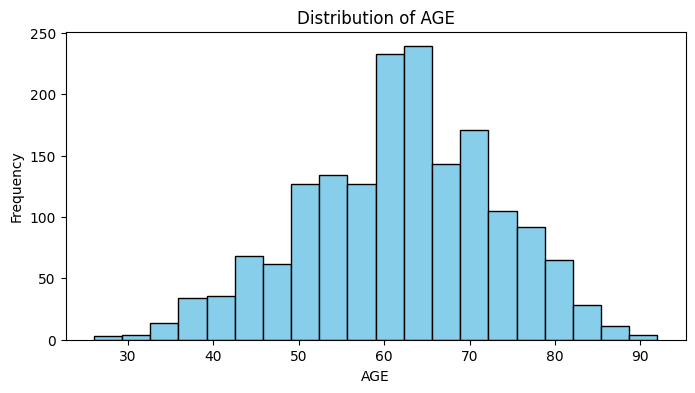

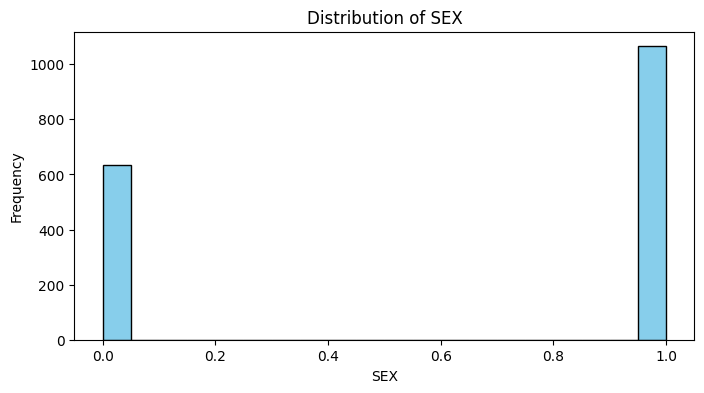

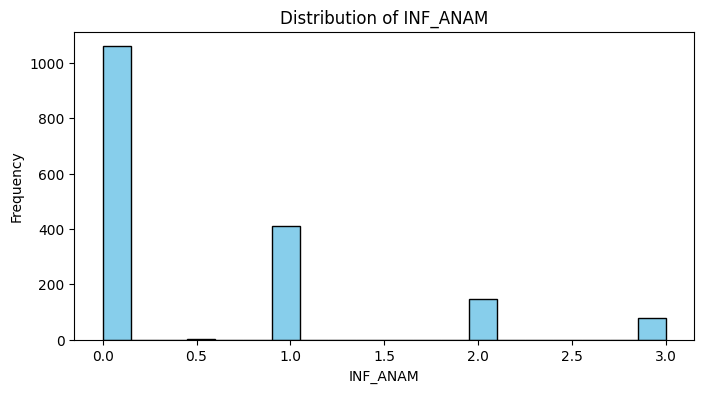

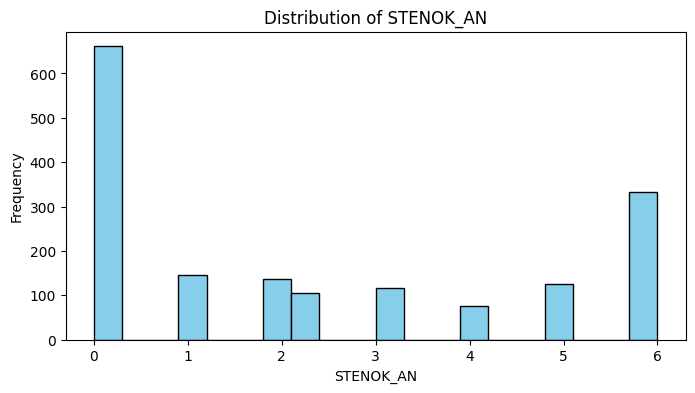

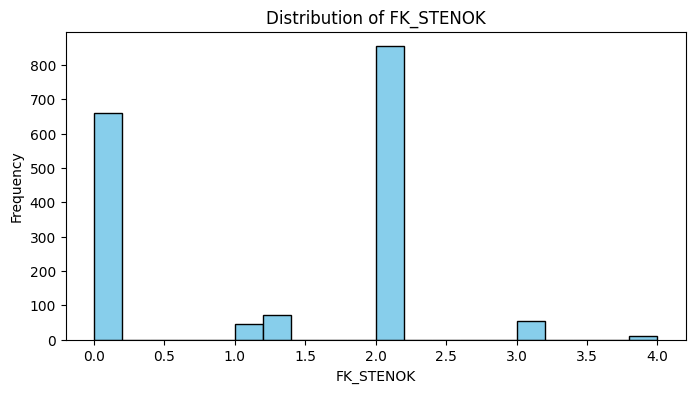

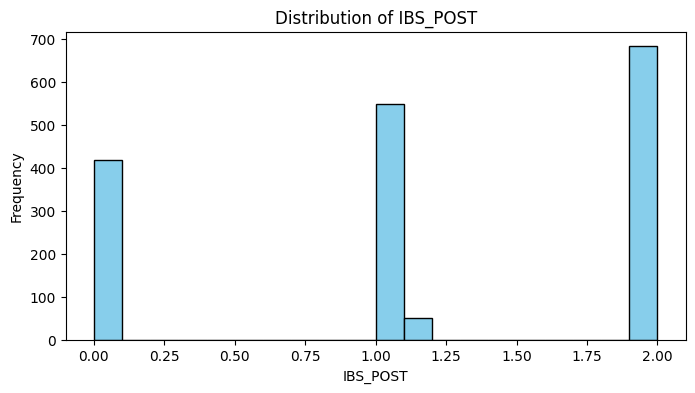

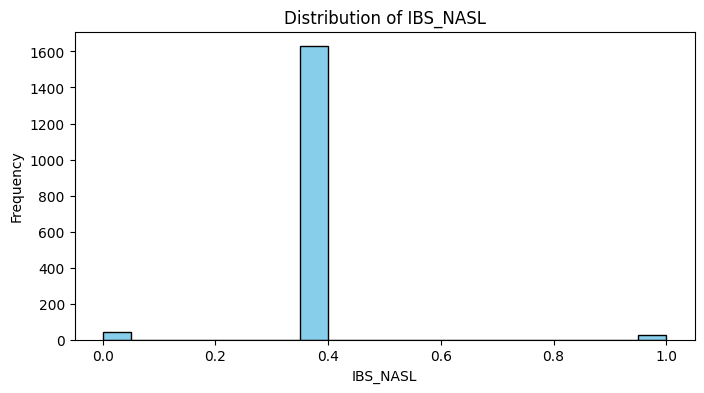

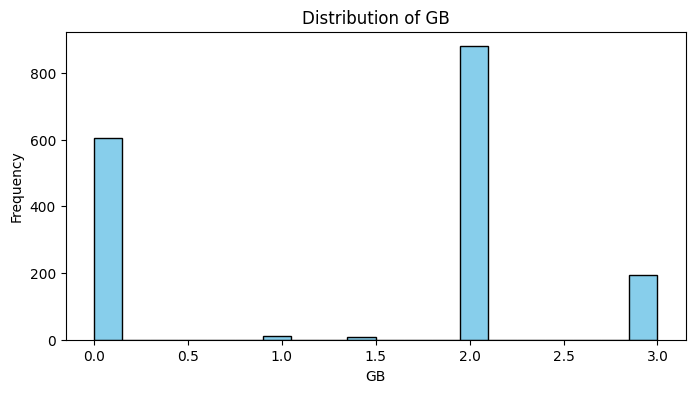

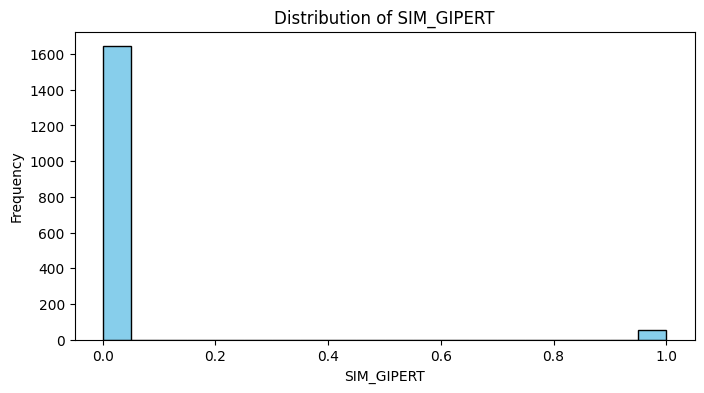

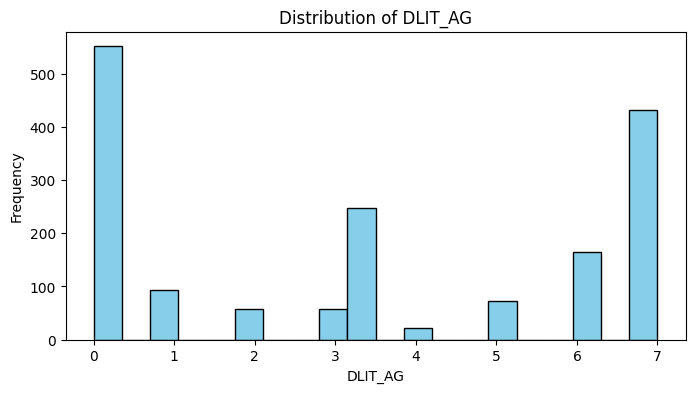

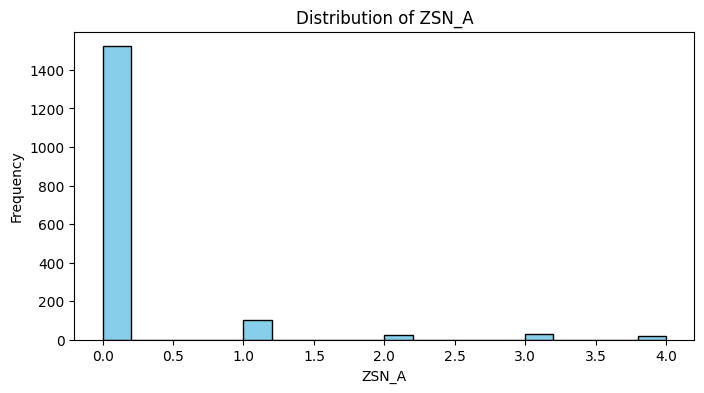

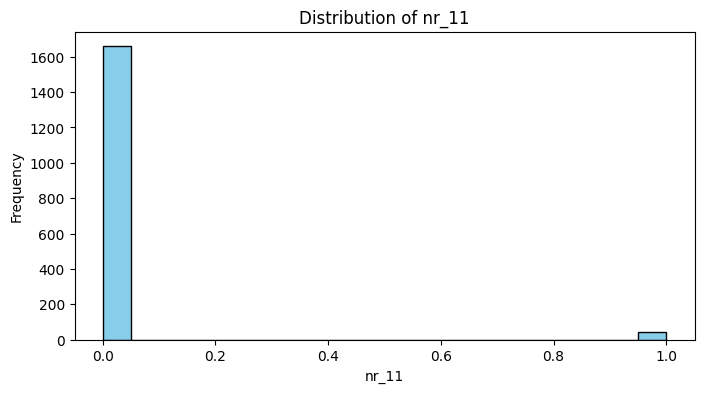

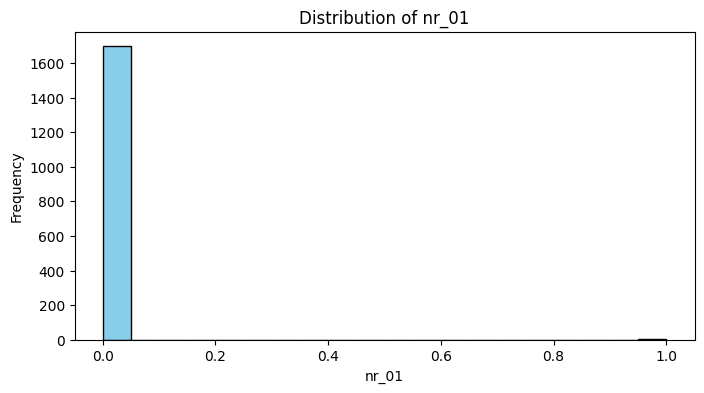

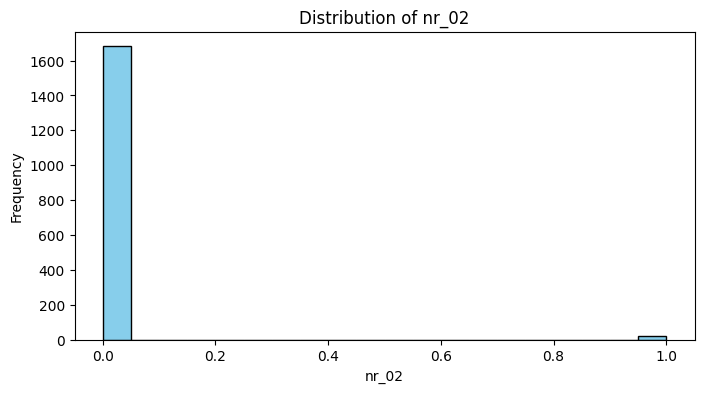

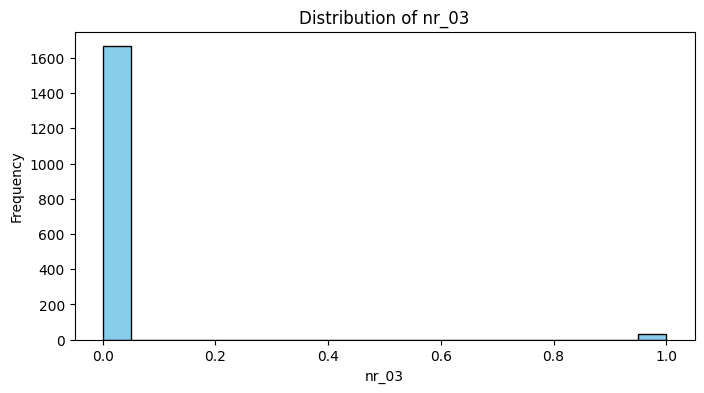

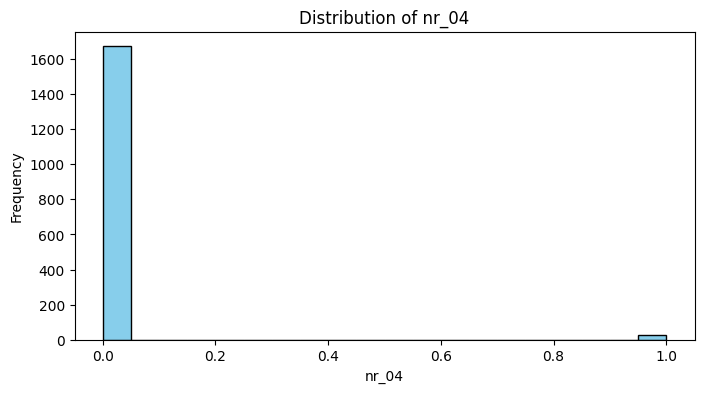

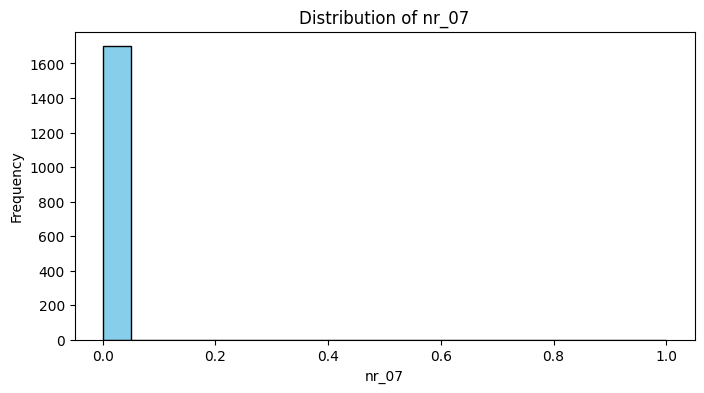

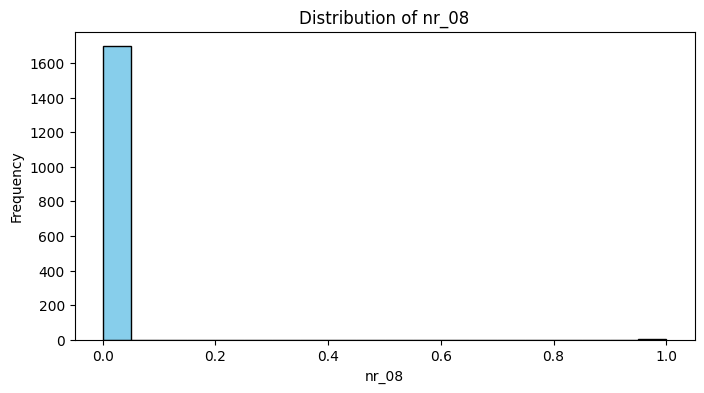

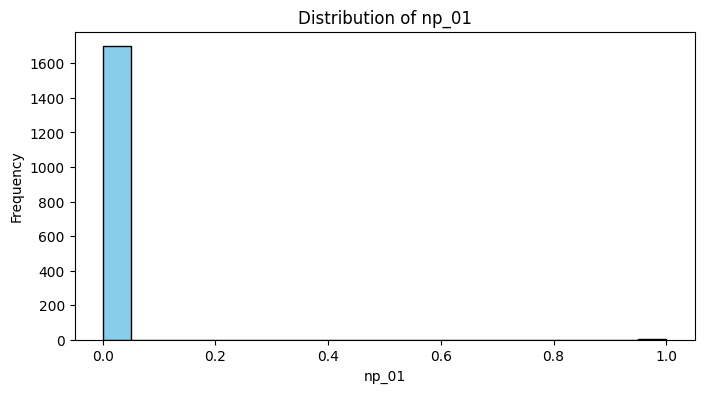

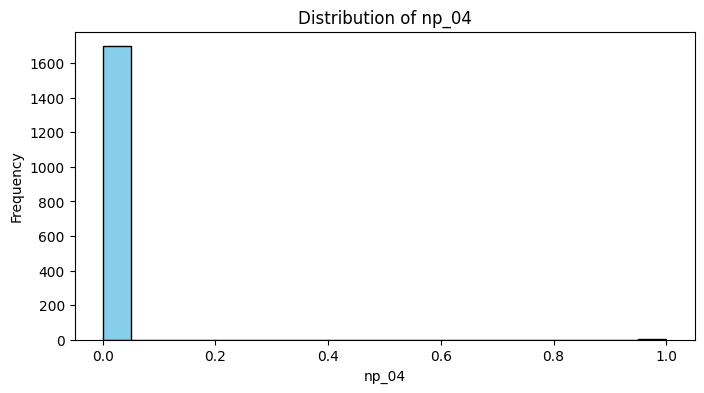

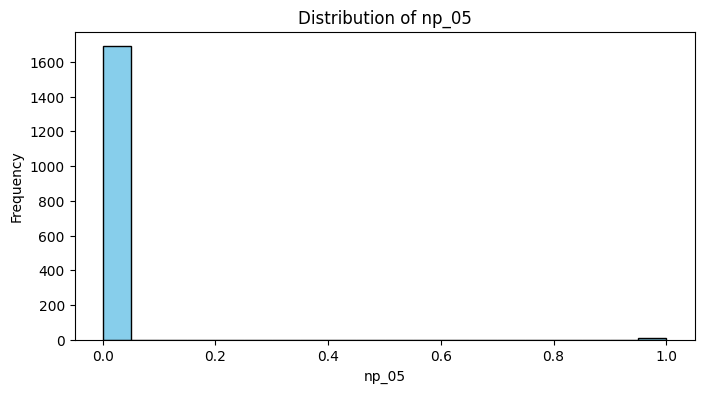

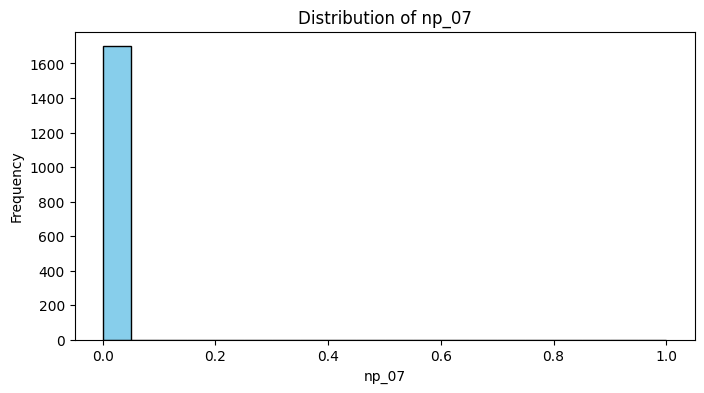

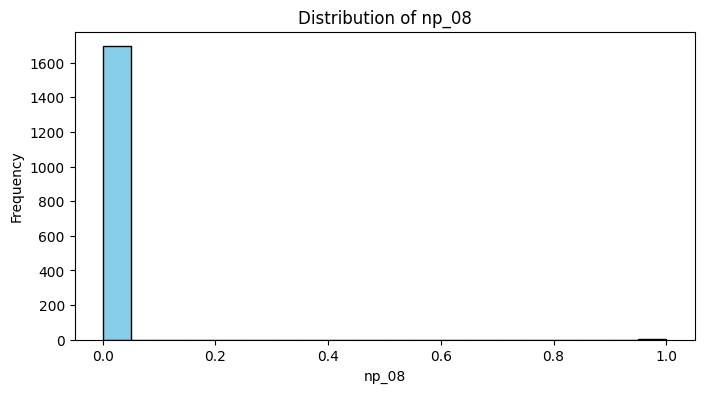

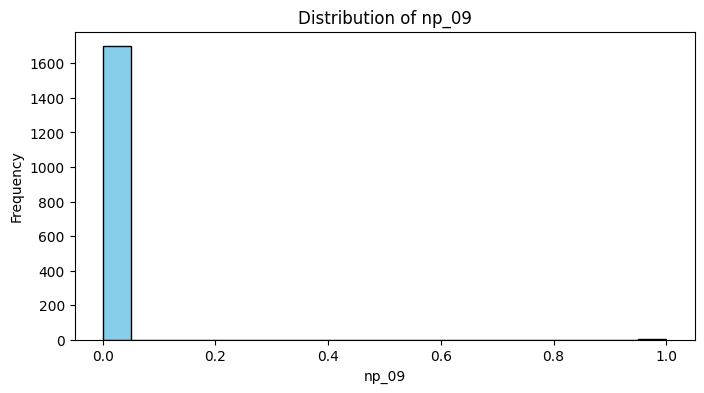

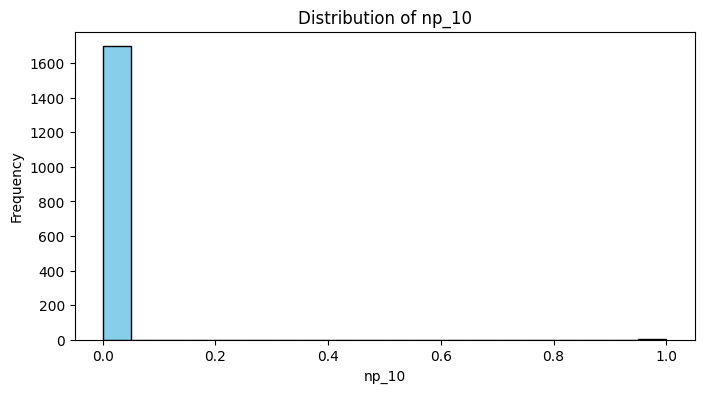

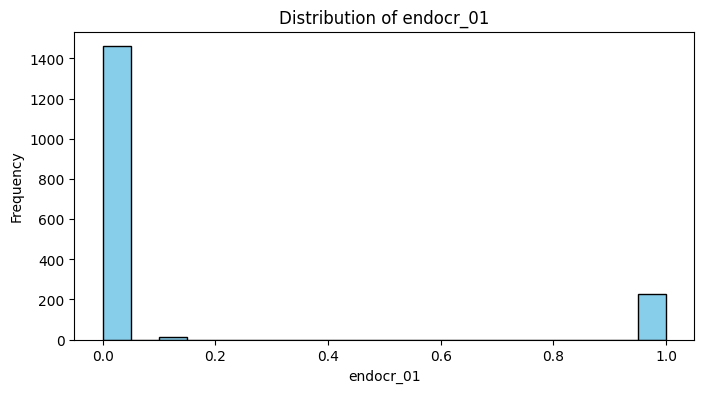

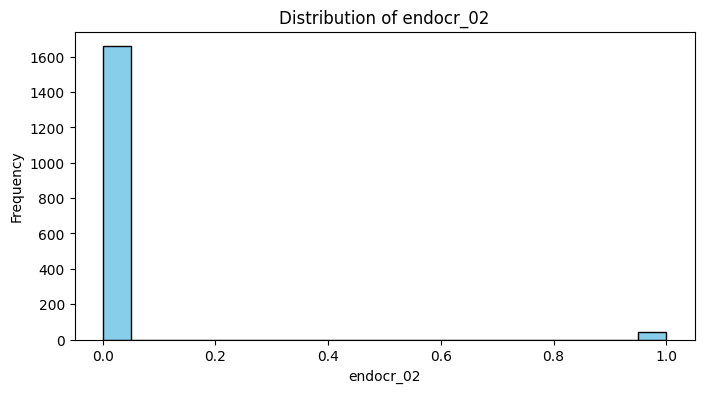

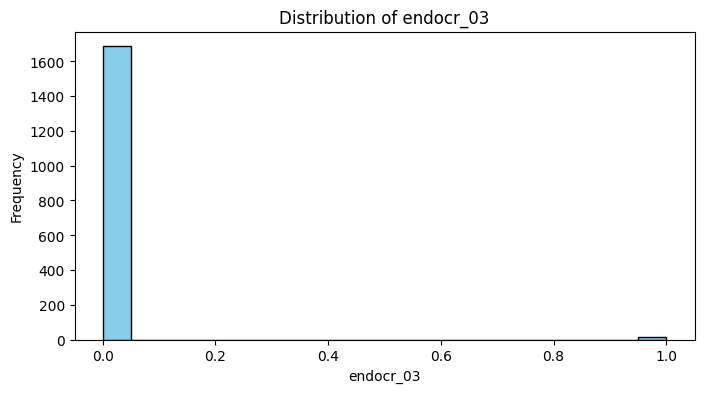

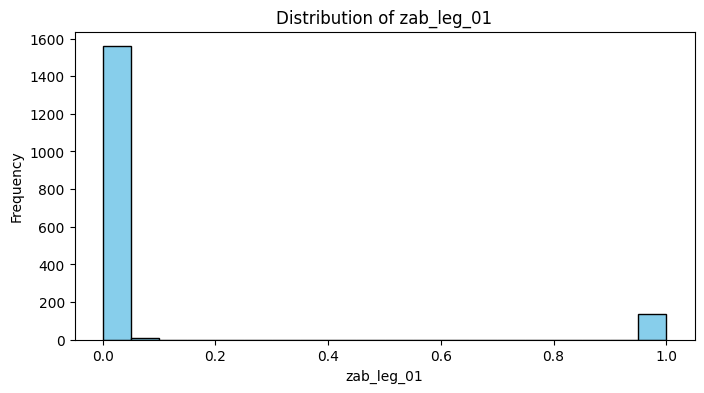

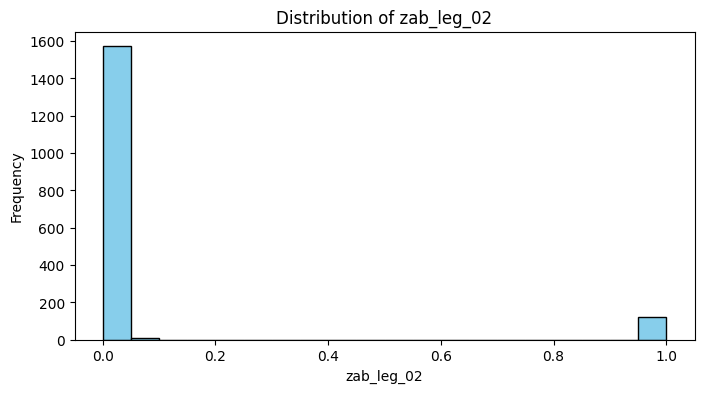

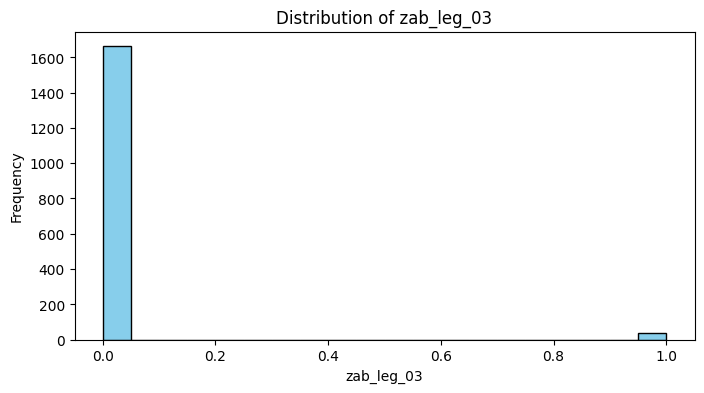

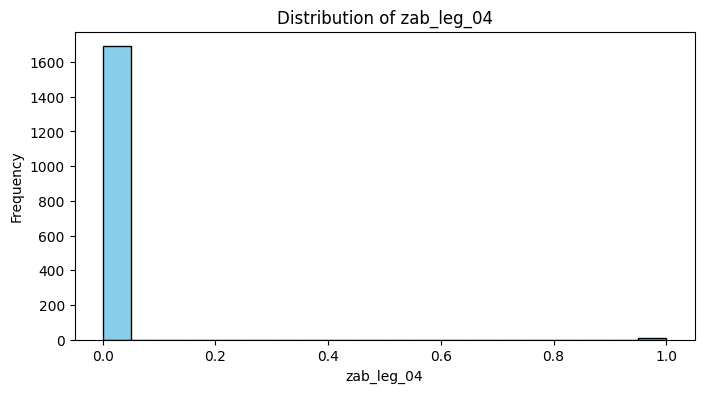

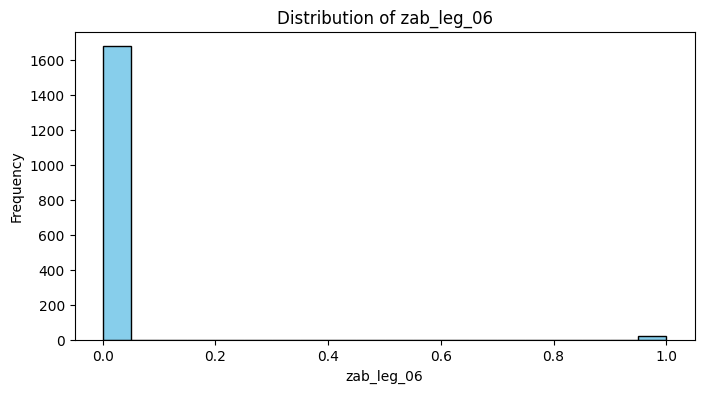

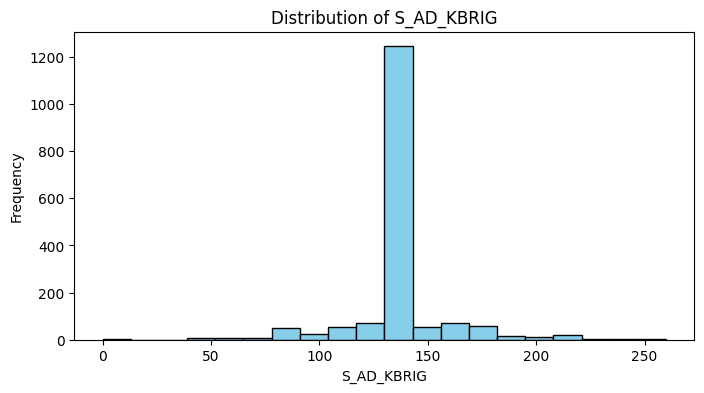

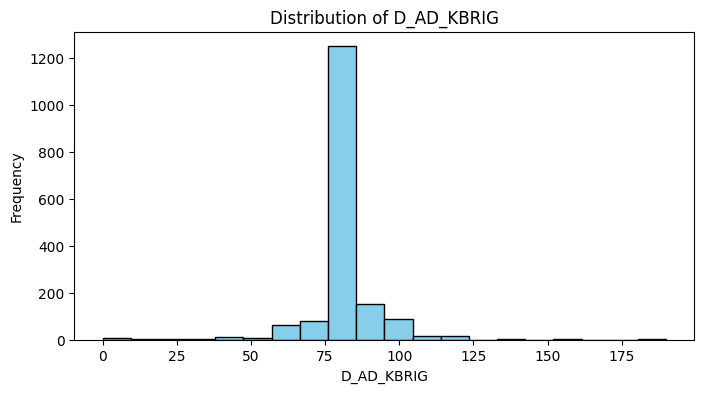

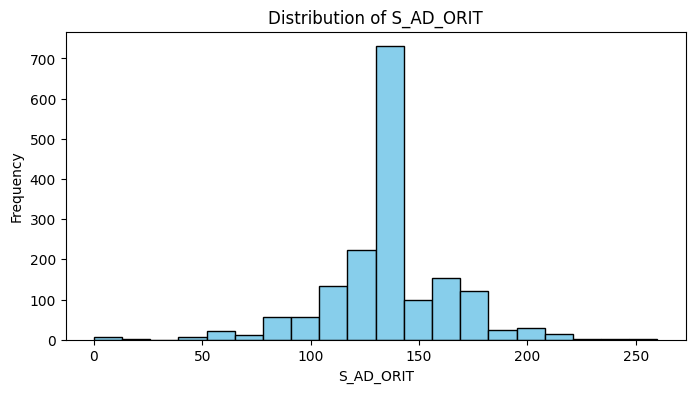

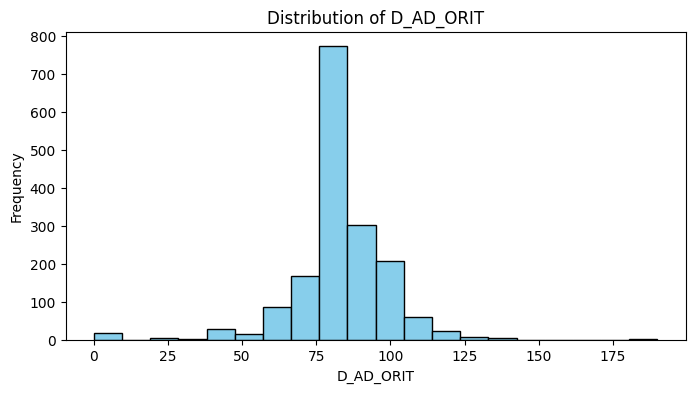

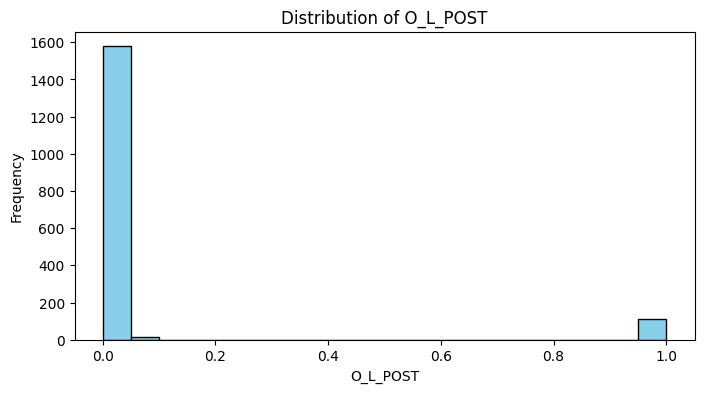

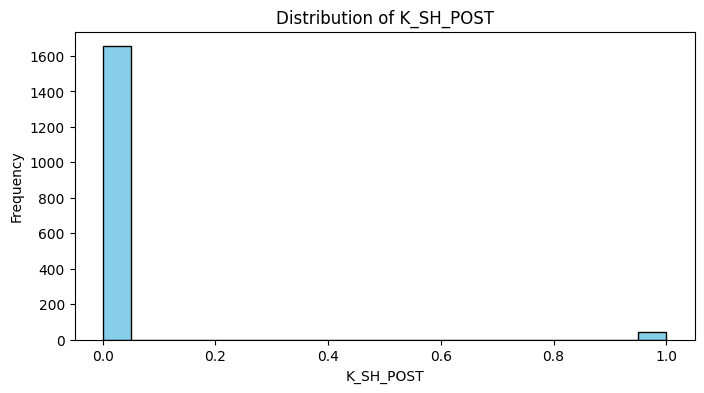

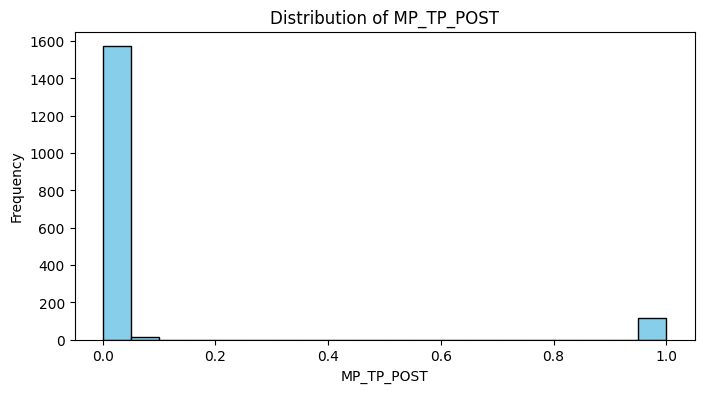

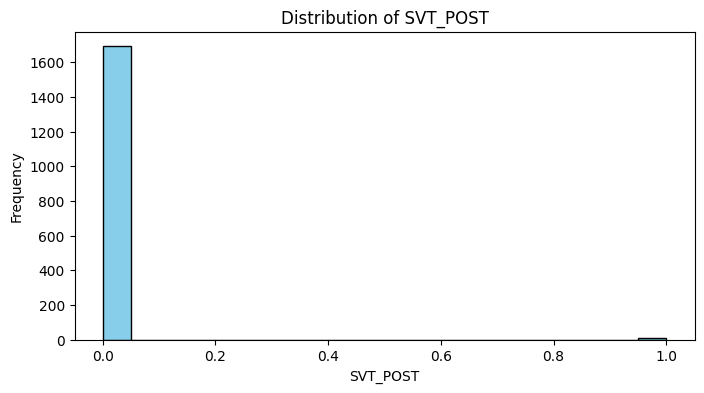

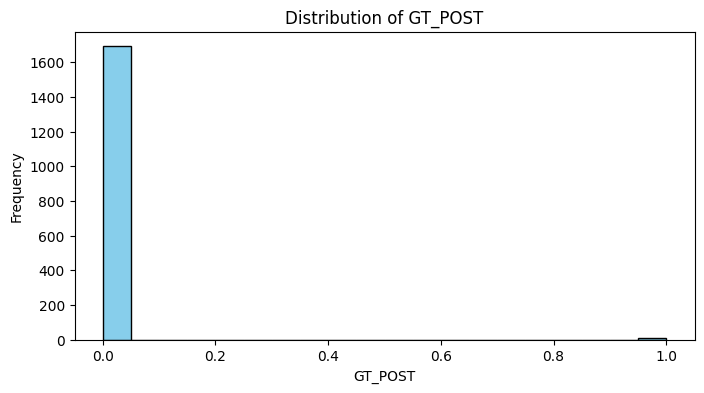

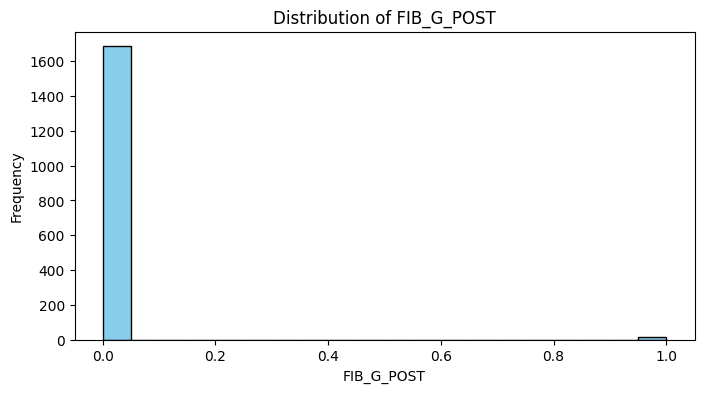

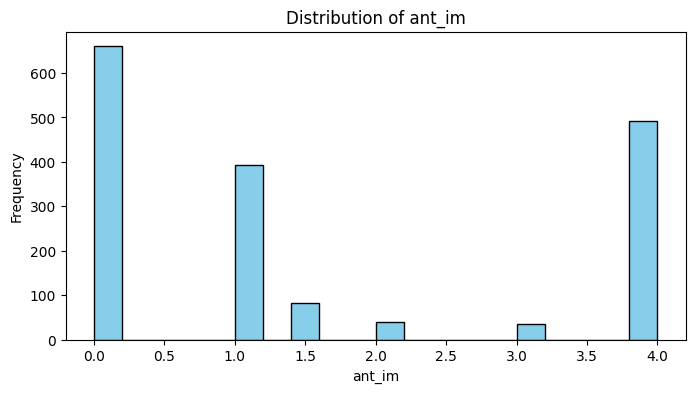

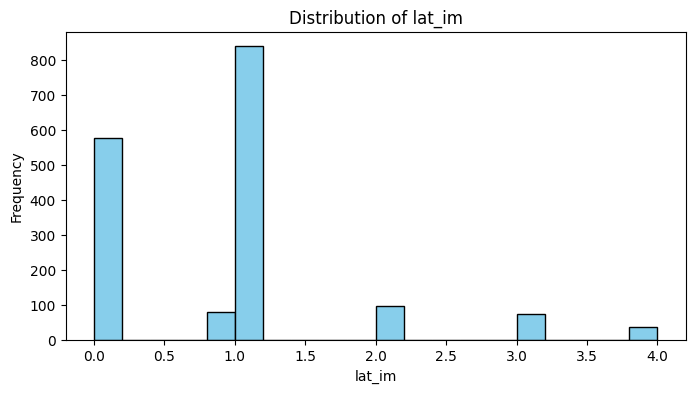

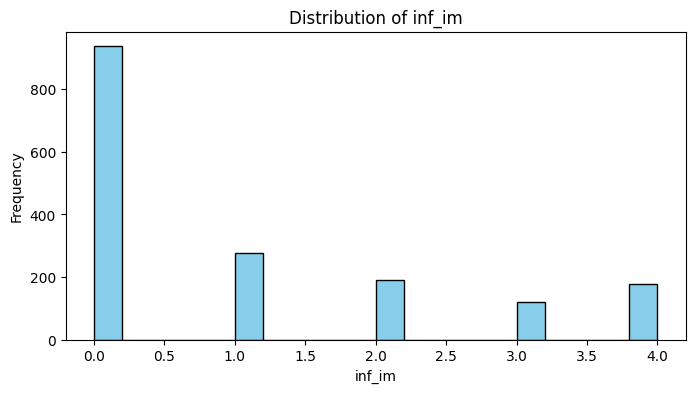

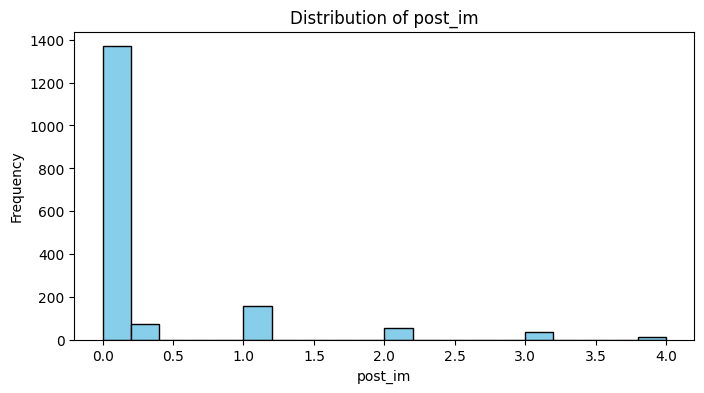

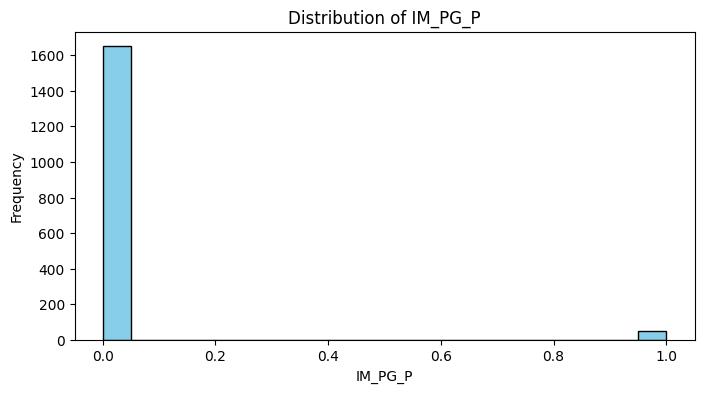

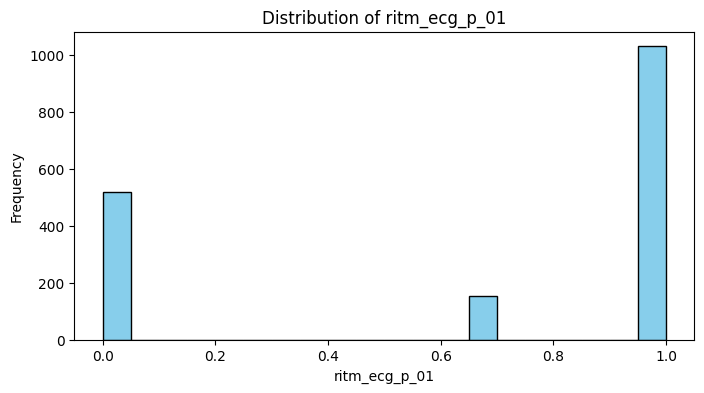

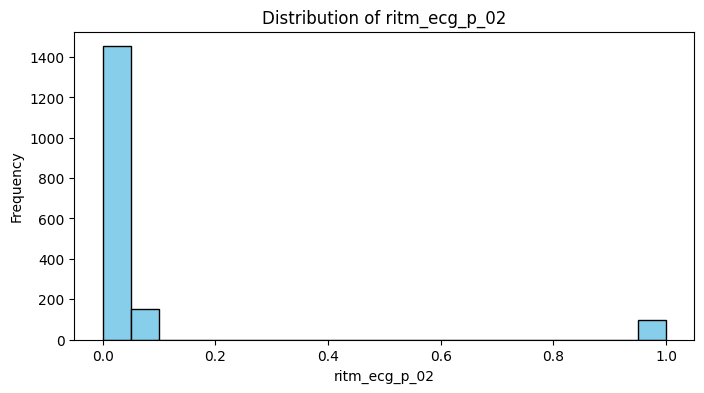

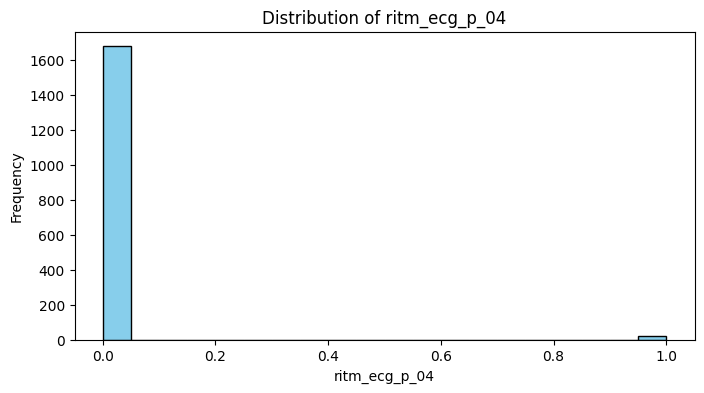

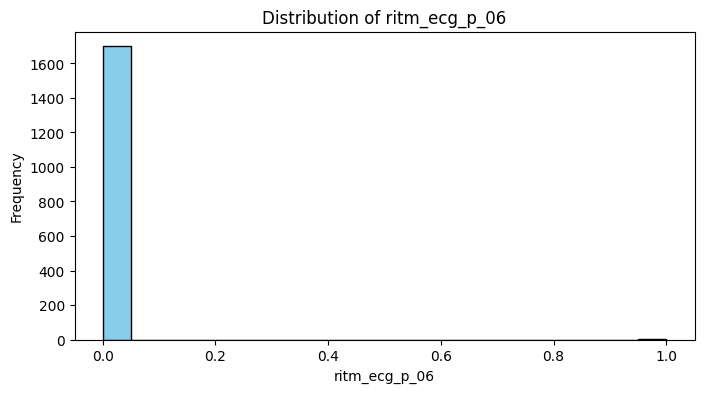

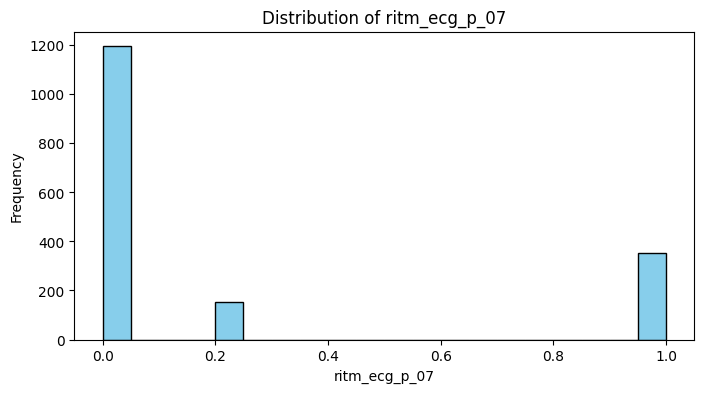

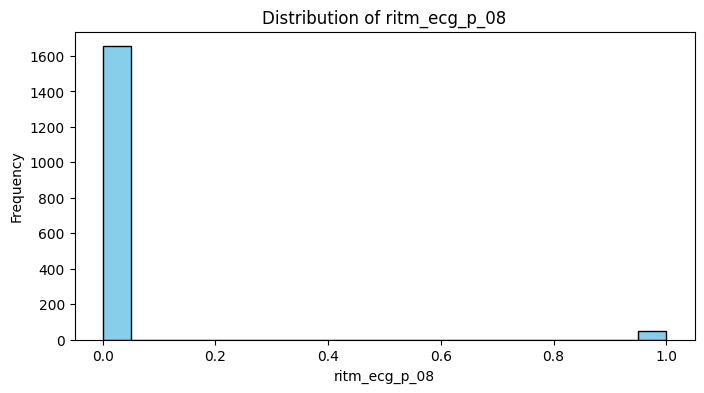

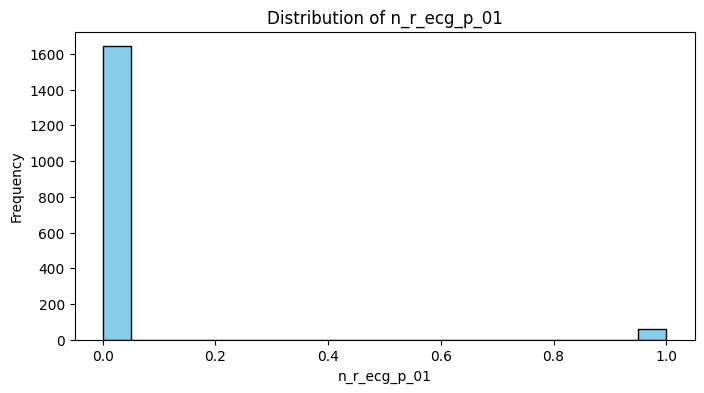

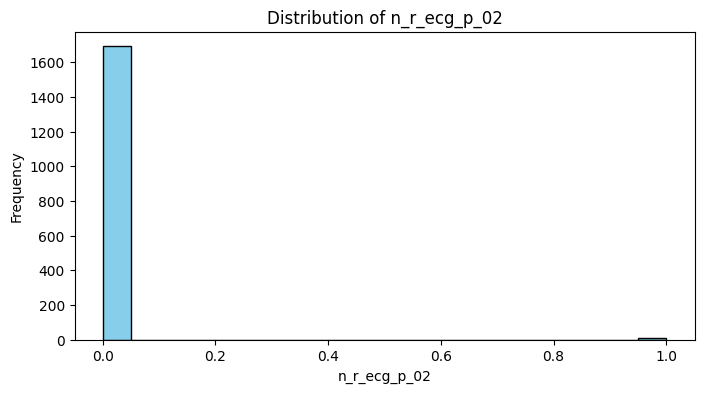

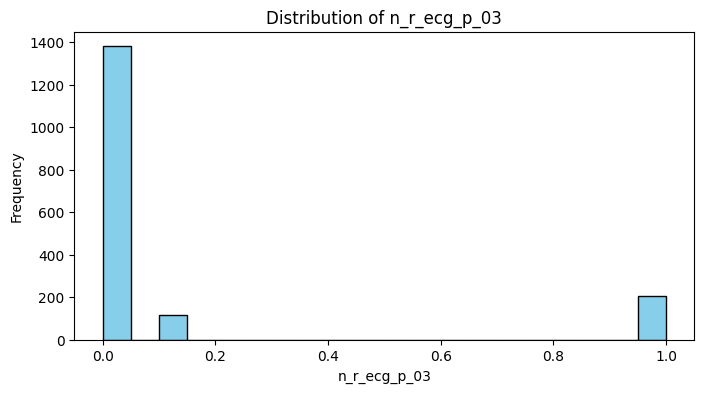

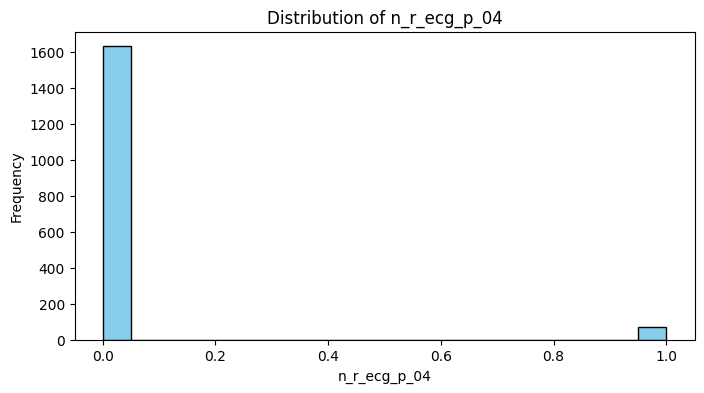

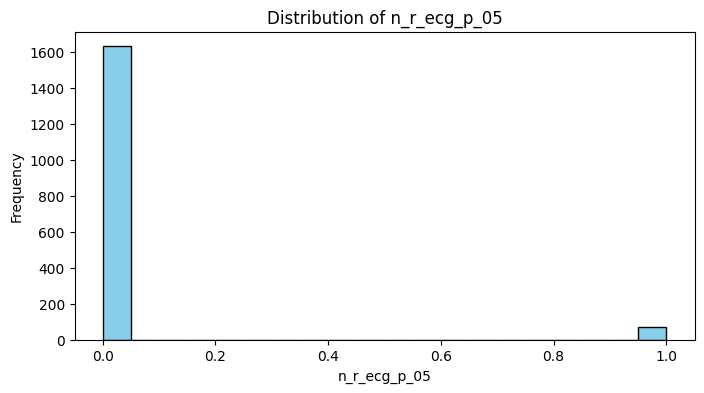

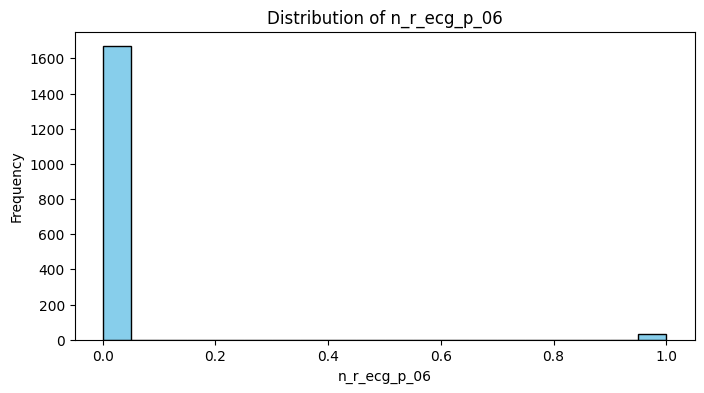

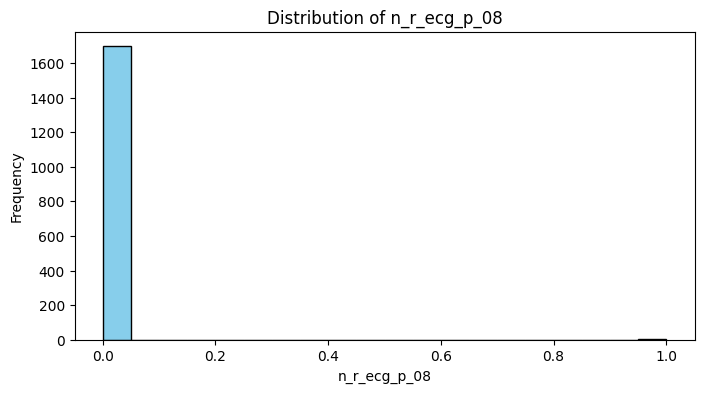

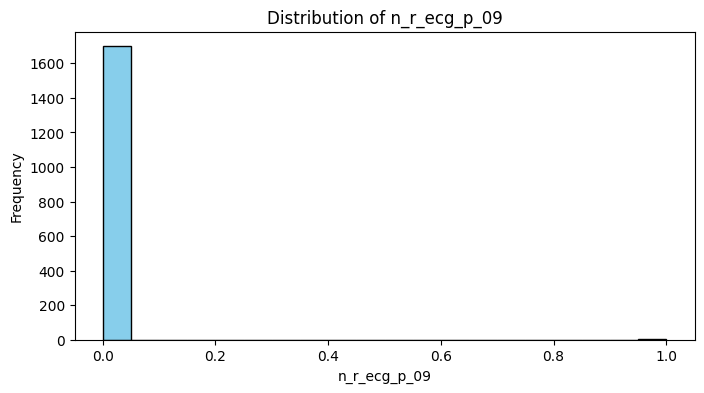

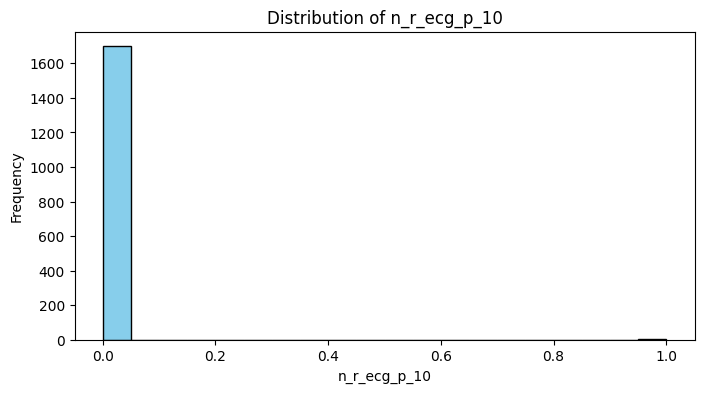

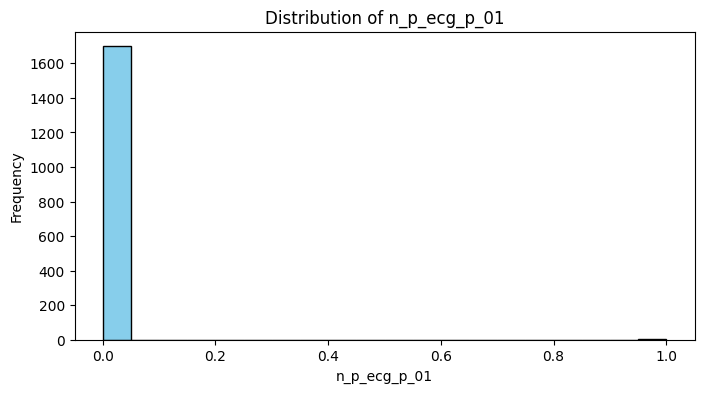

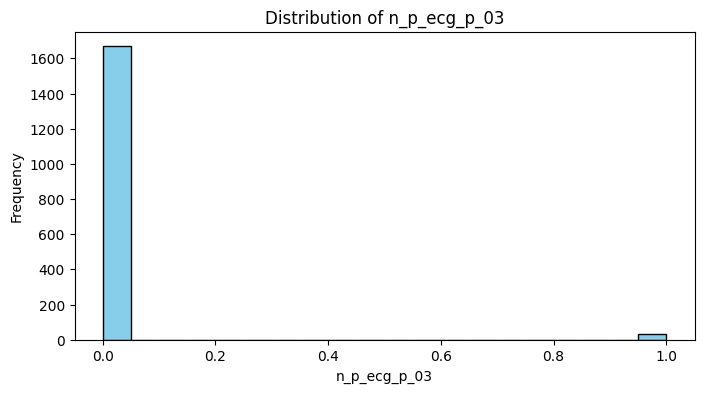

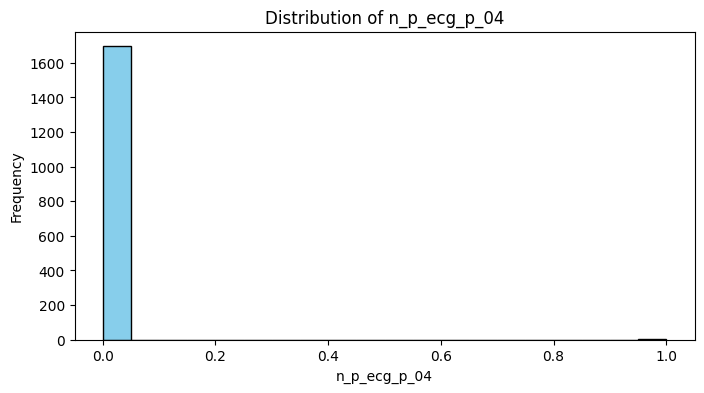

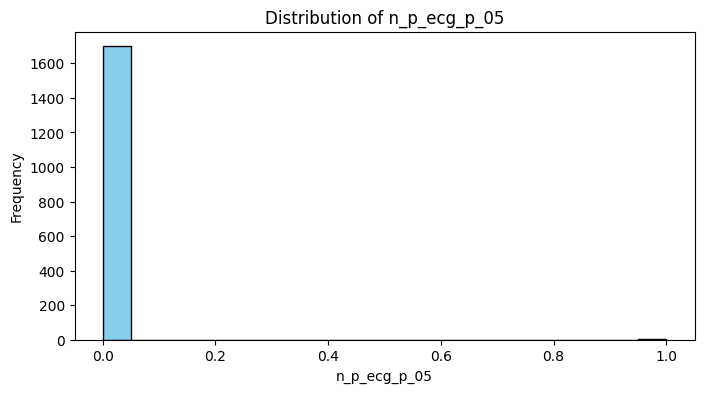

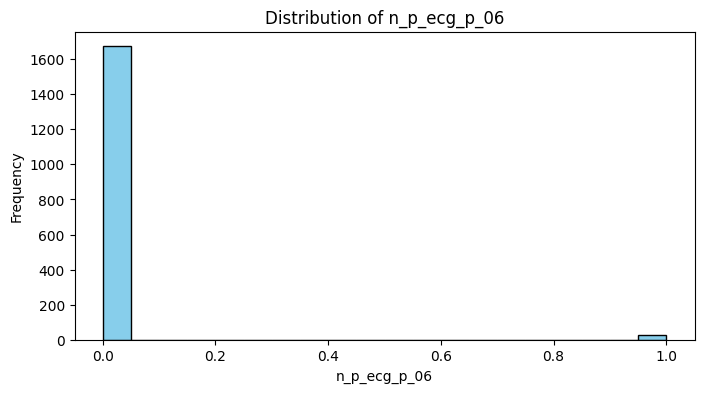

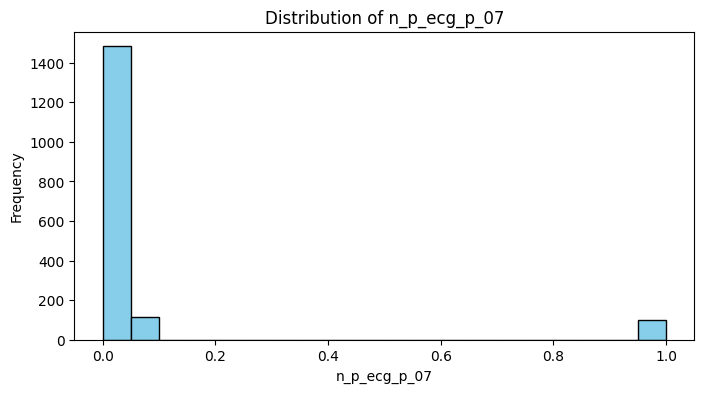

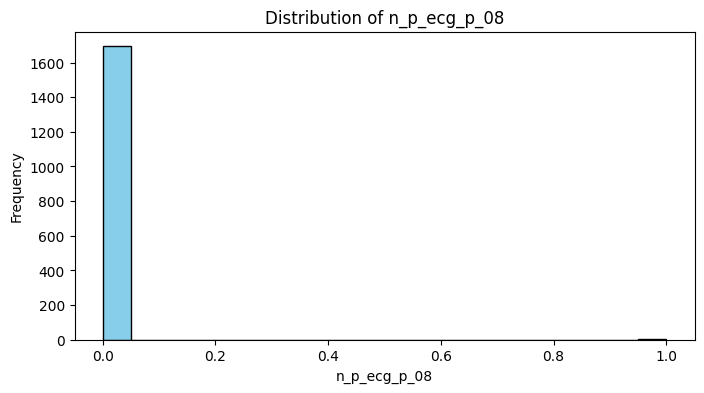

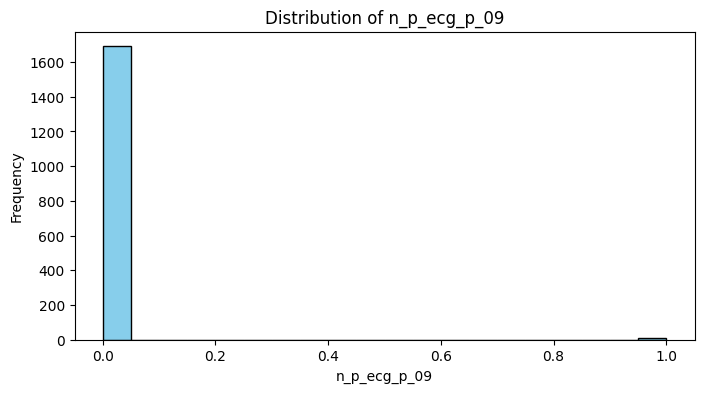

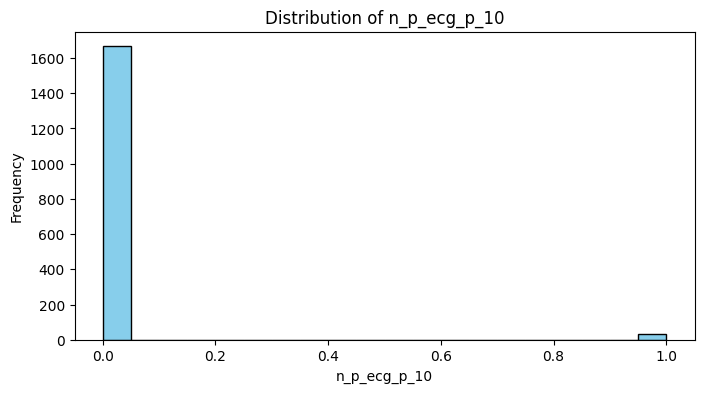

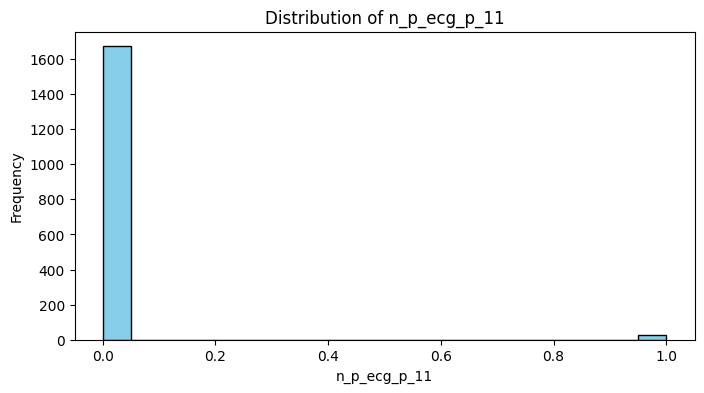

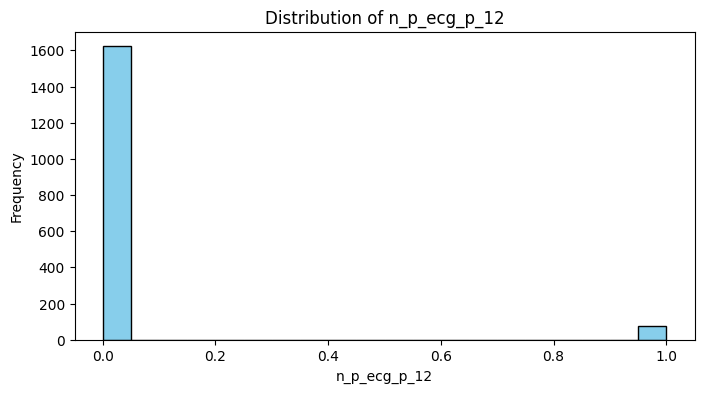

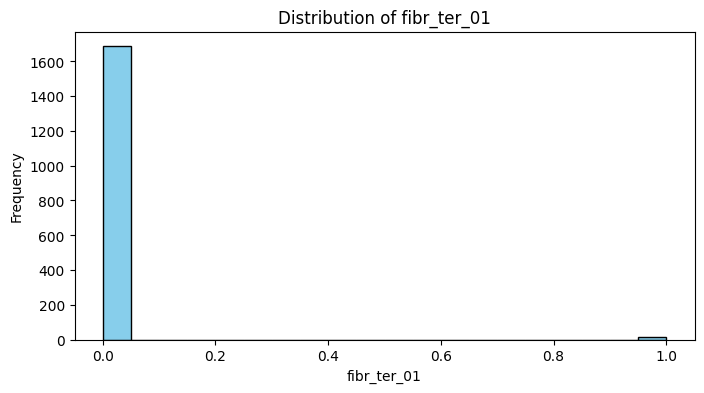

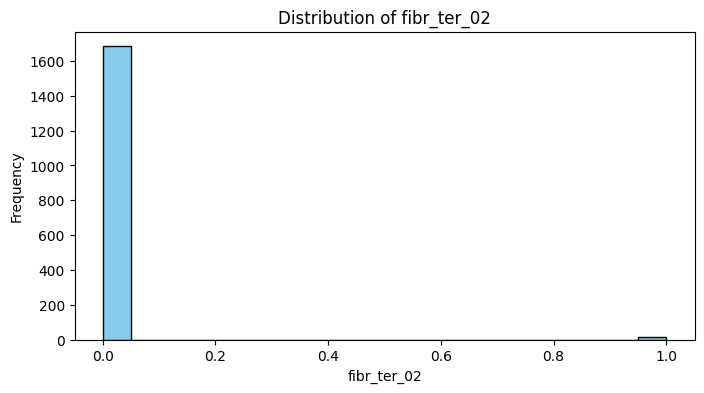

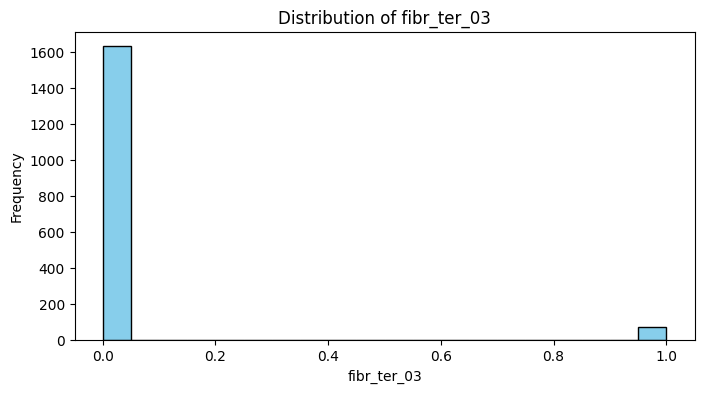

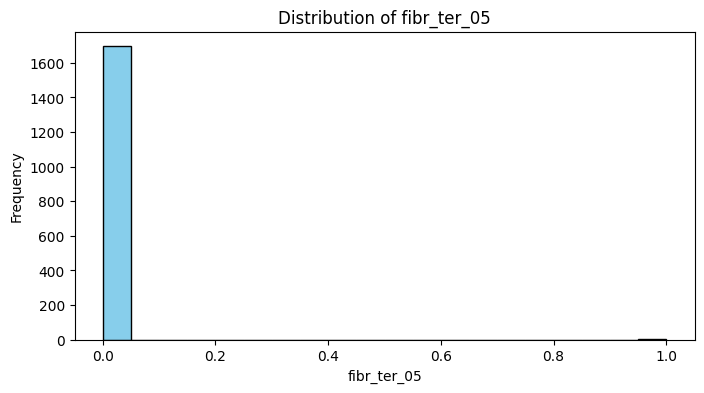

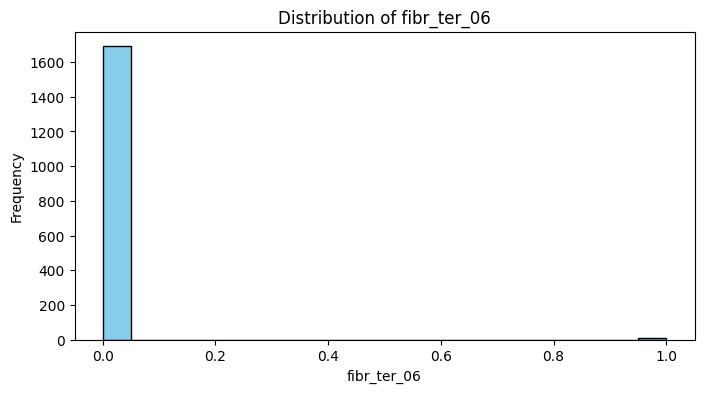

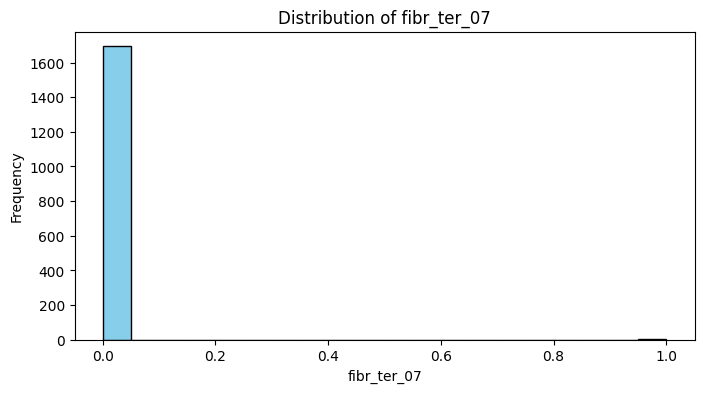

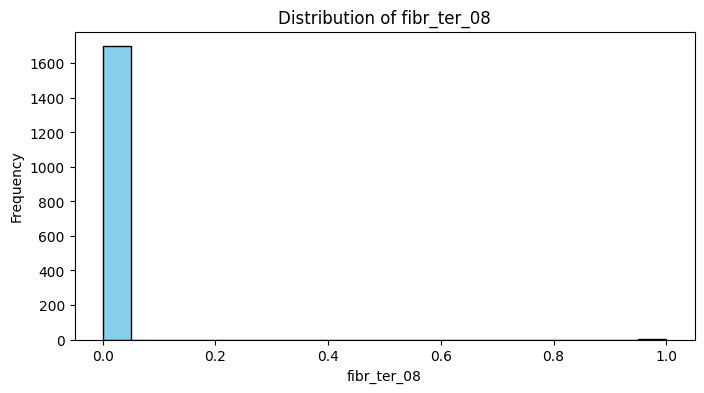

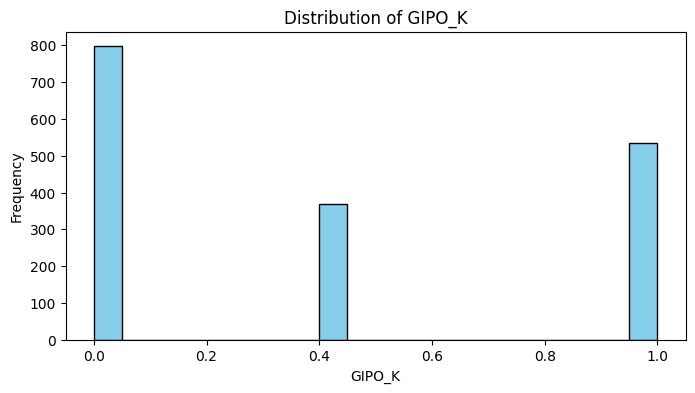

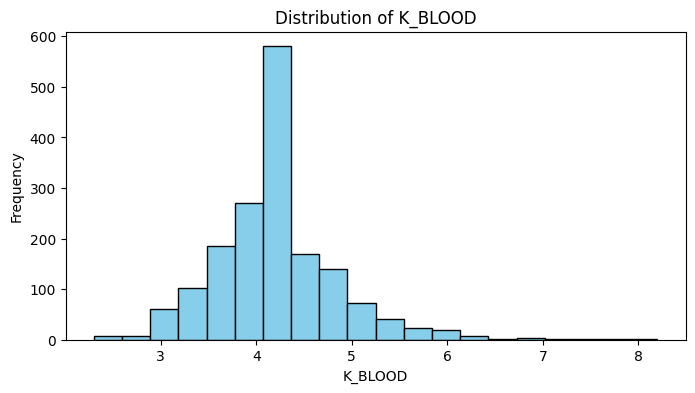

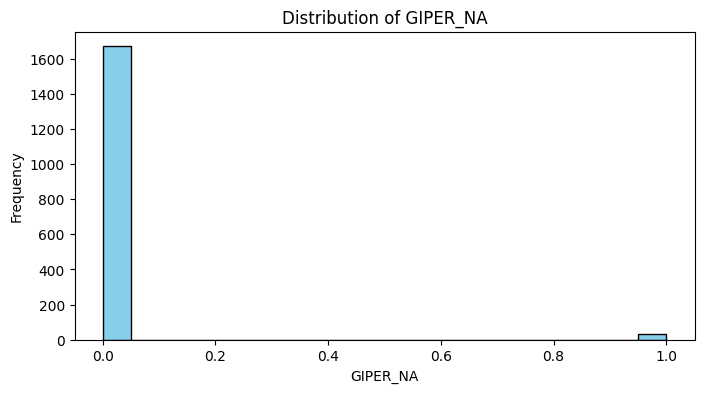

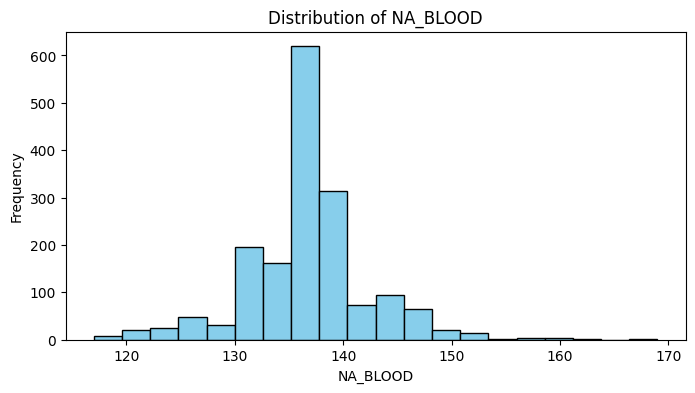

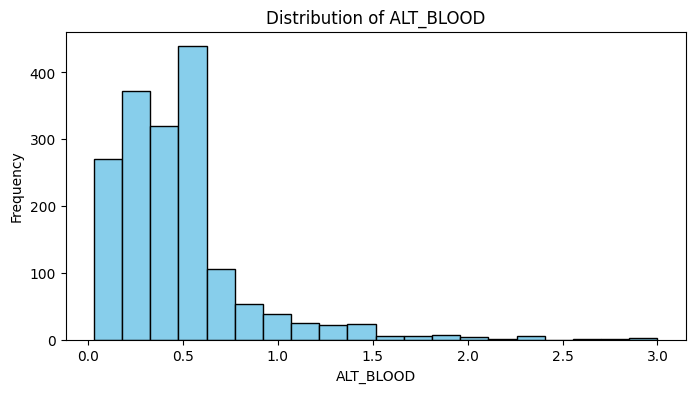

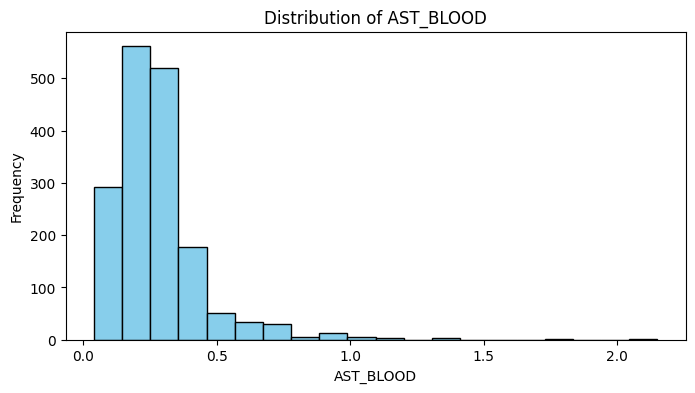

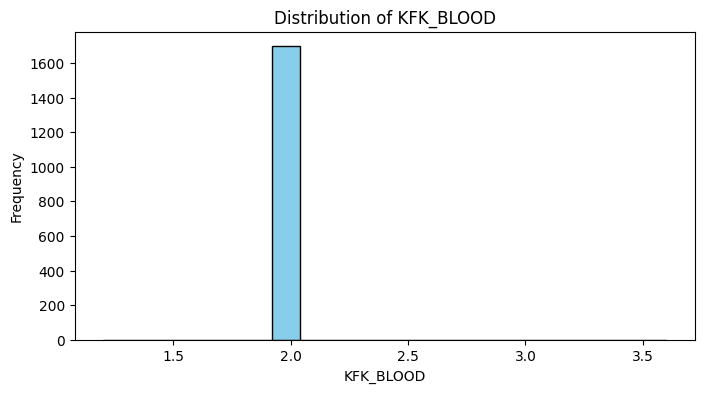

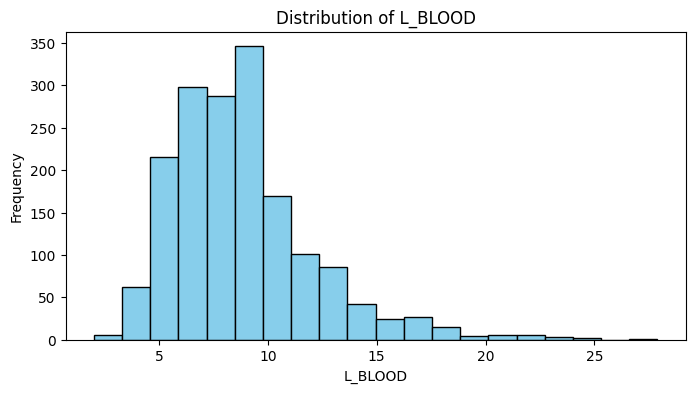

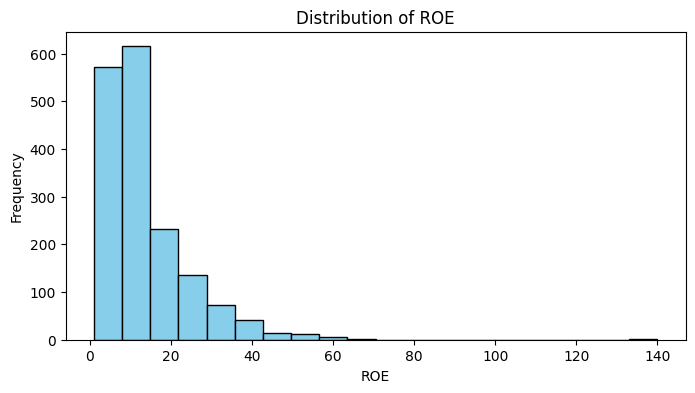

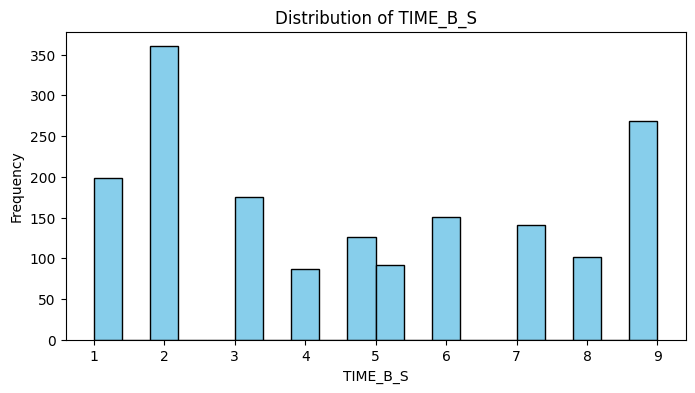

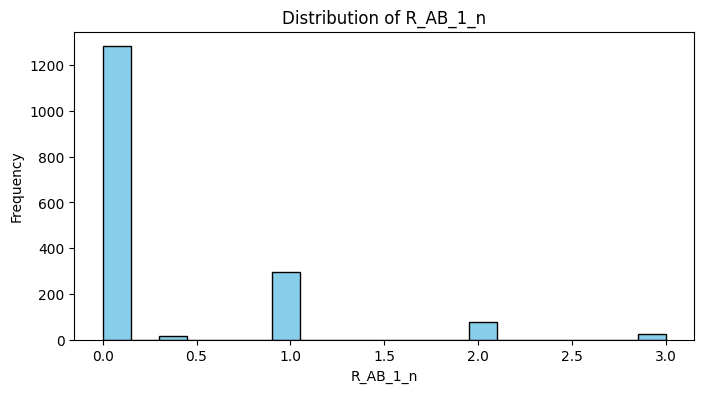

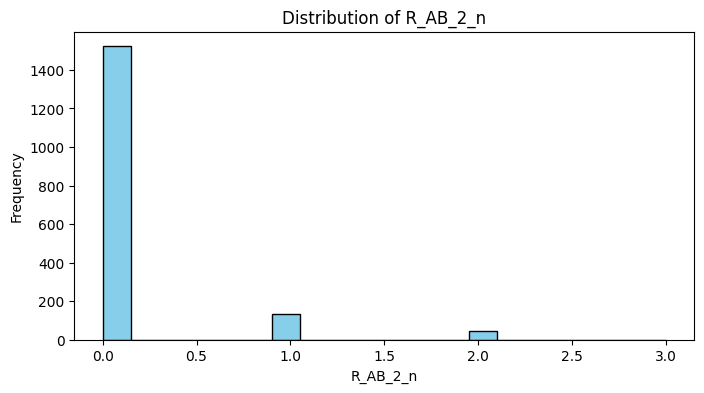

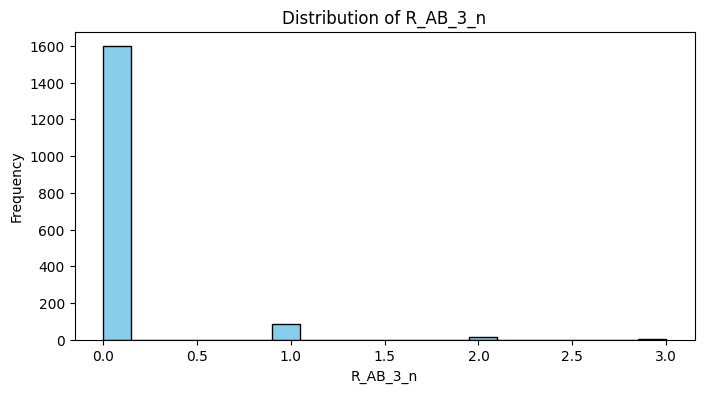

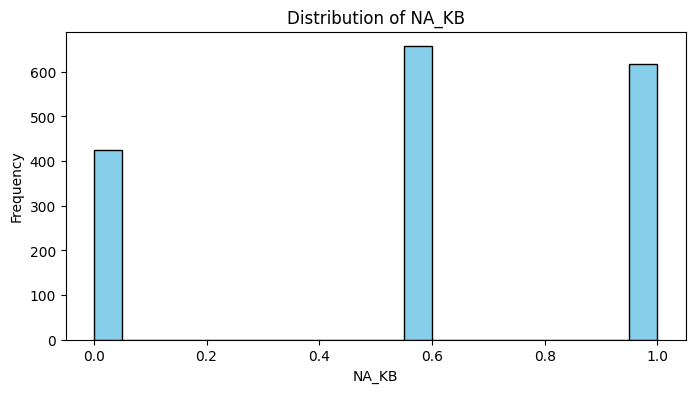

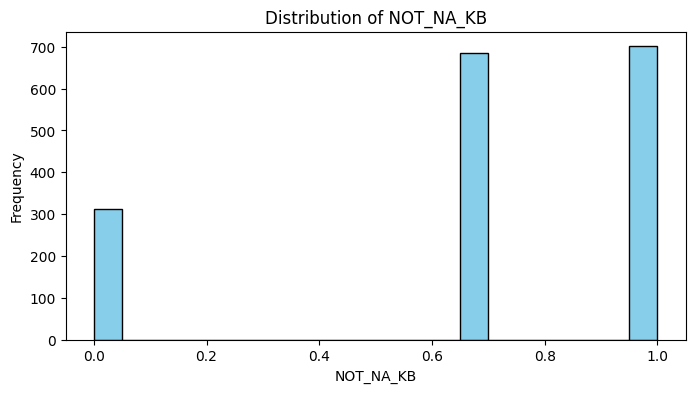

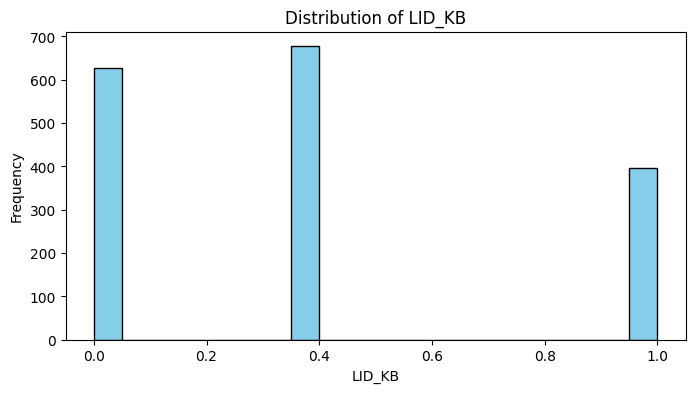

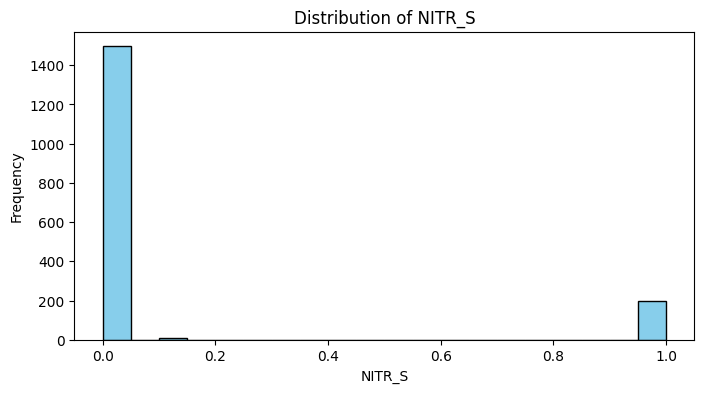

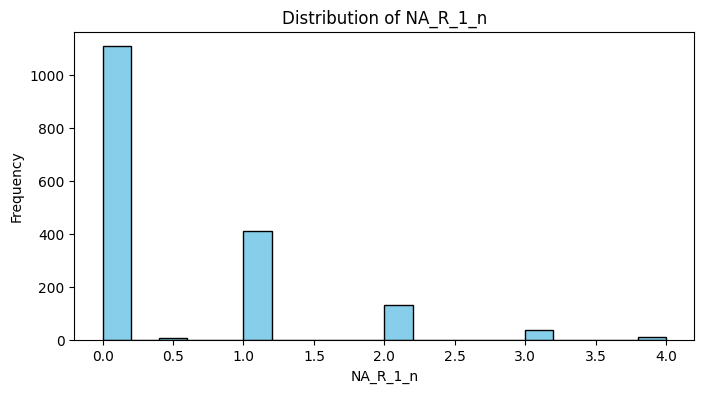

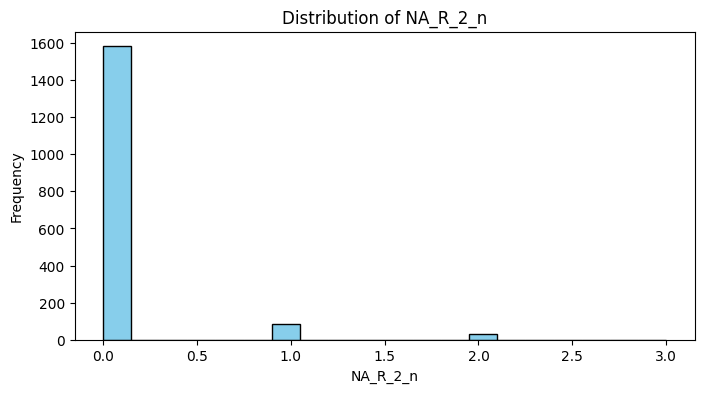

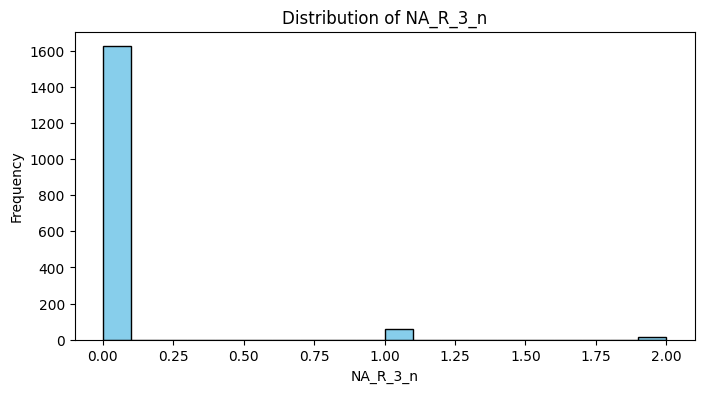

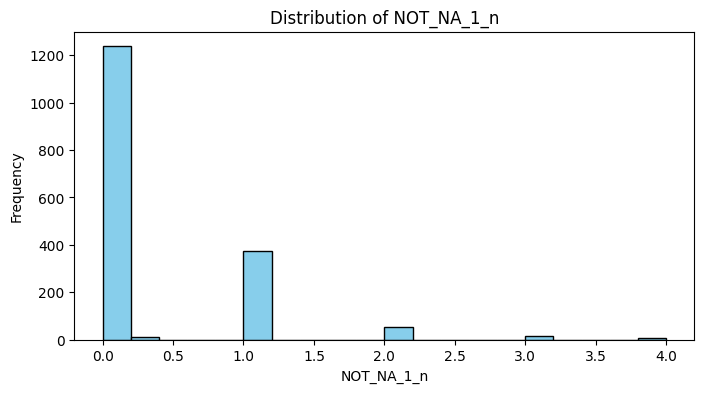

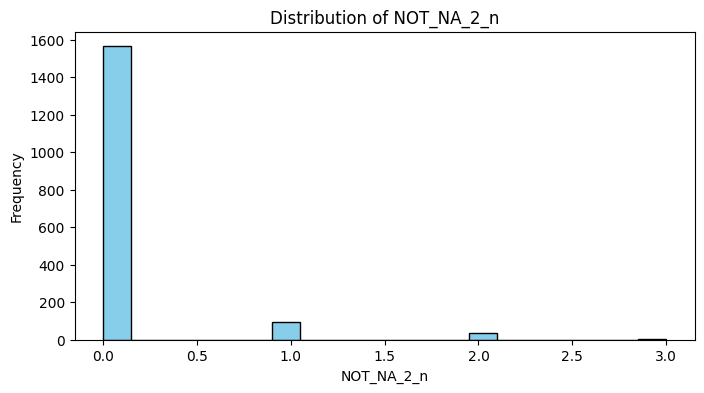

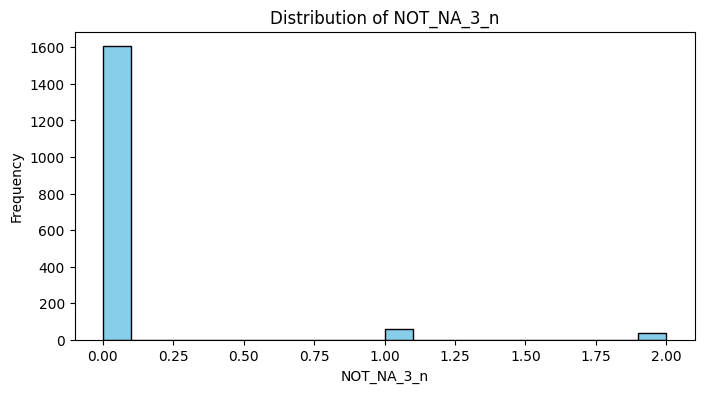

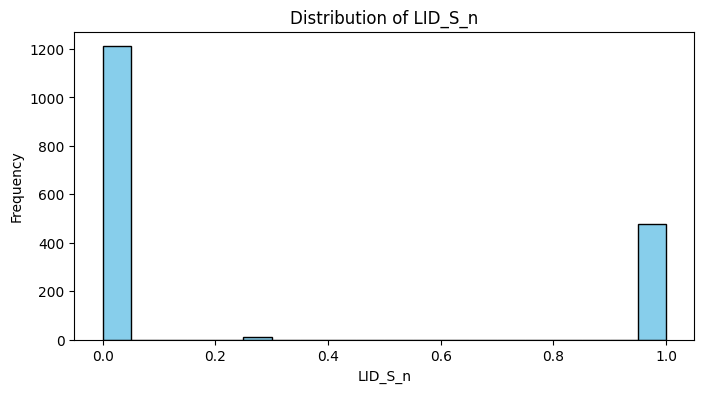

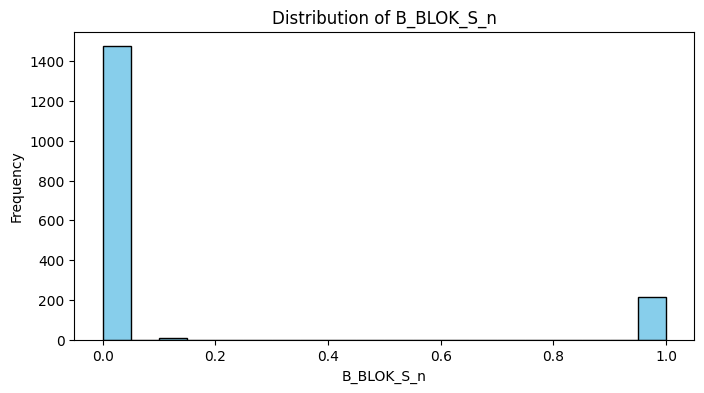

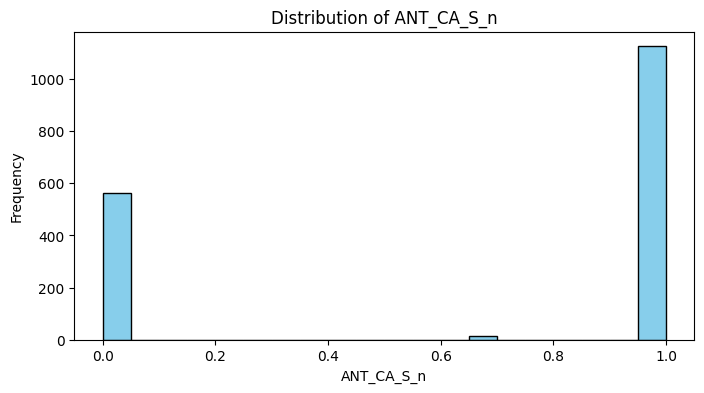

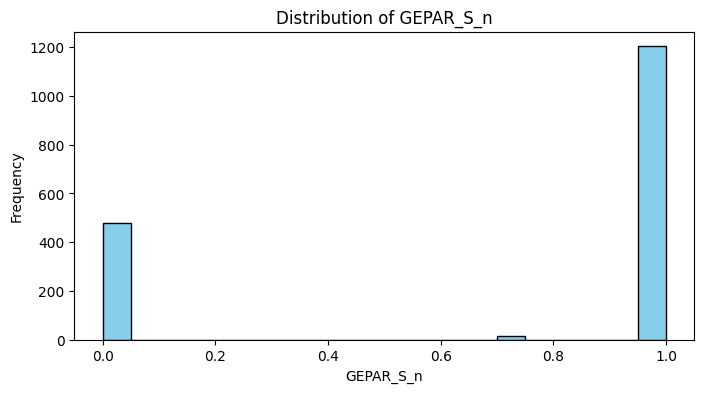

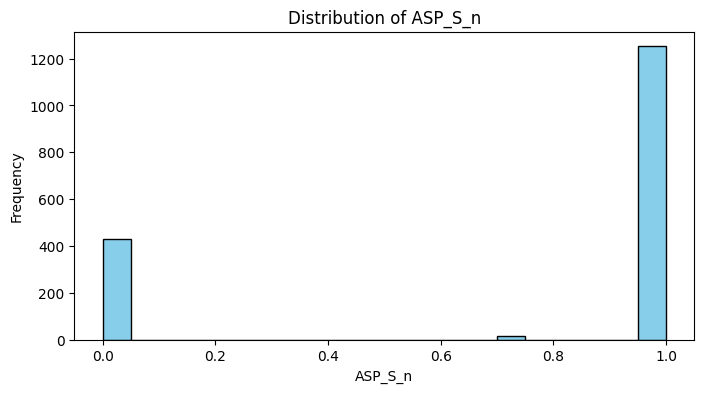

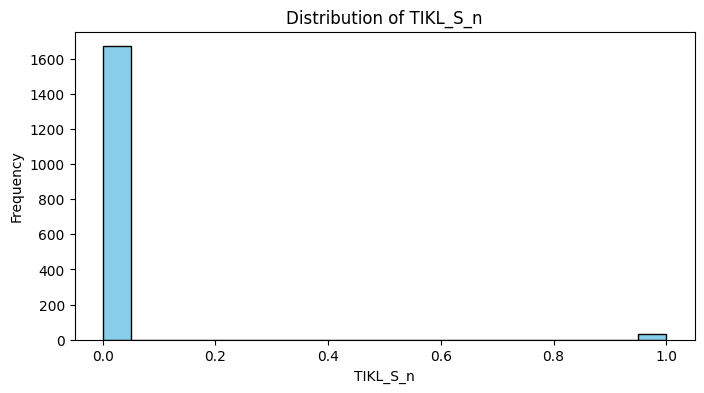

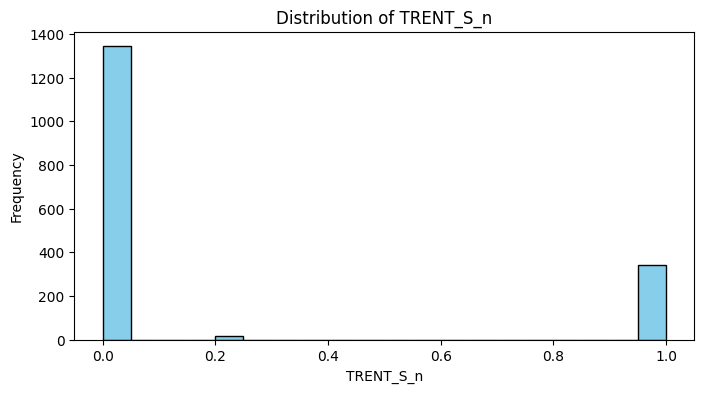

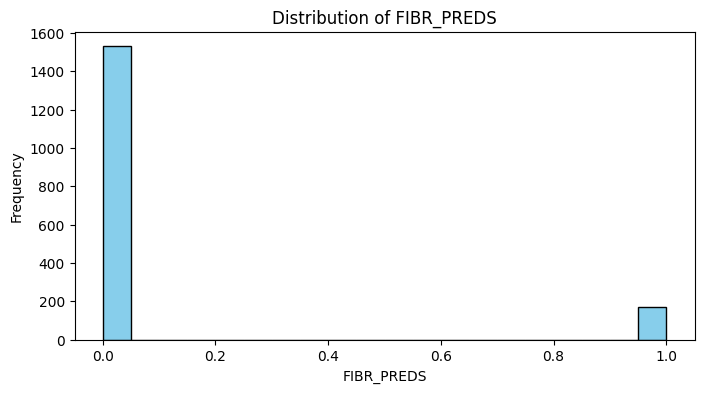

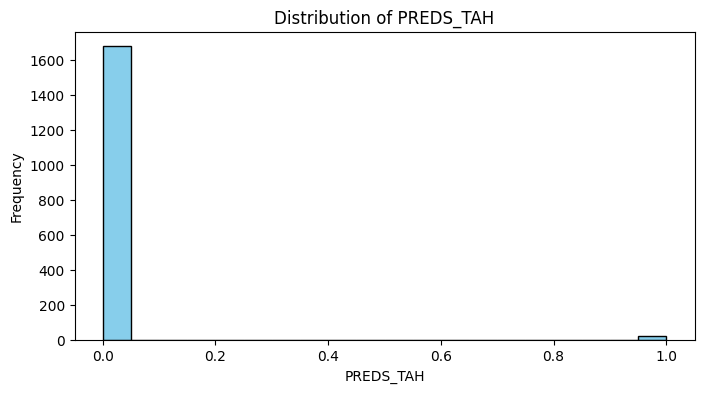

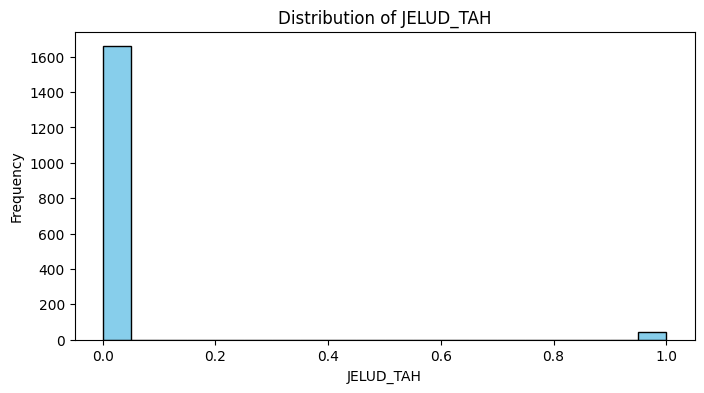

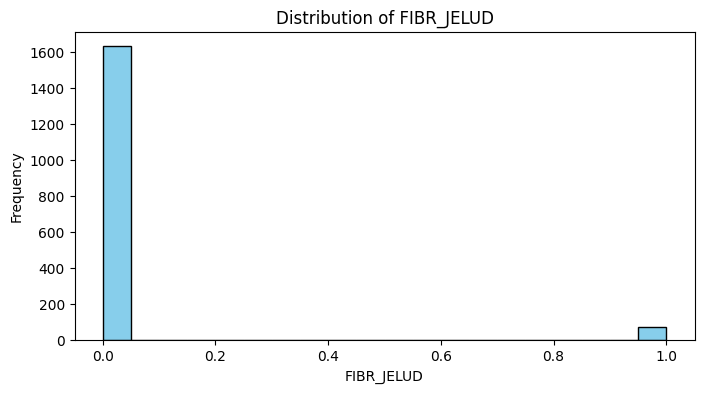

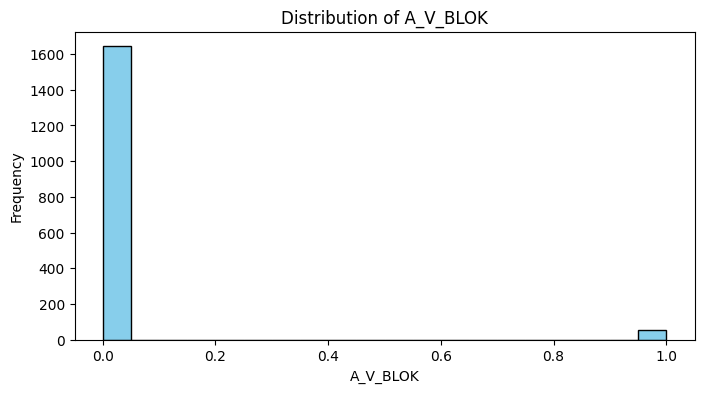

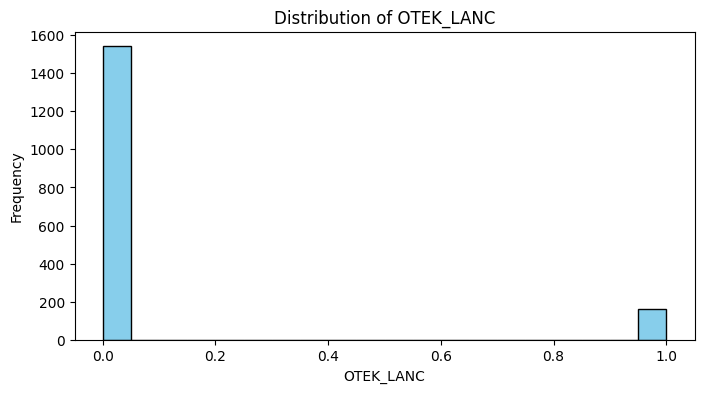

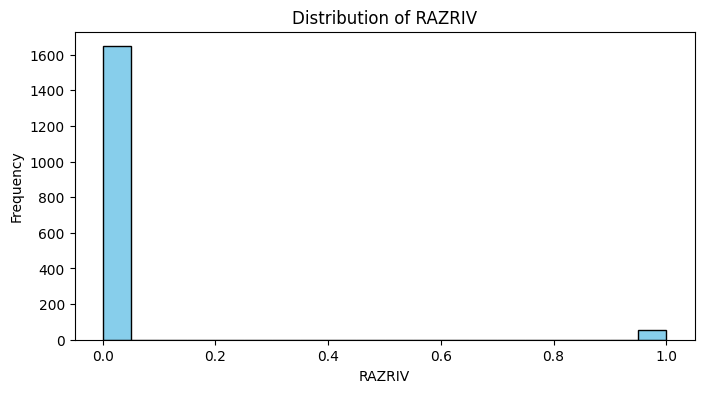

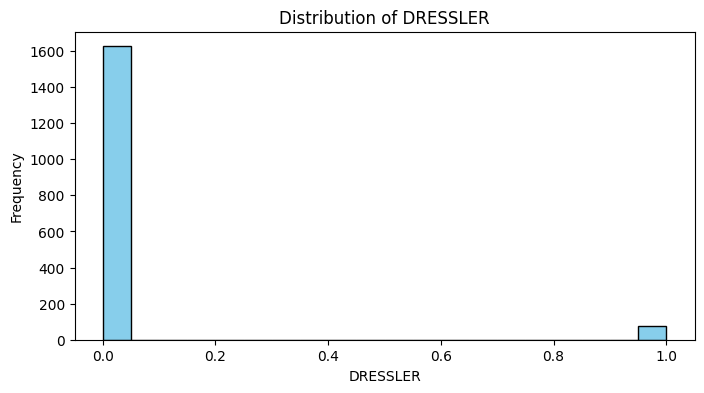

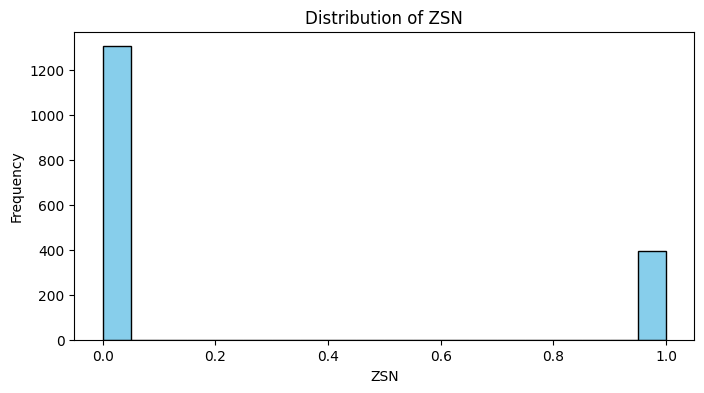

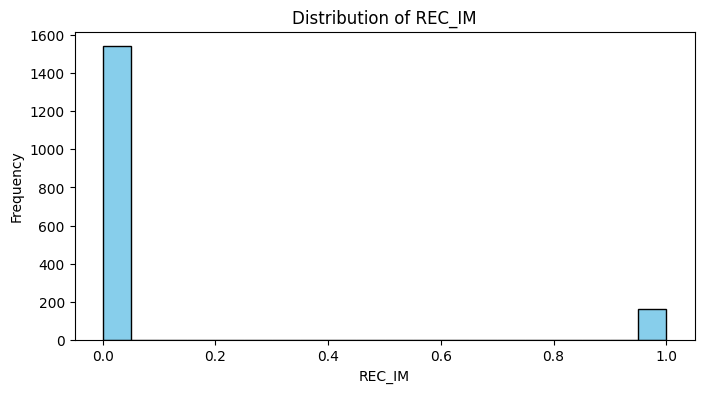

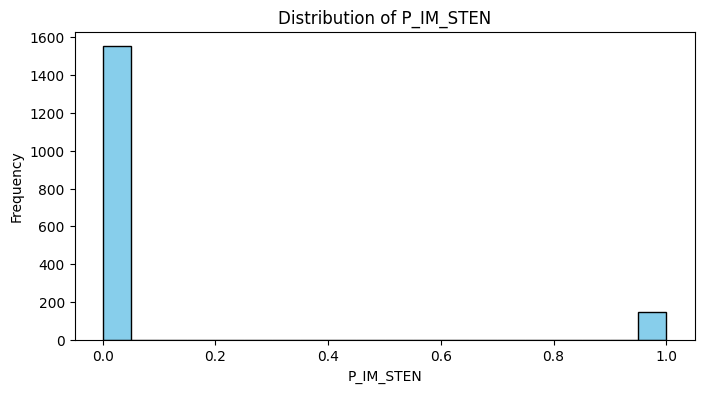

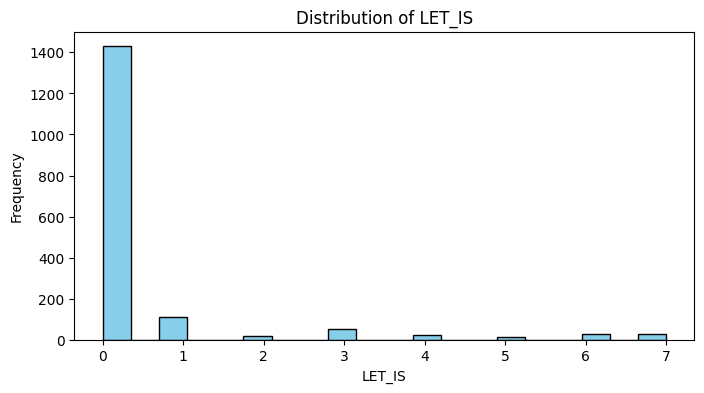

In [83]:
for column in df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

### <p style="font-family: 'Comic Sans MS';padding: 10px; font-weight: bold;">3.2 Phân bố các biến numiral trong biến df_num</p>

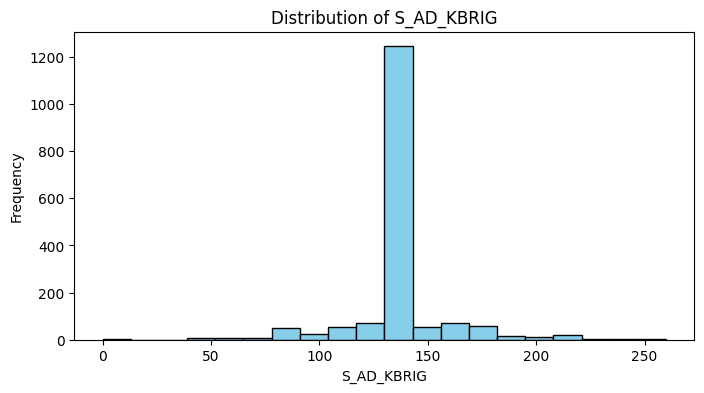

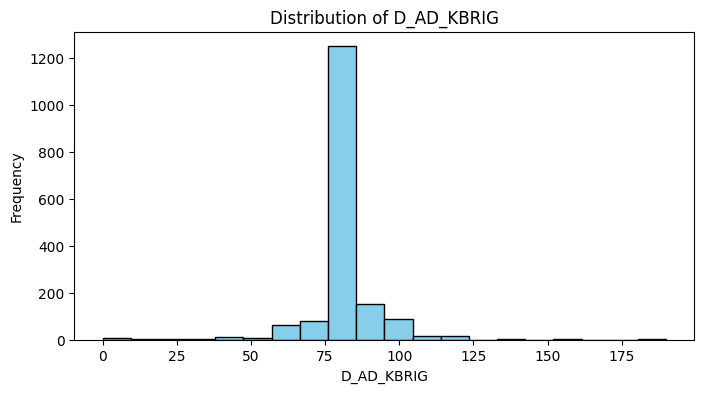

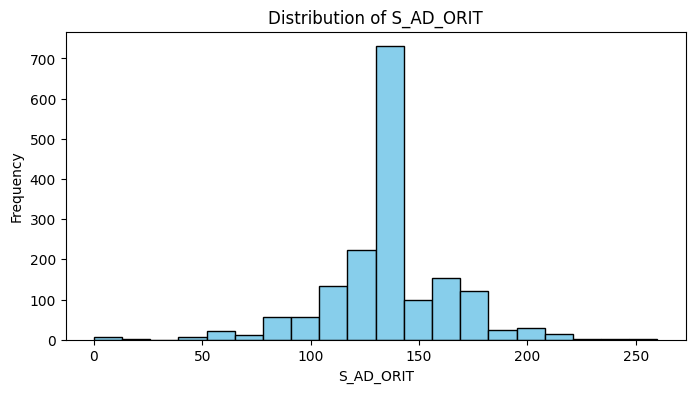

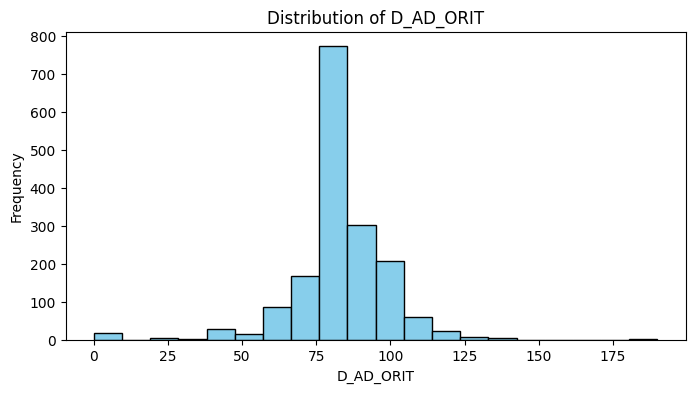

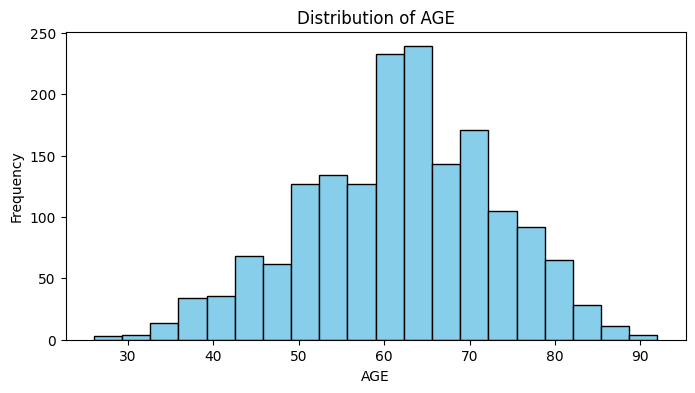

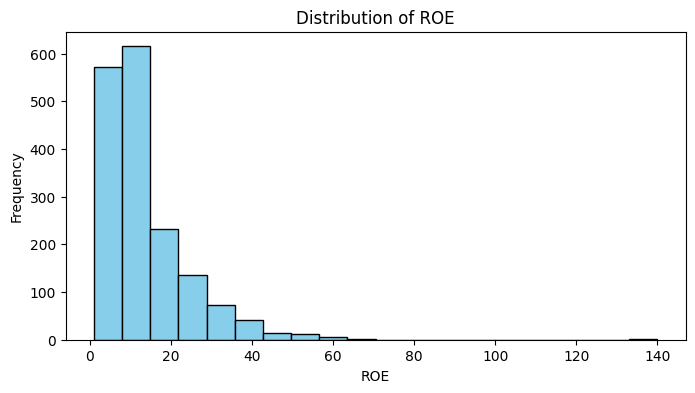

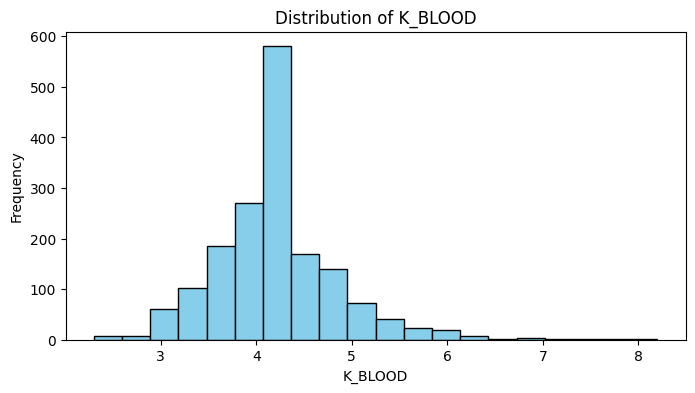

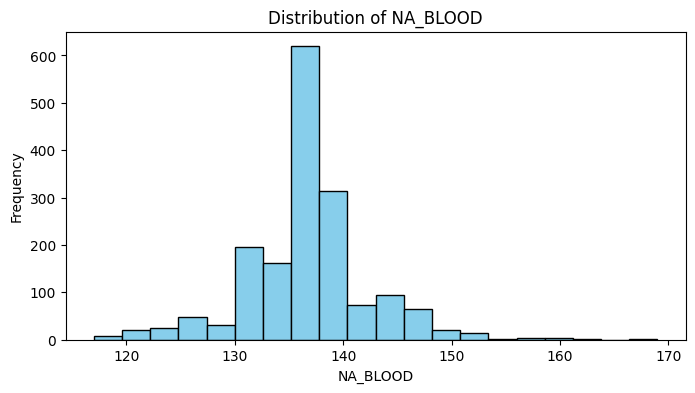

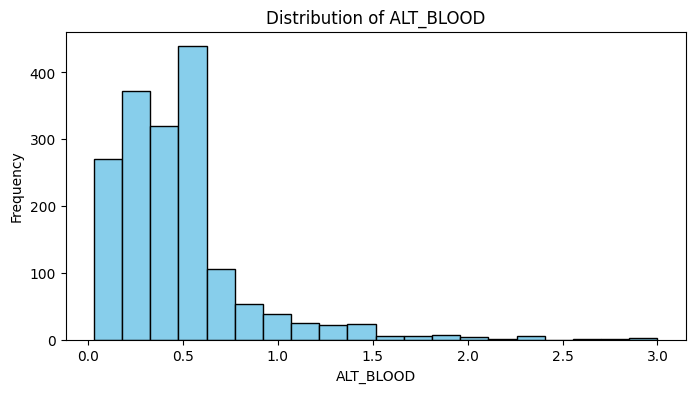

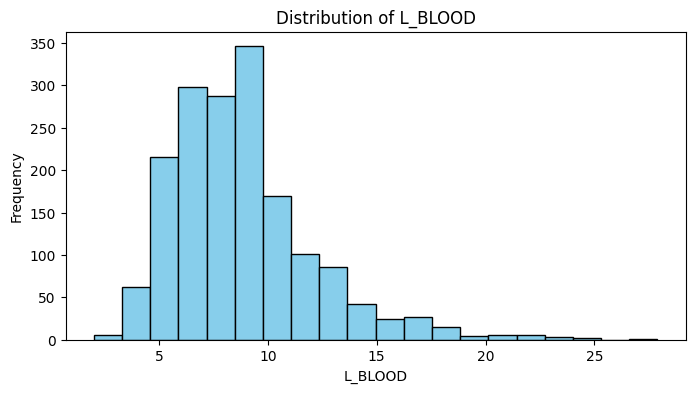

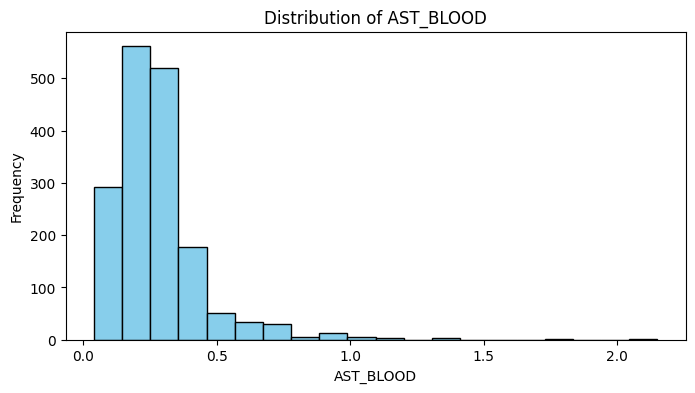

In [84]:
for column in df_num.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df_num[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

### <p style="font-family: 'Comic Sans MS';padding: 10px; font-weight: bold;">3.2 Tỷ lệ % của các biến trong tập dữ liệu</p>

In [85]:
df_cat = df.drop(columns=numerical_cols)

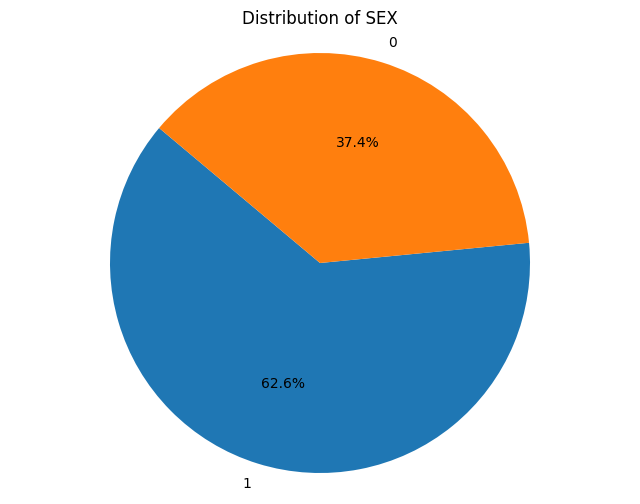


EXPLANATION:
The pie chart illustrates the distribution of sex among patients:
  - '0' represents Females
  - '1' represents Males
This helps to understand the gender distribution in the dataset.



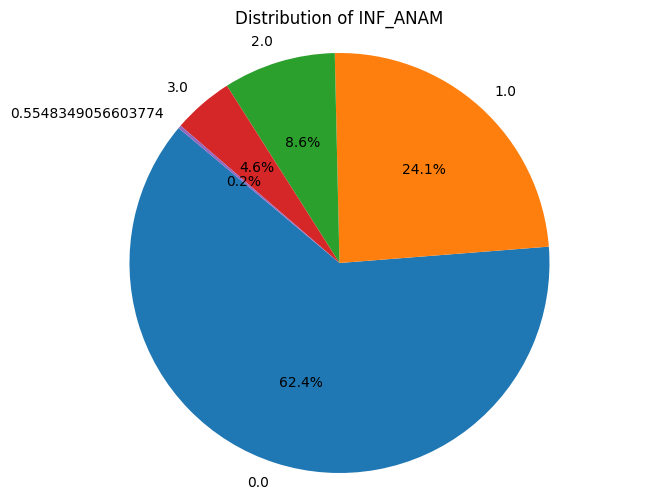

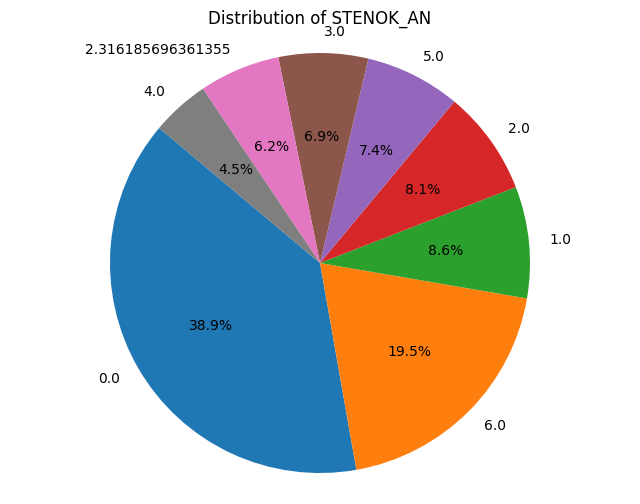

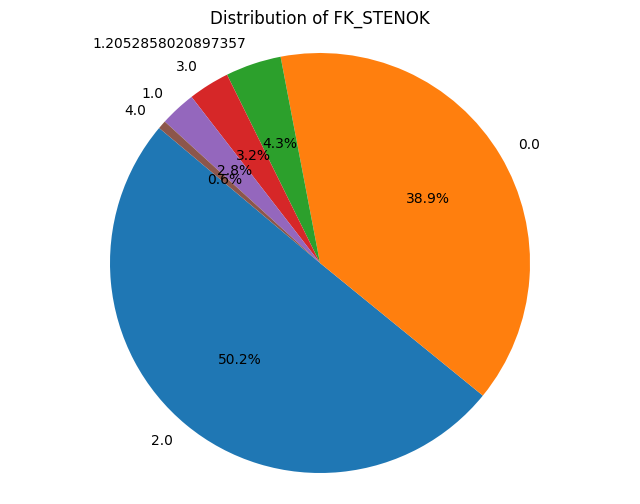

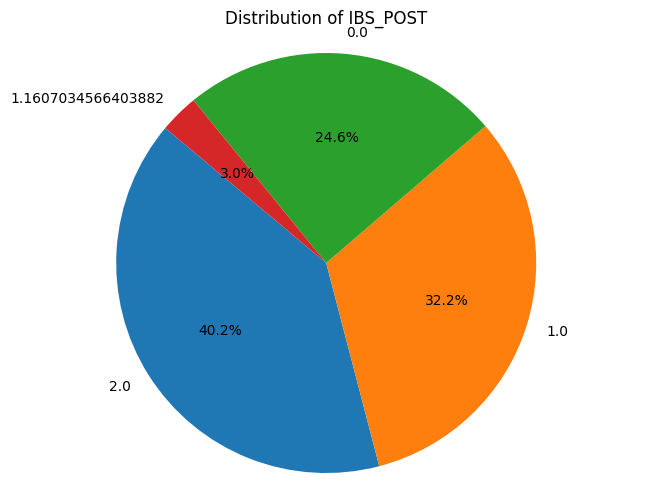

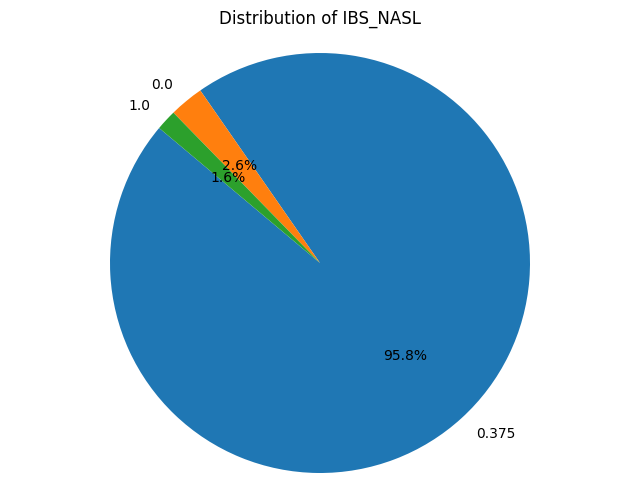

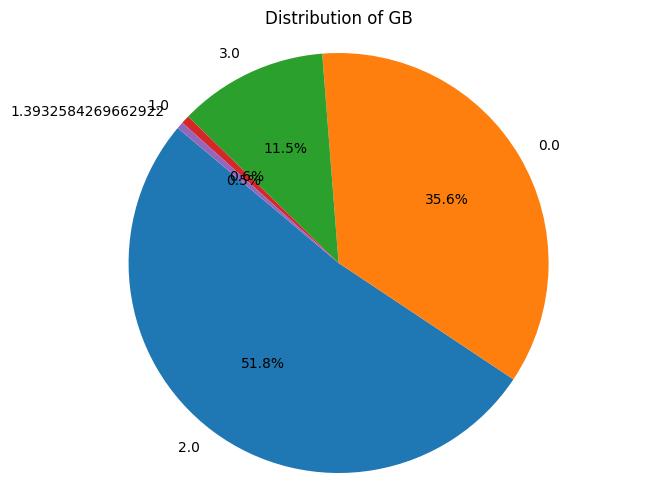

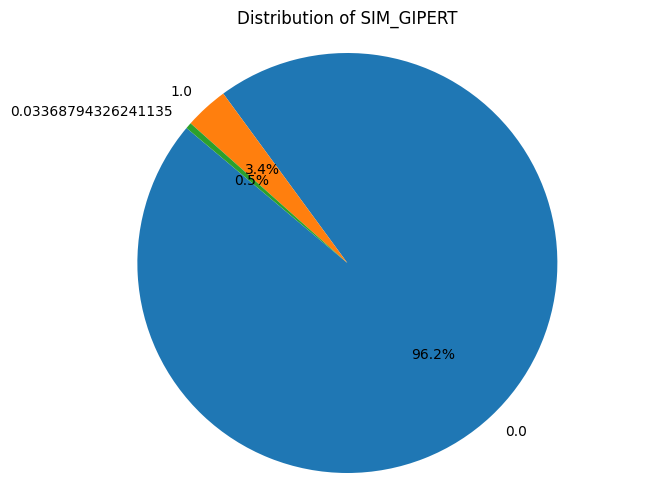

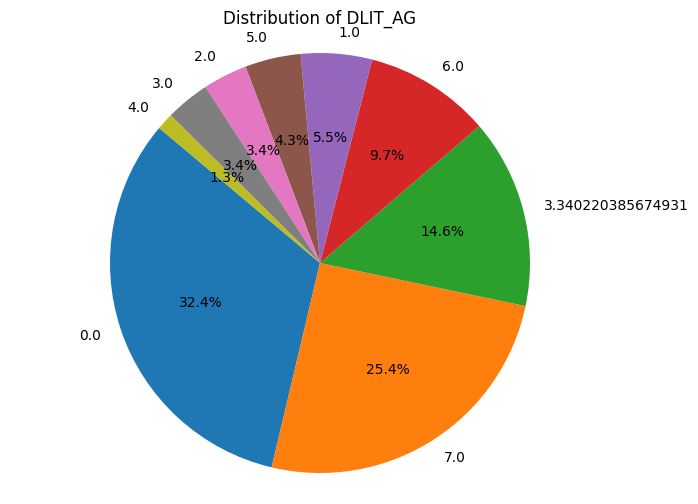

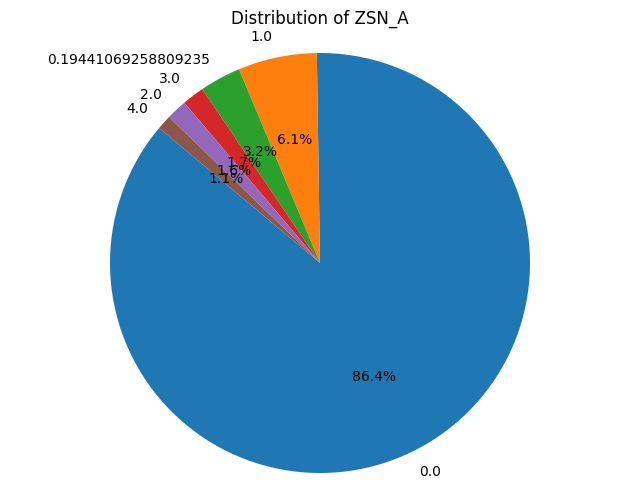

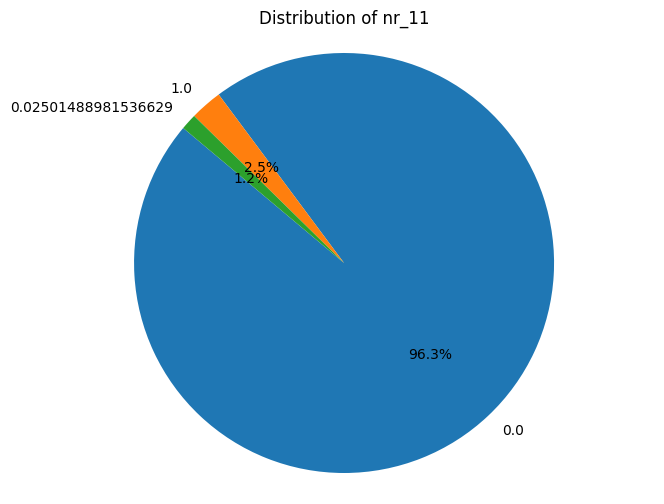

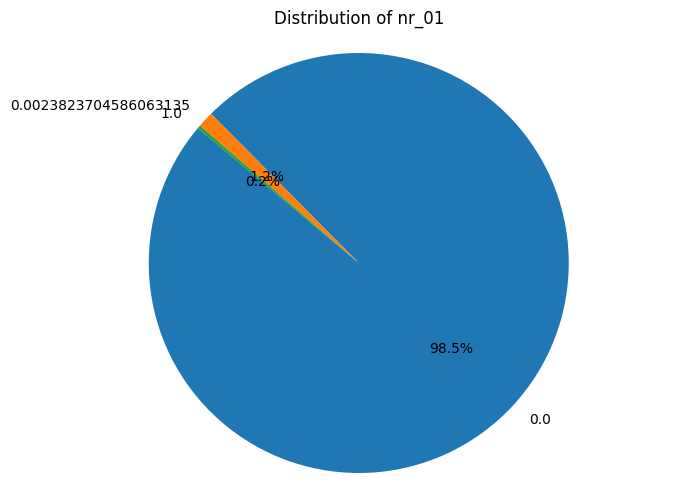

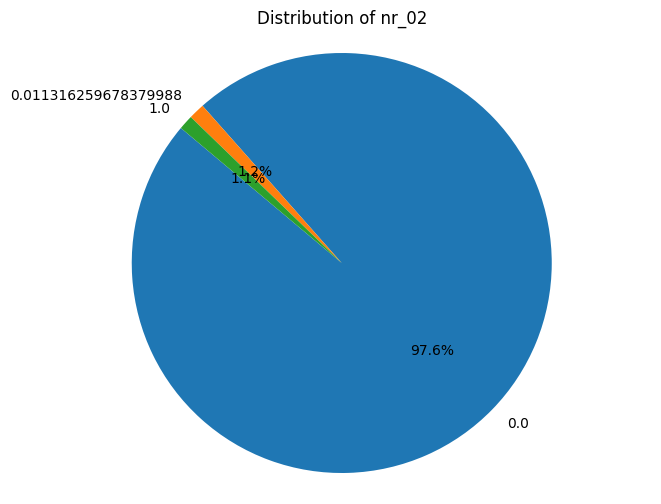

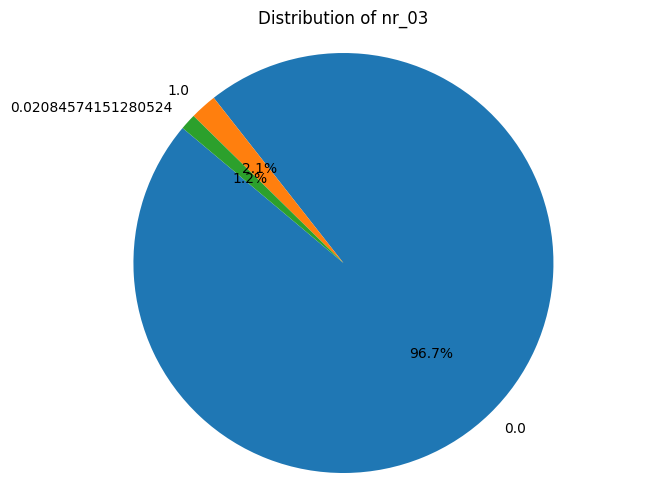

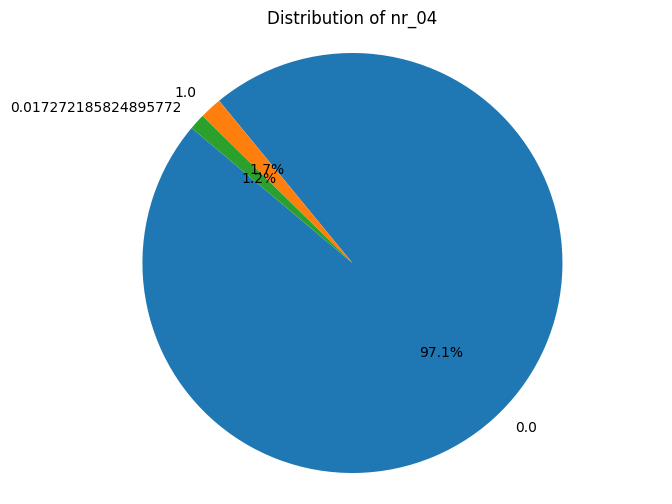

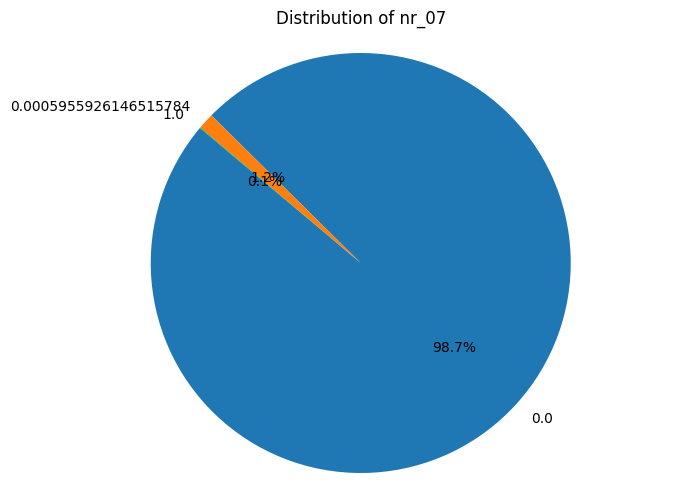

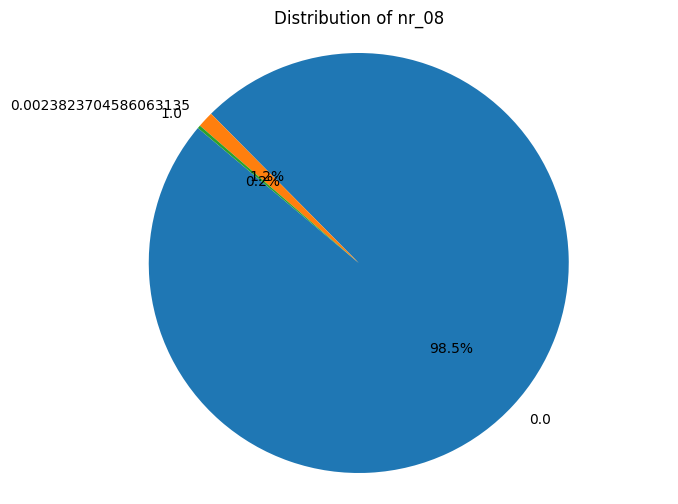

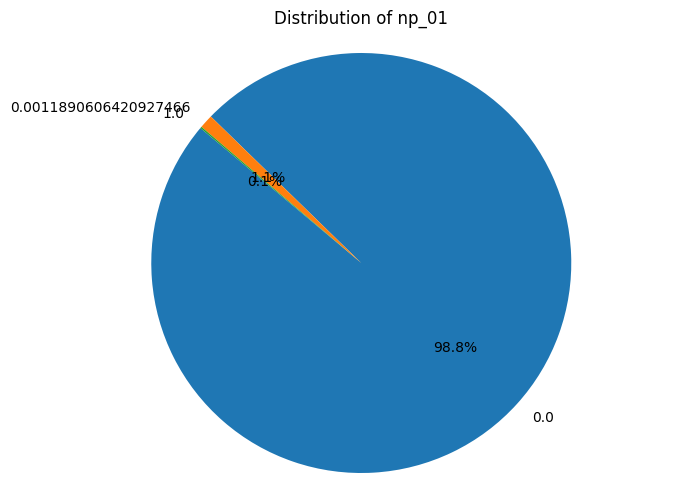

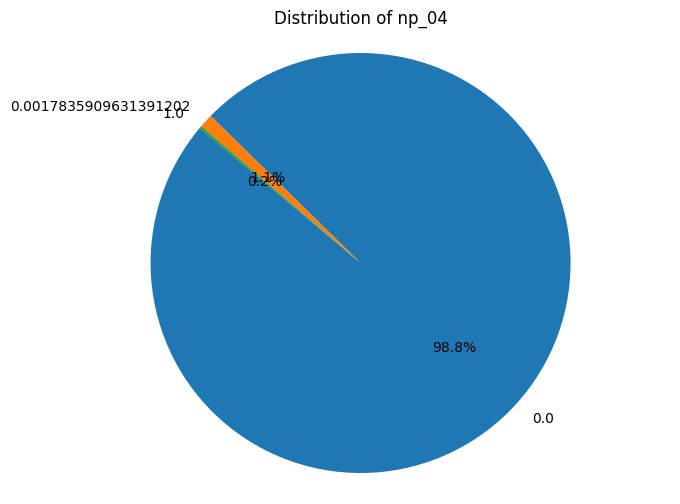

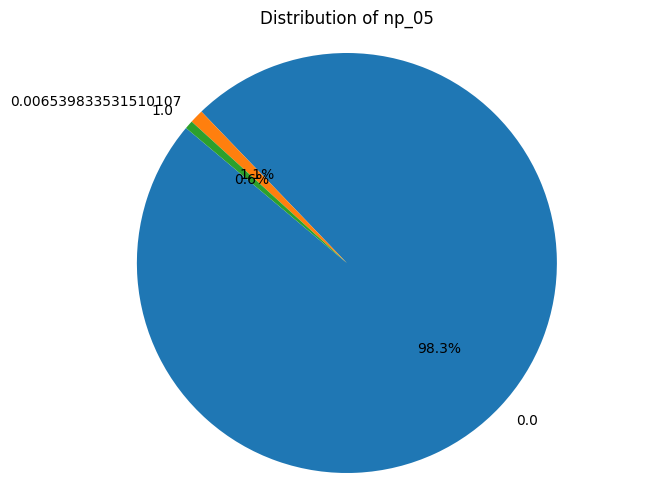

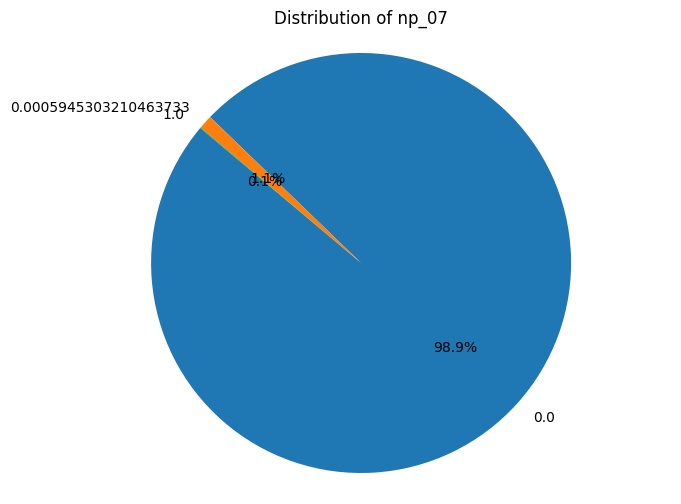

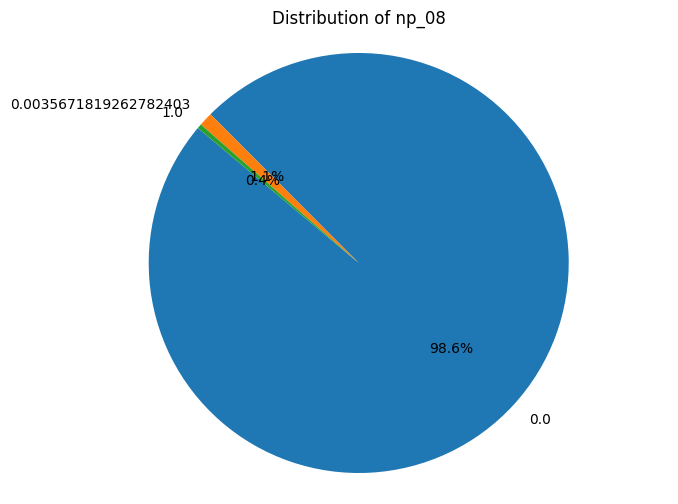

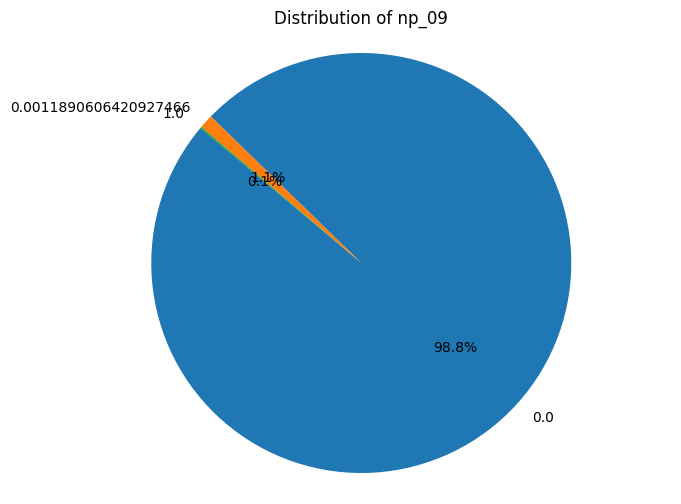

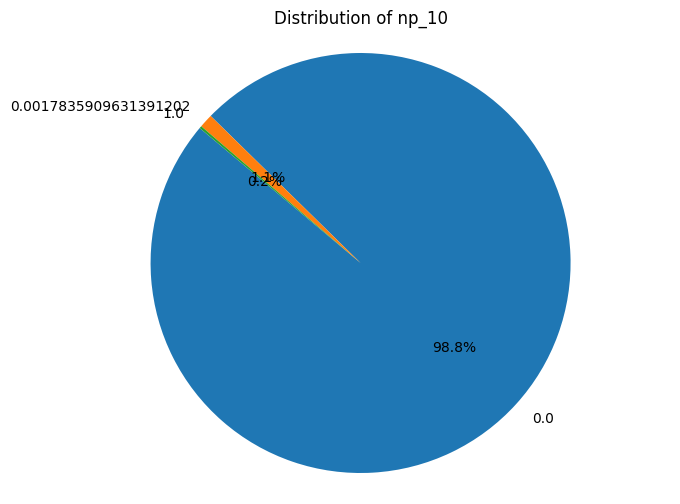

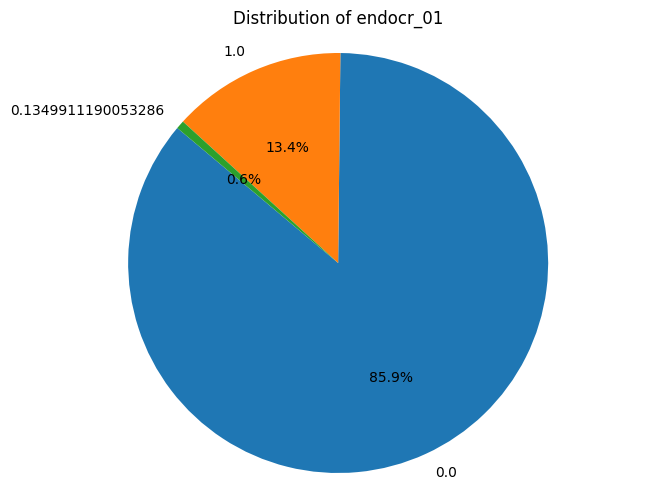

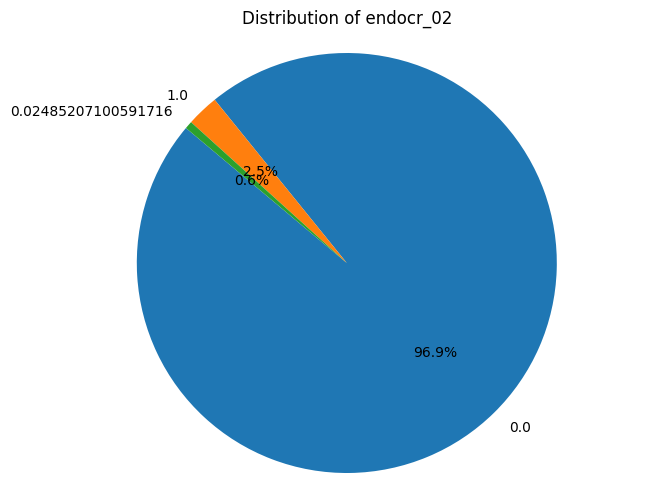

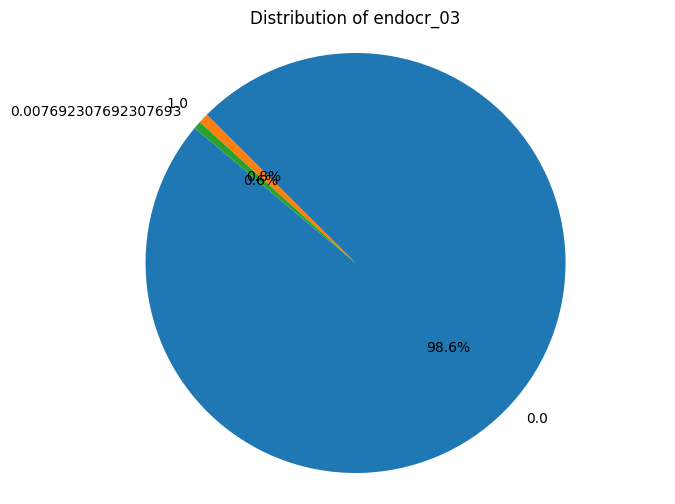

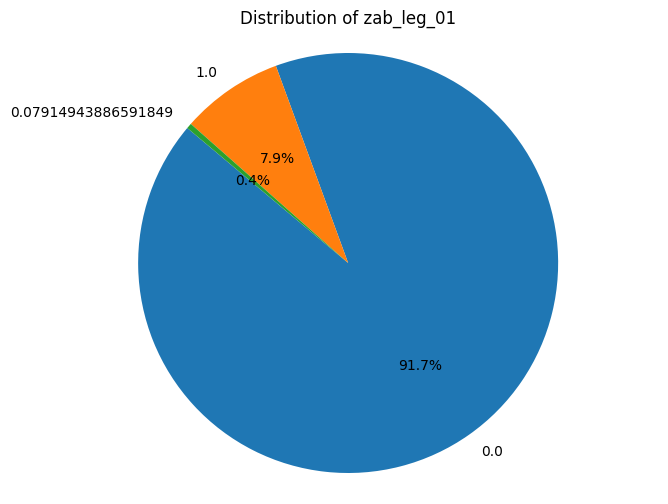

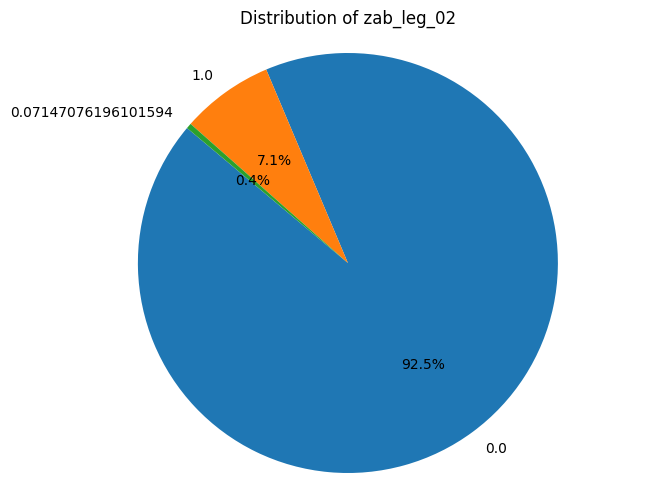

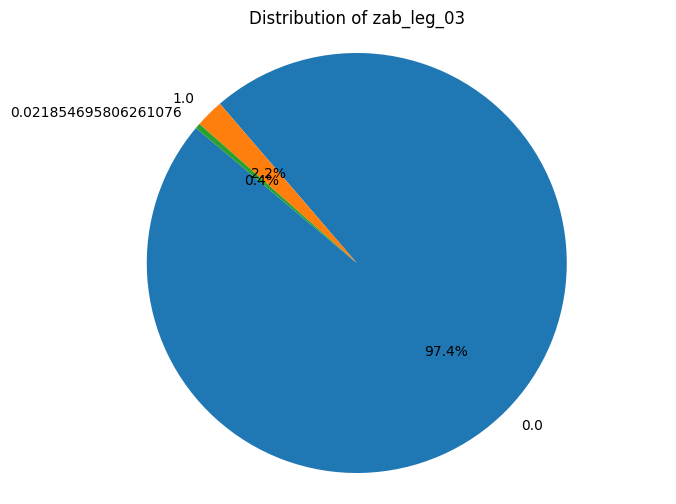

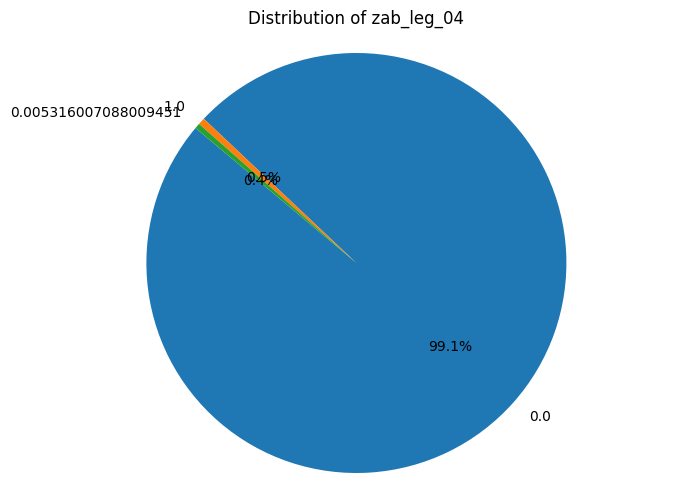

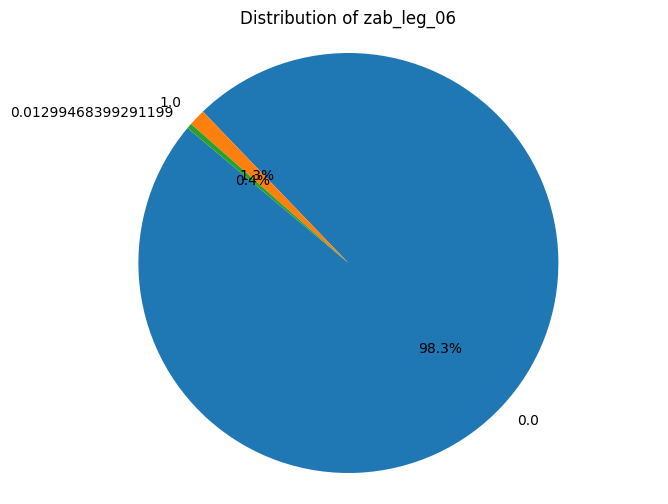

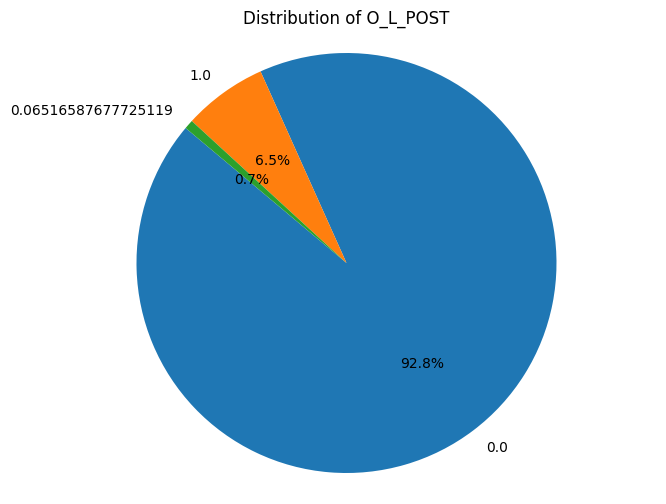

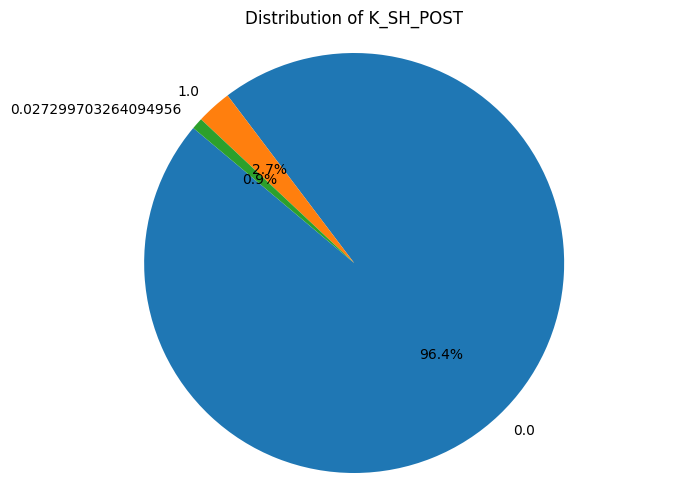

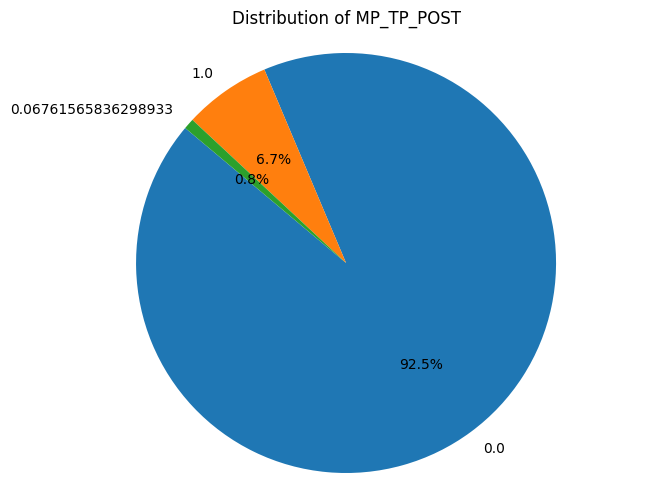

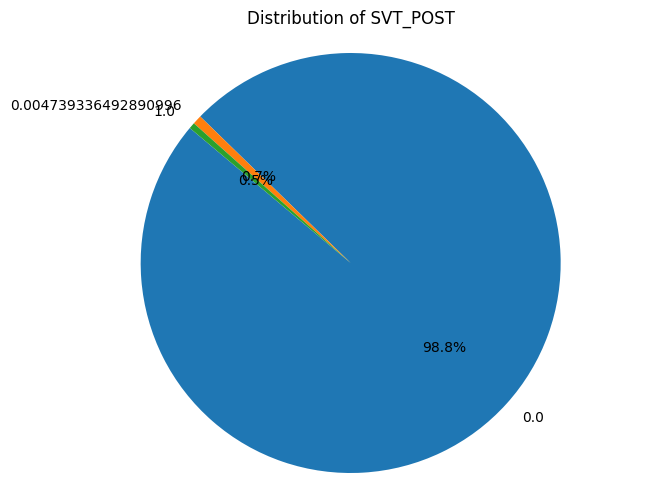

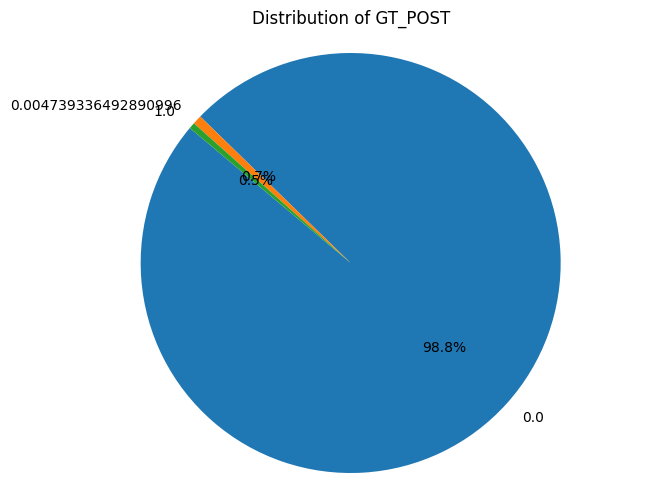

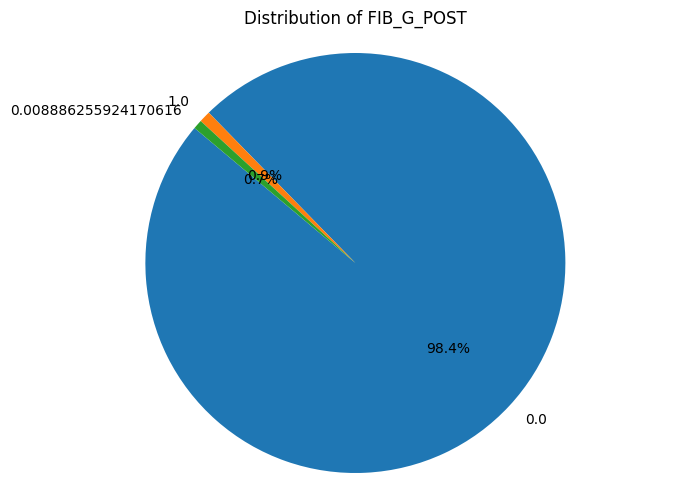

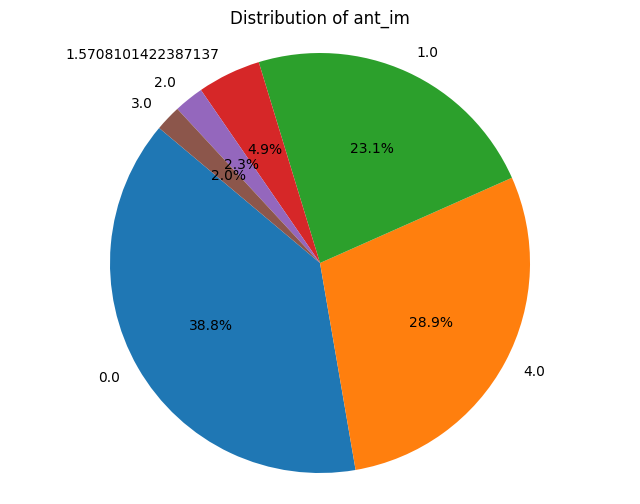

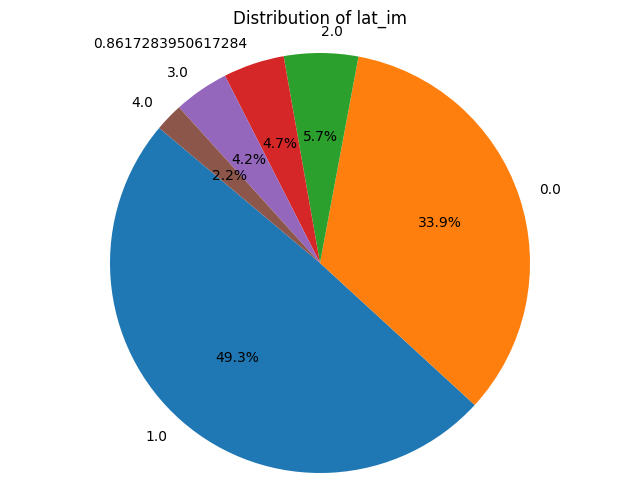

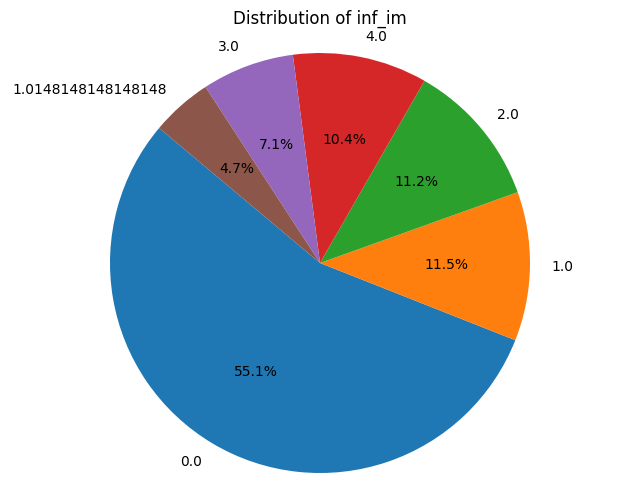

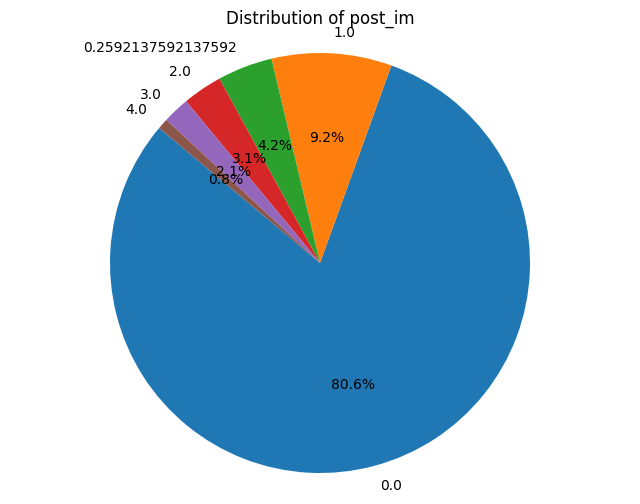

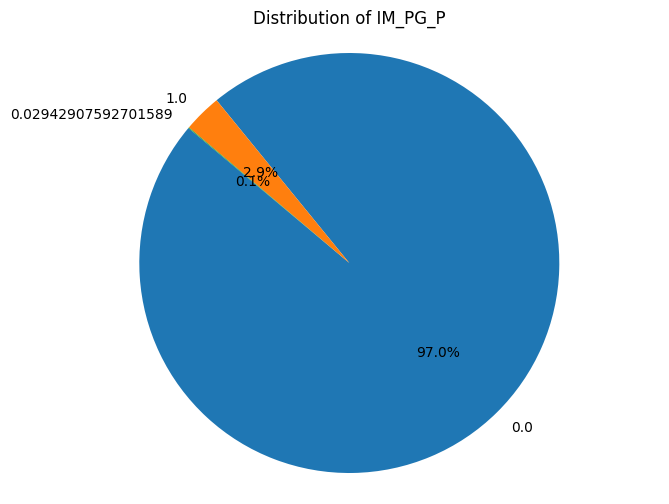

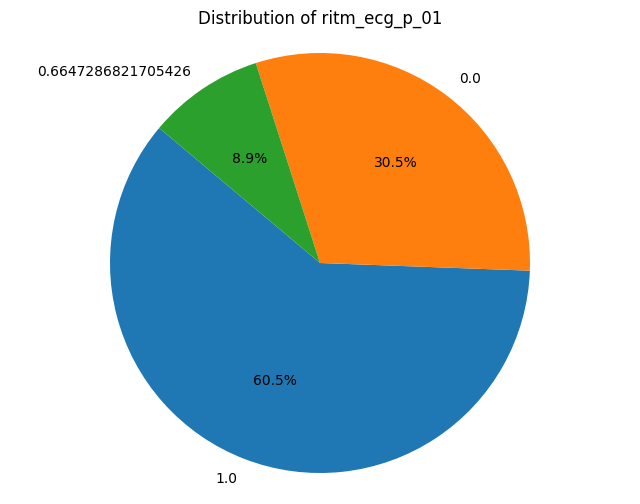

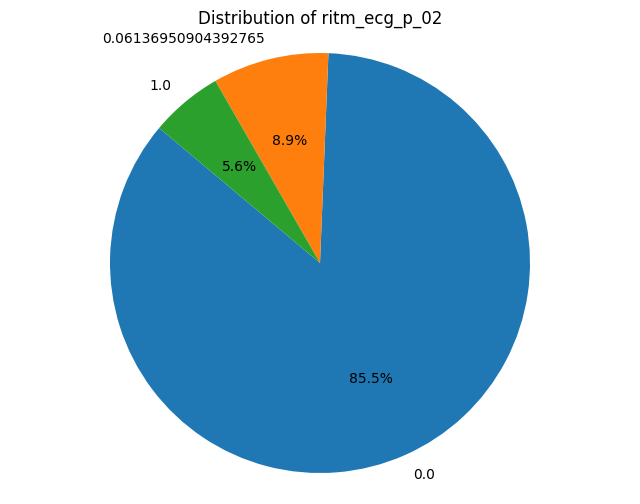

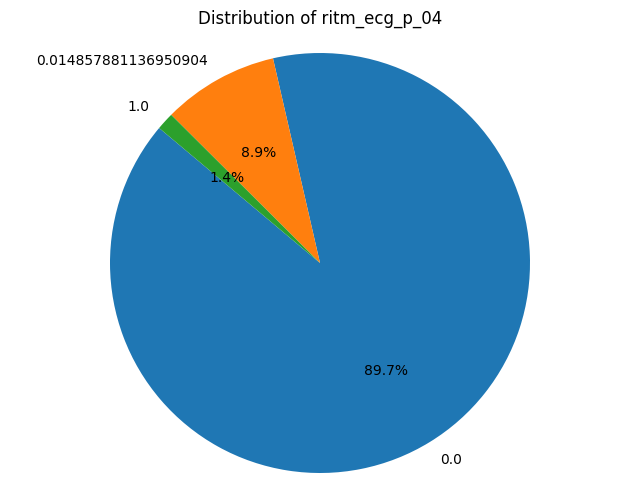

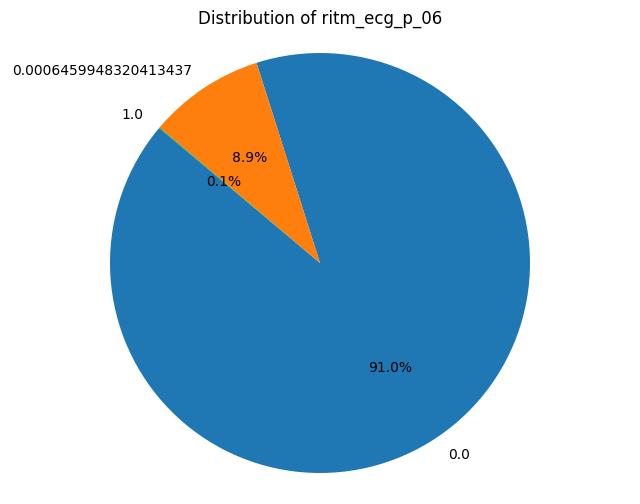

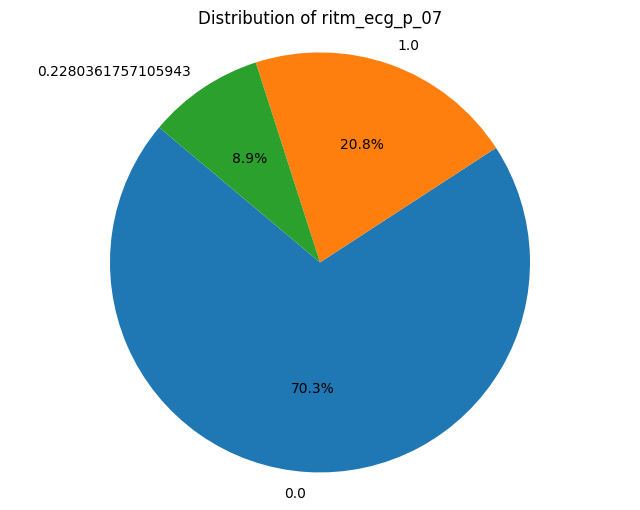

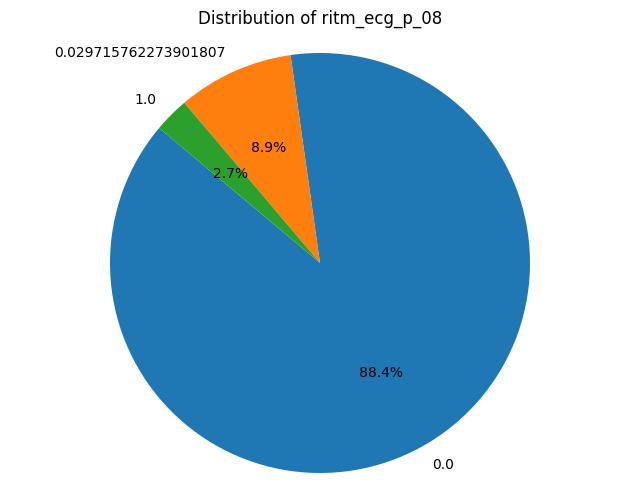

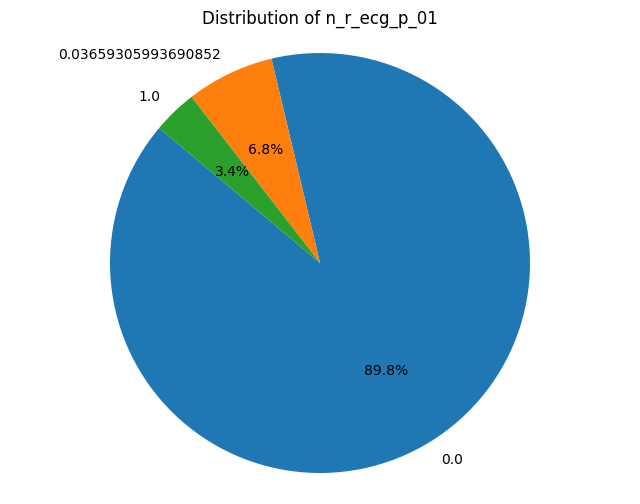

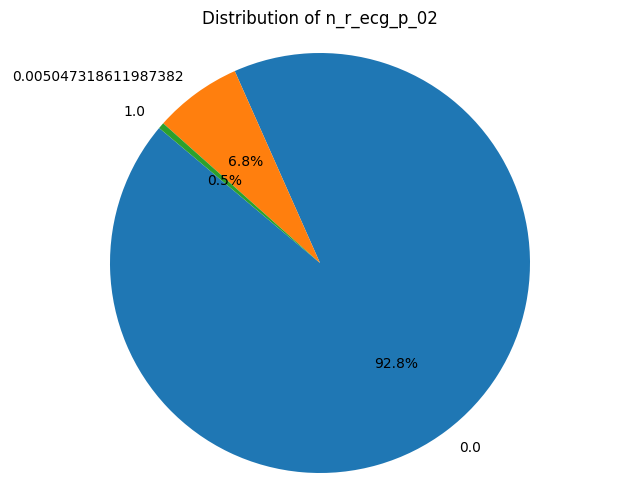

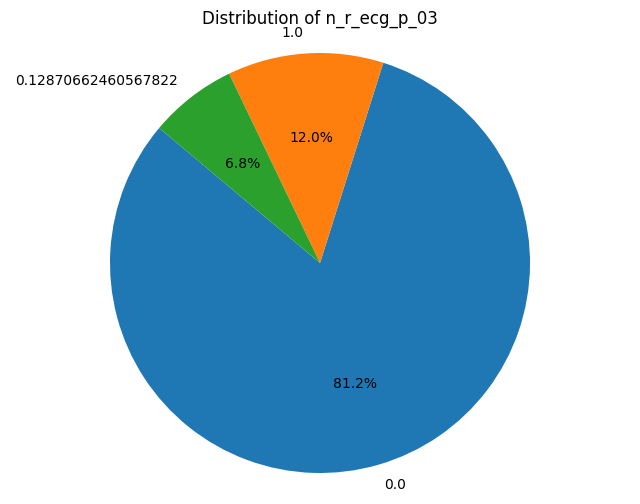

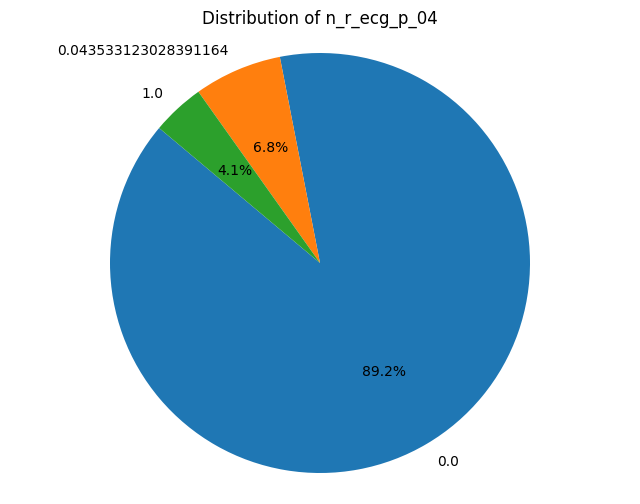

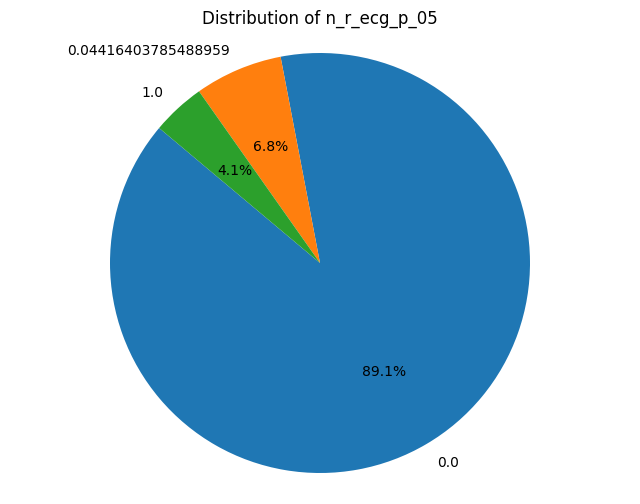

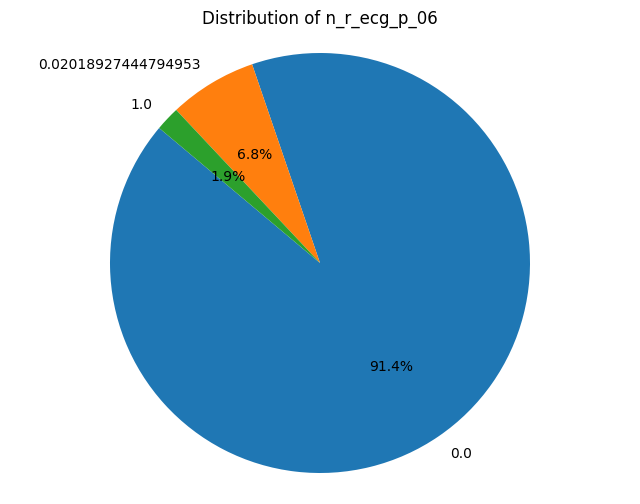

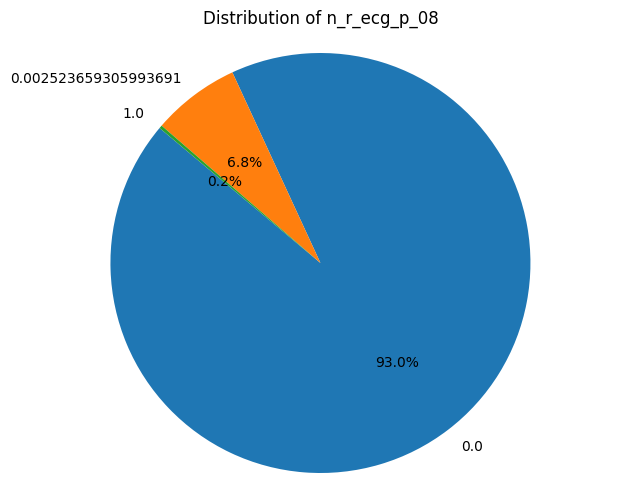

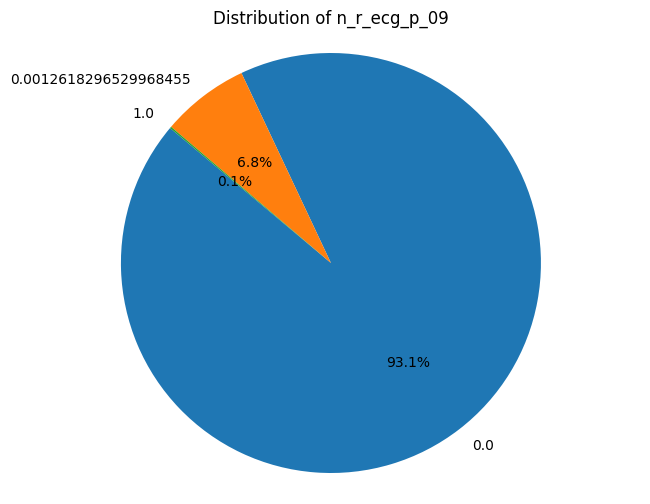

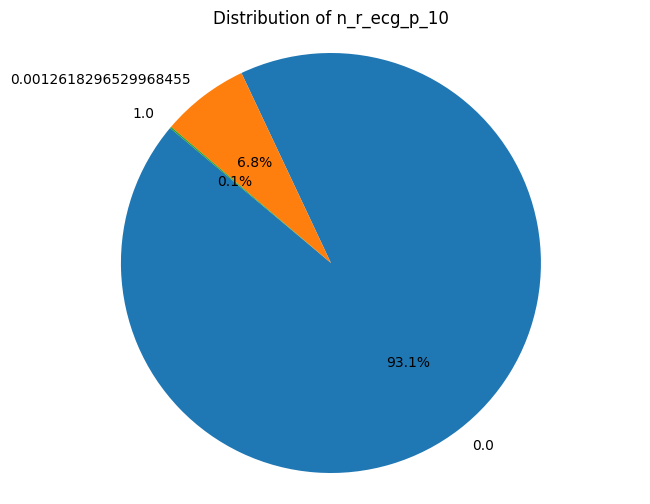

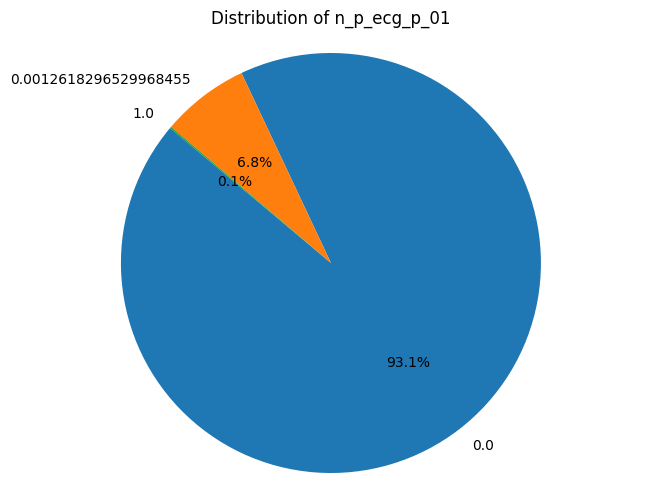

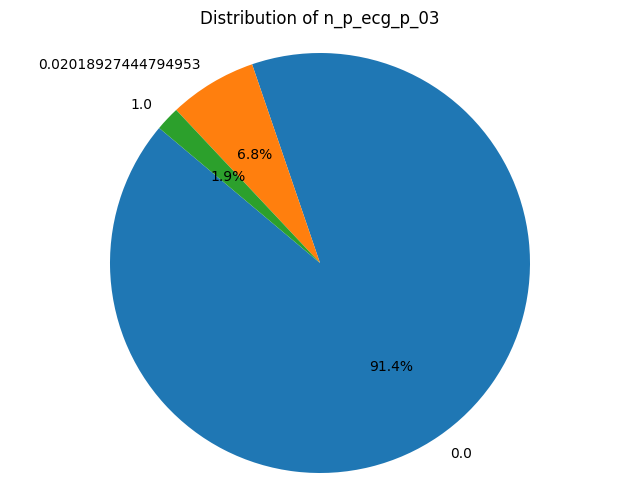

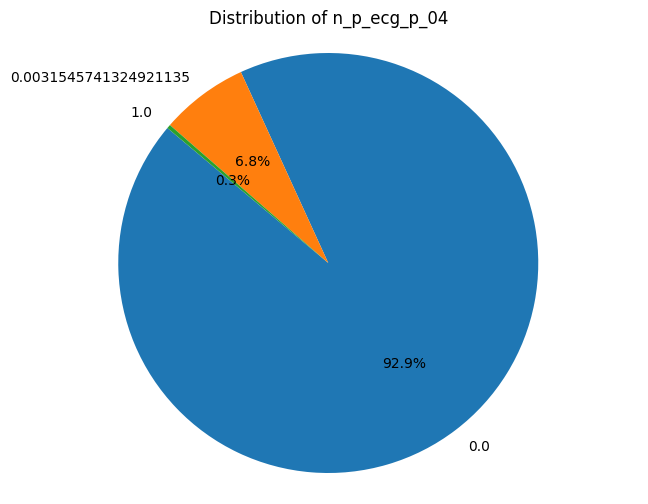

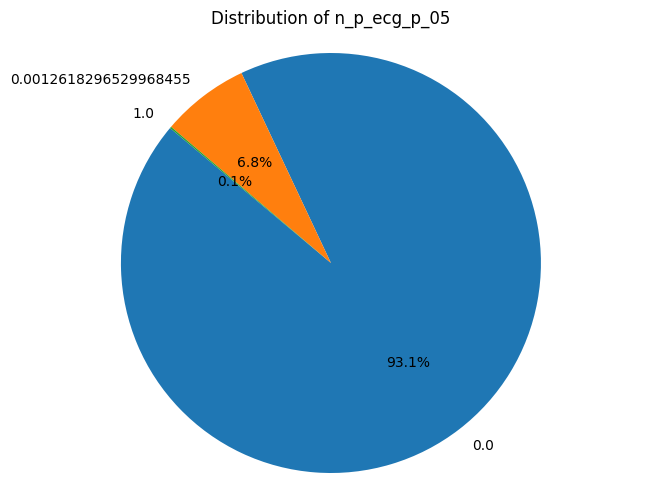

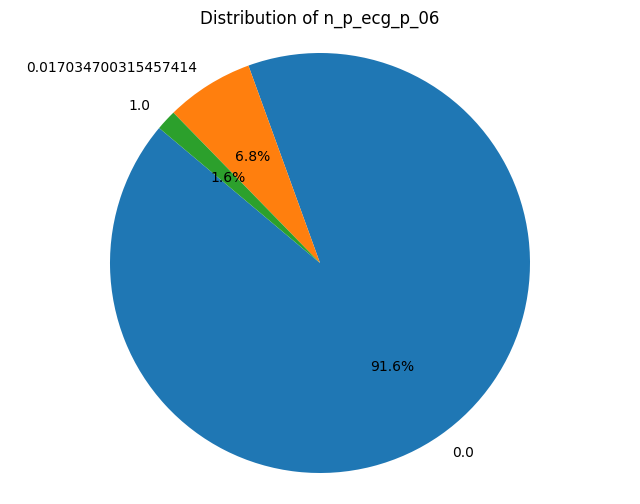

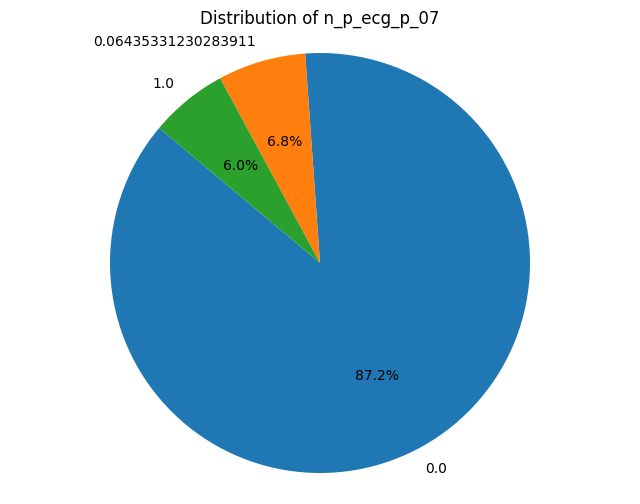

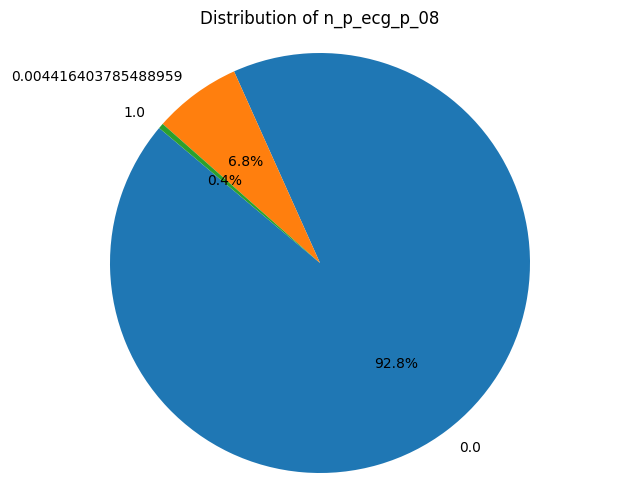

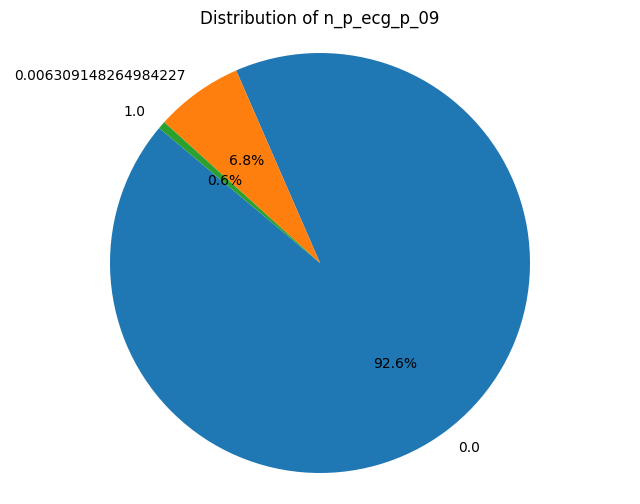

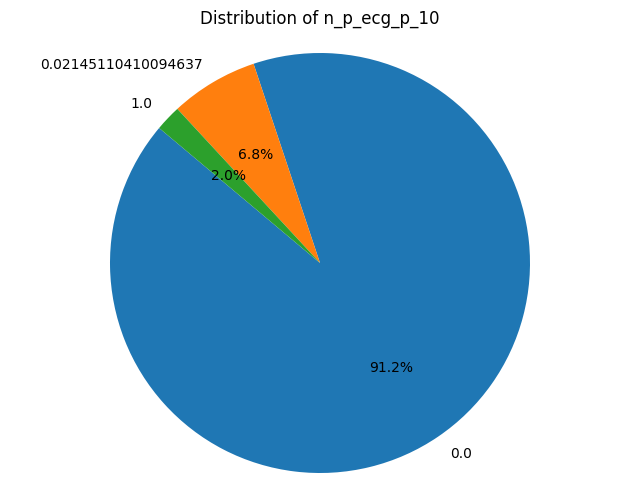

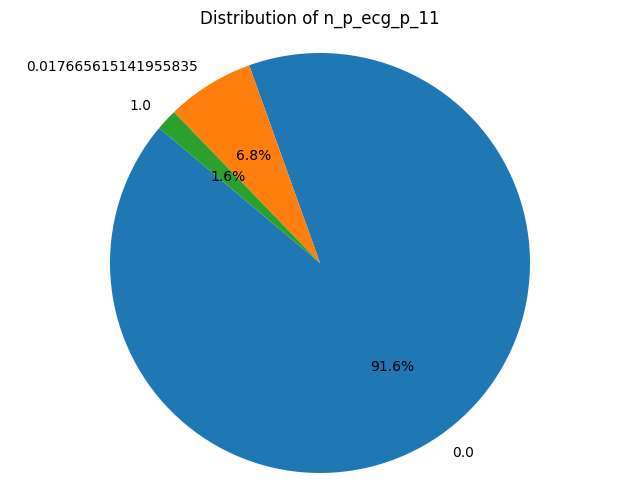

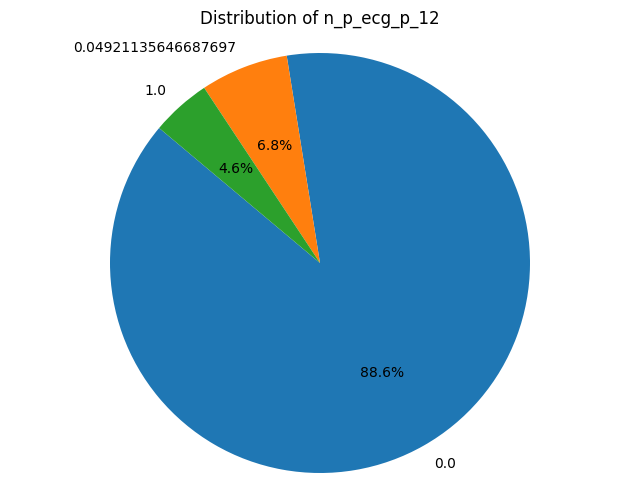

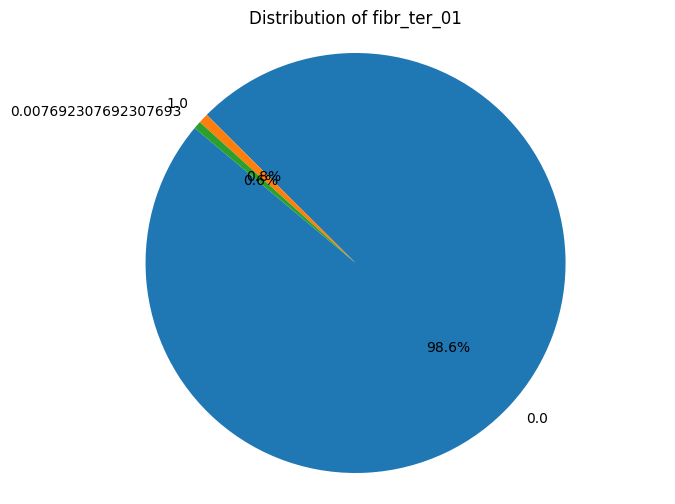

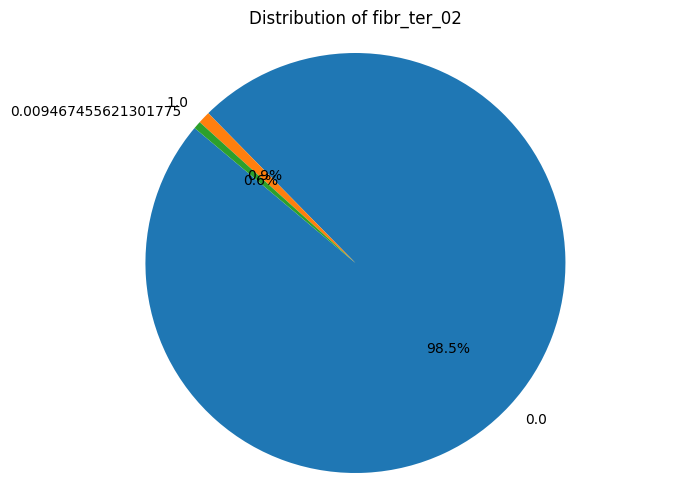

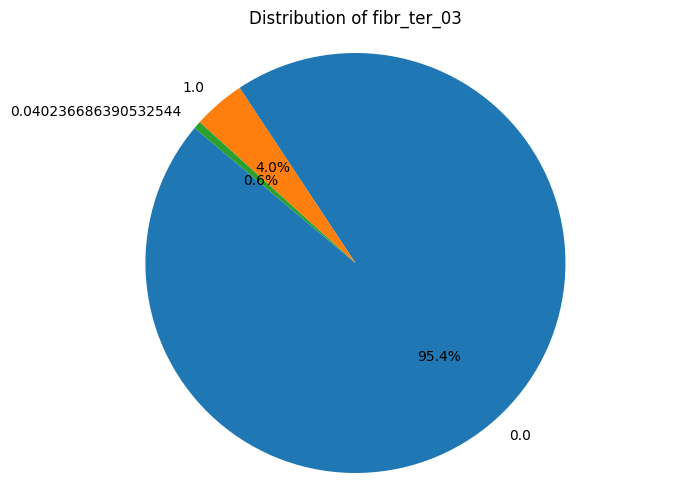

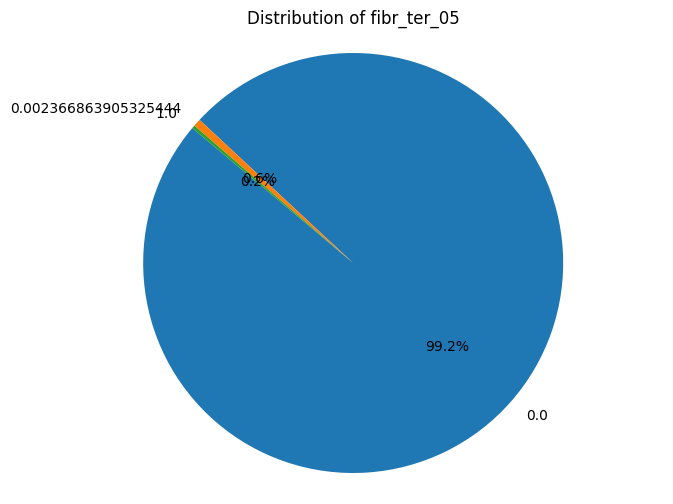

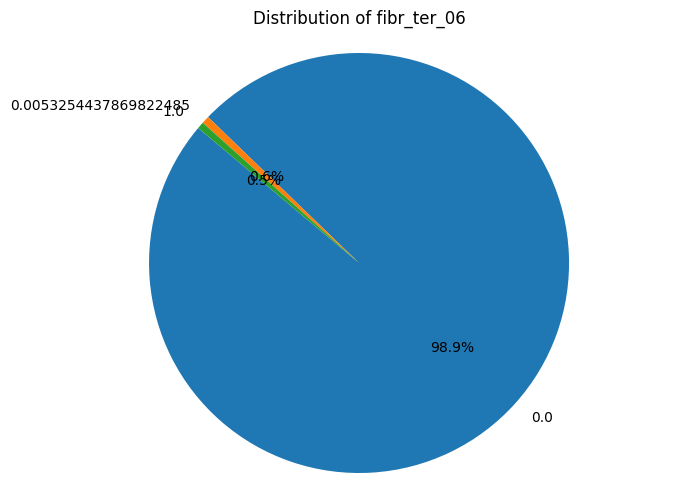

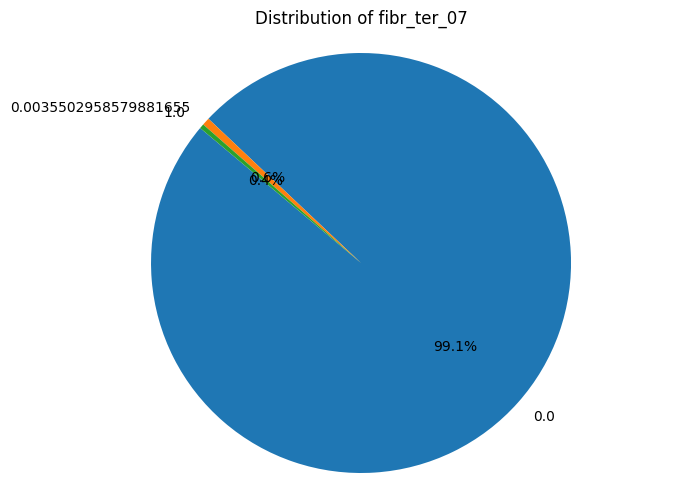

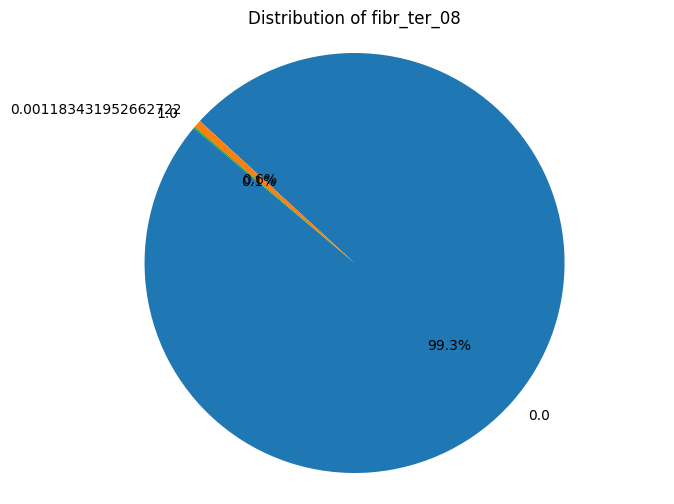

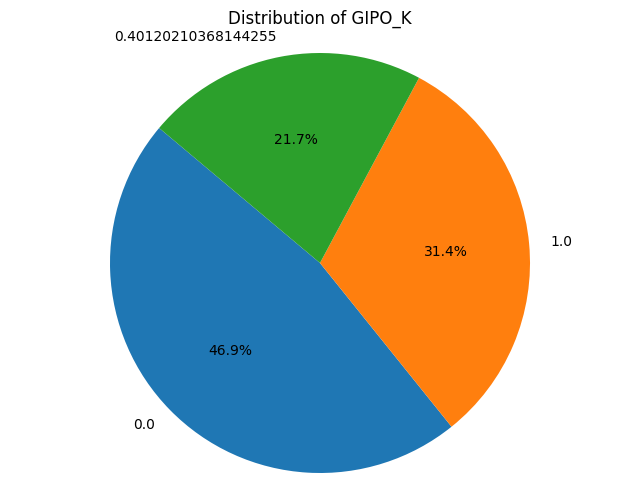

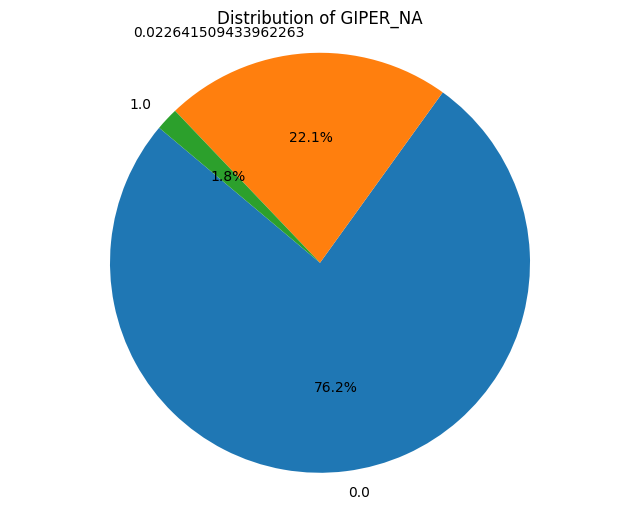

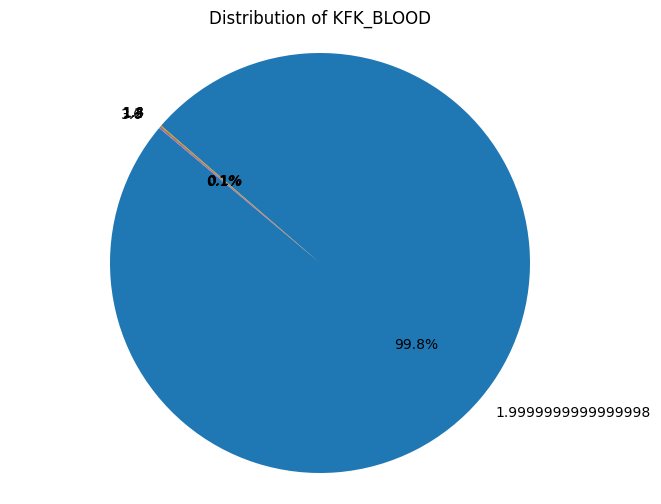

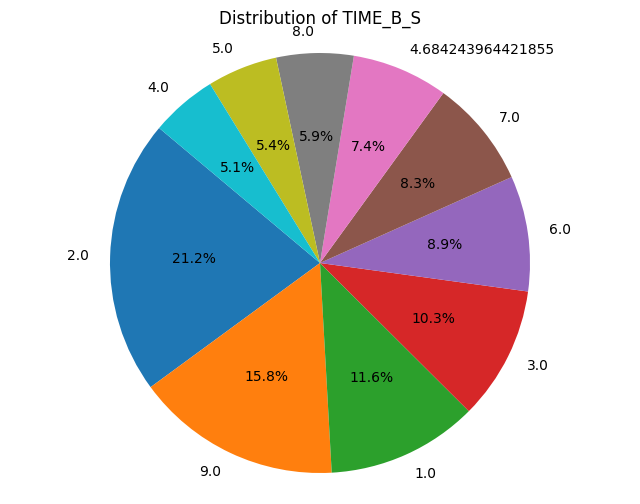

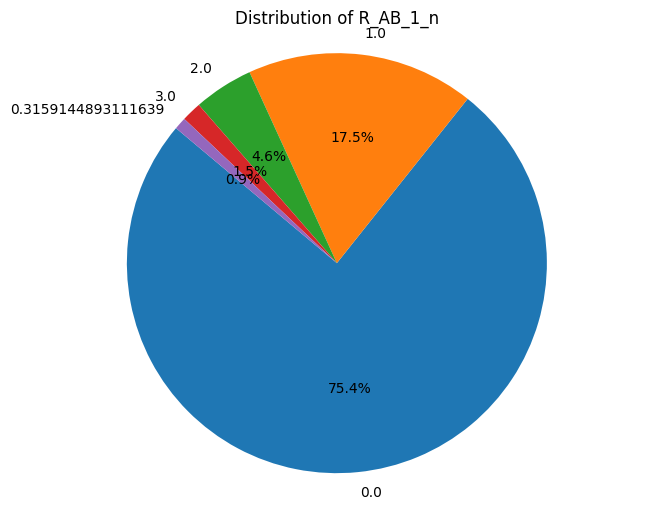

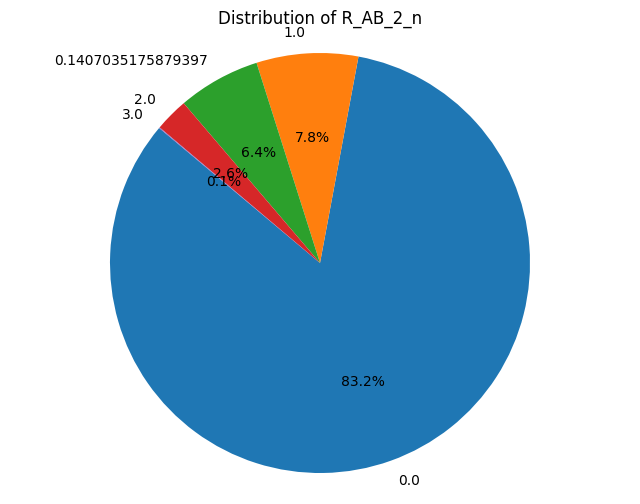

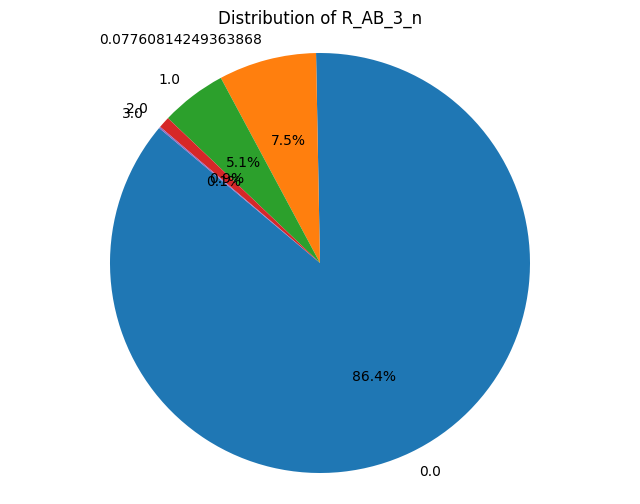

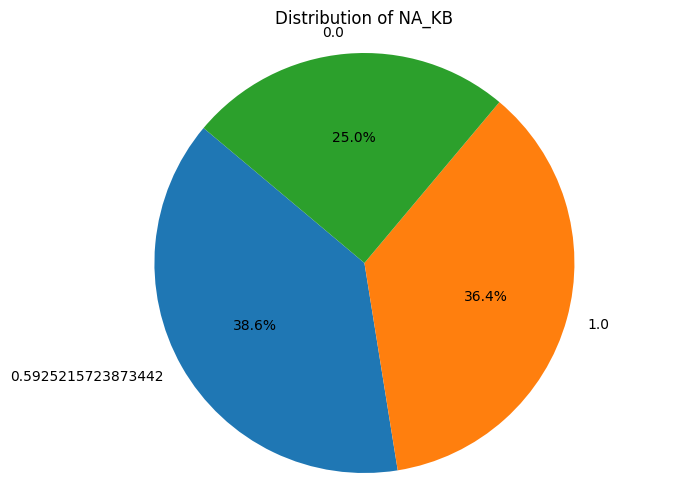

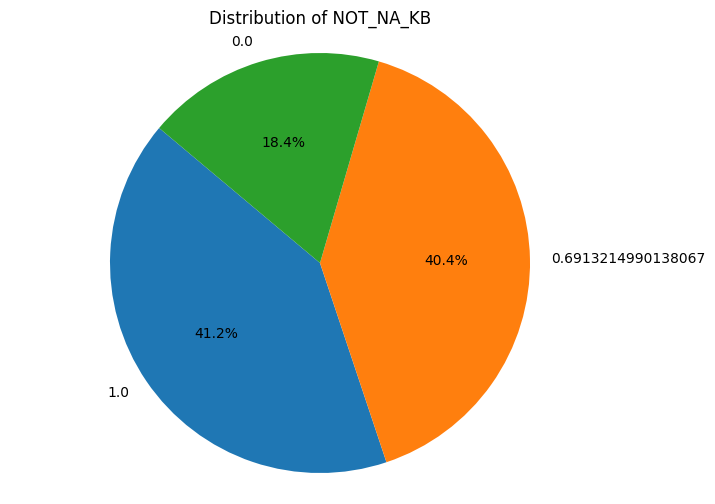

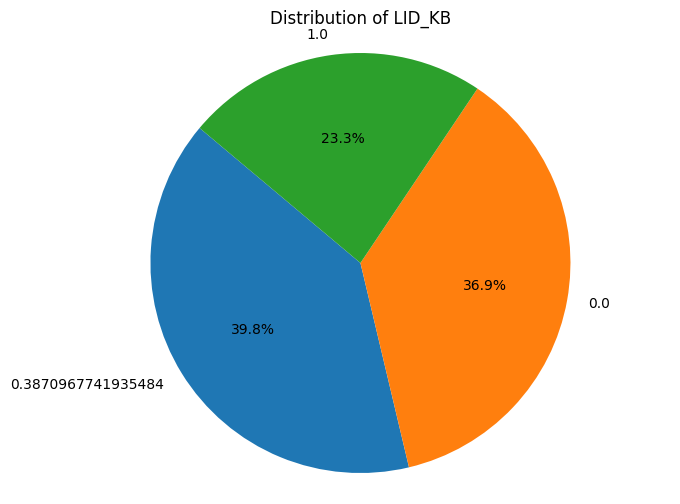

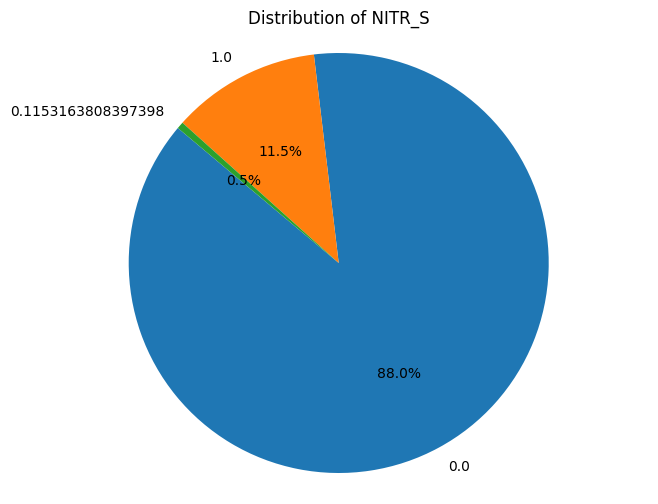

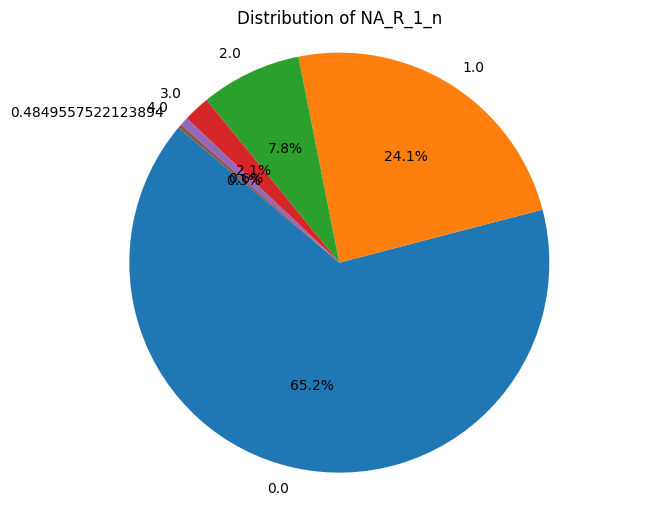

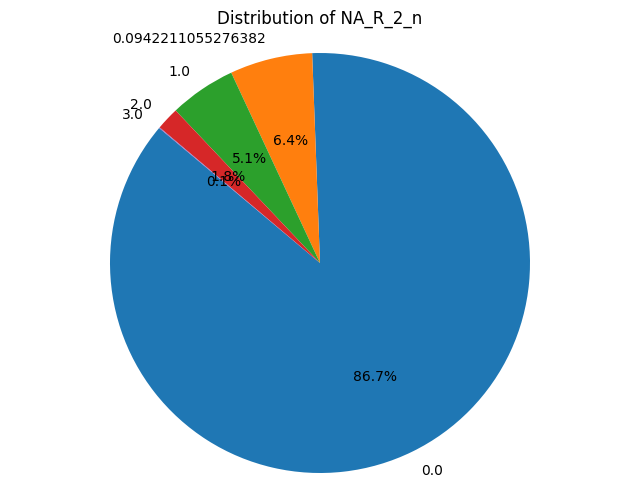

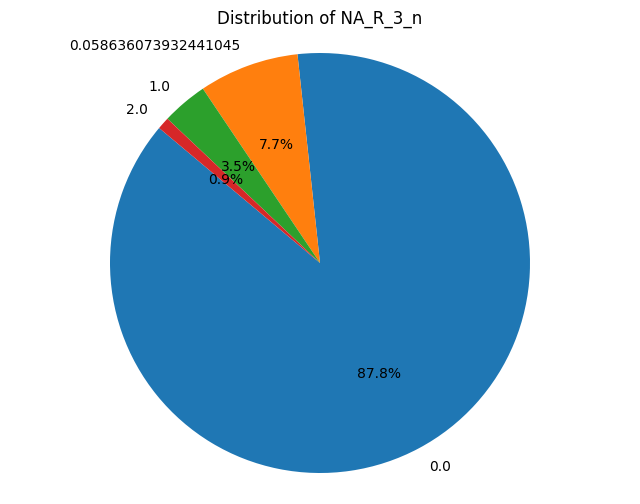

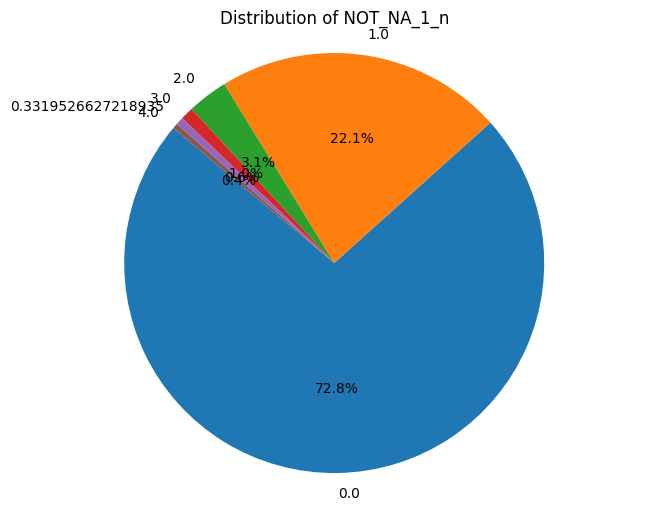

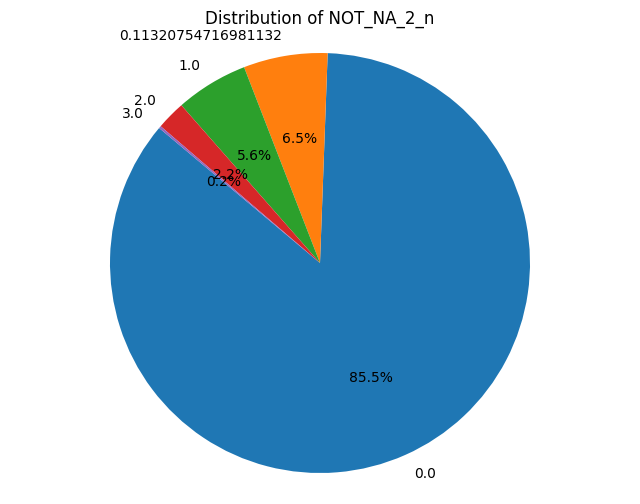

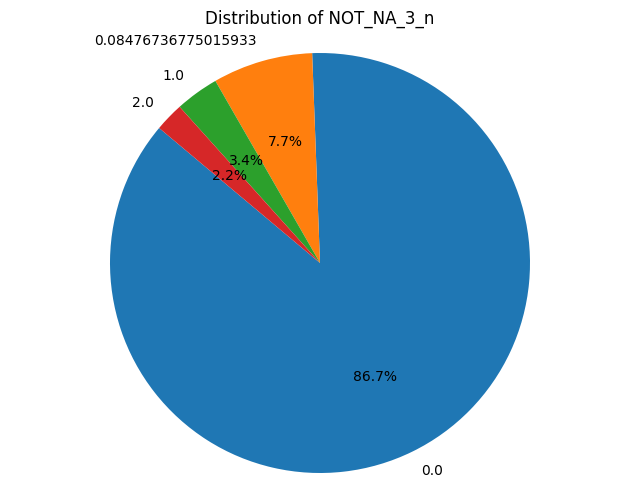

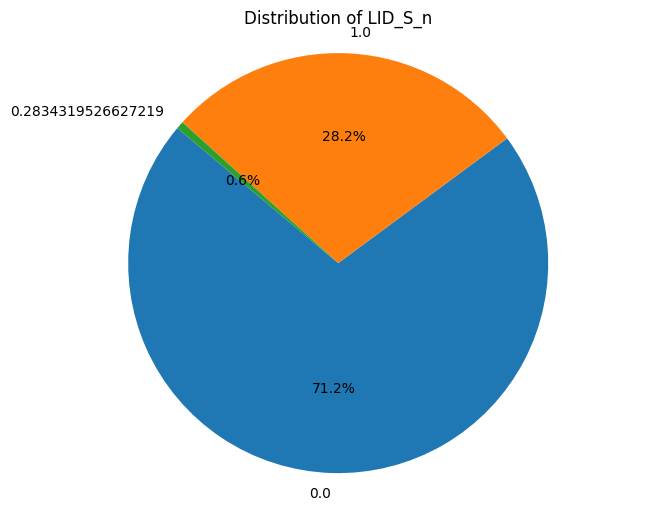

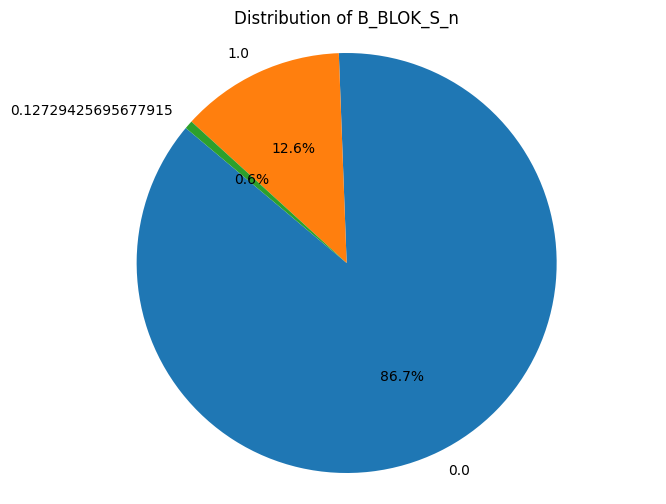

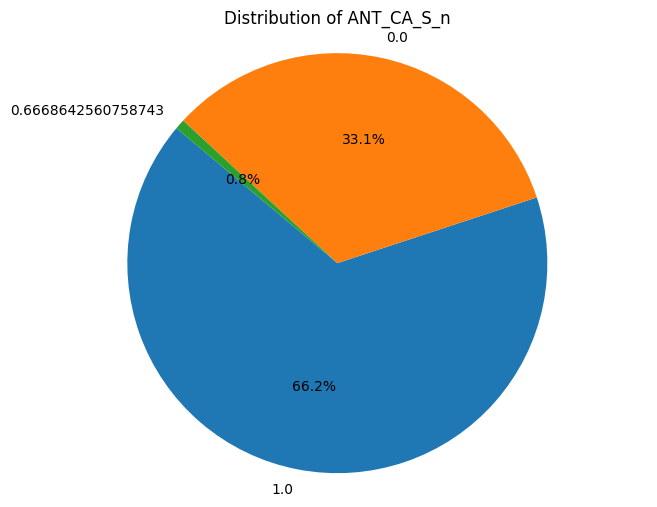

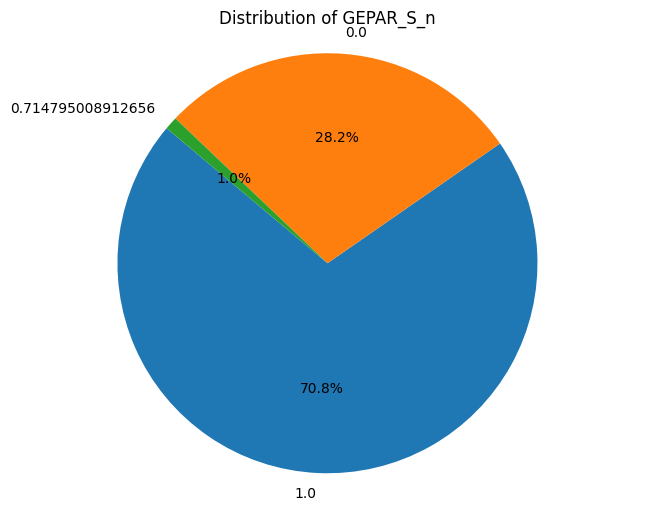

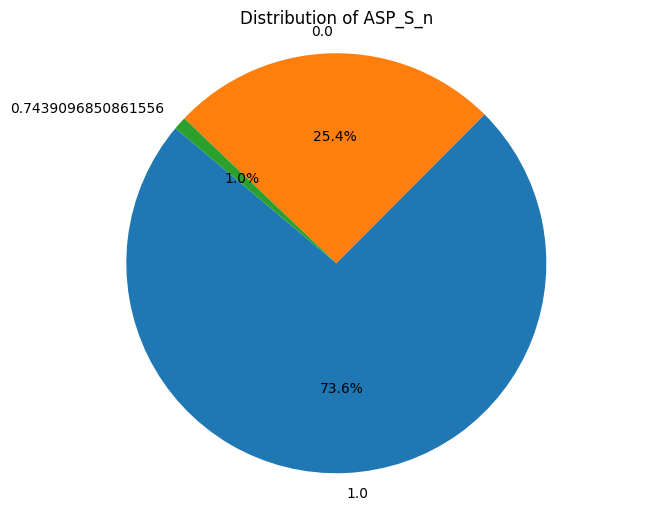

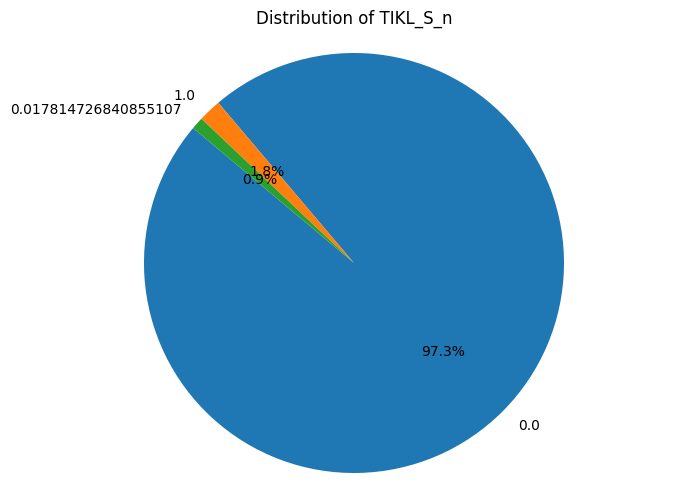

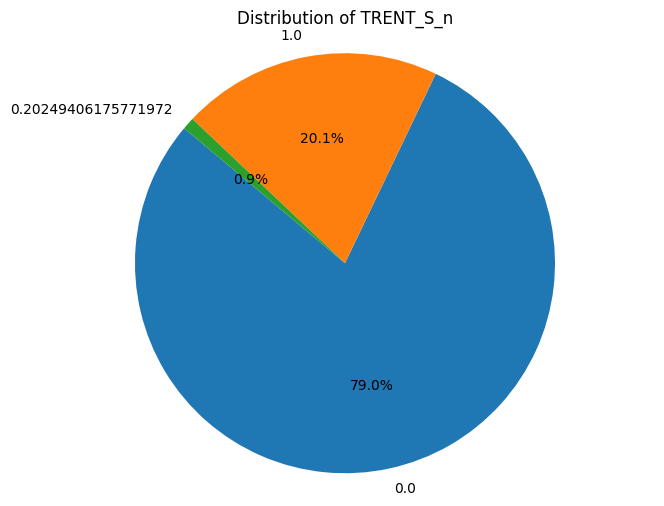

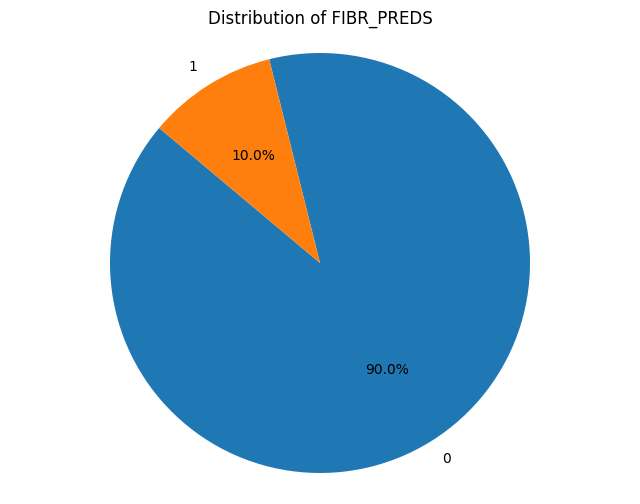

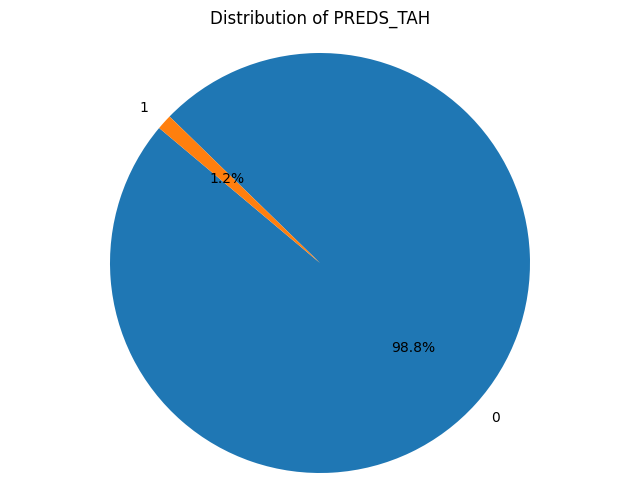

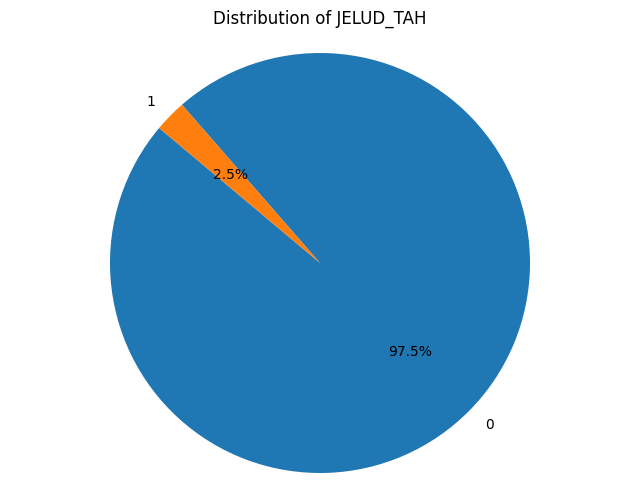

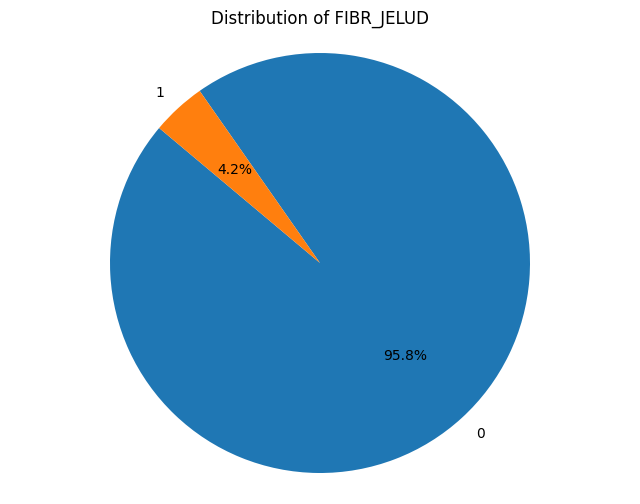

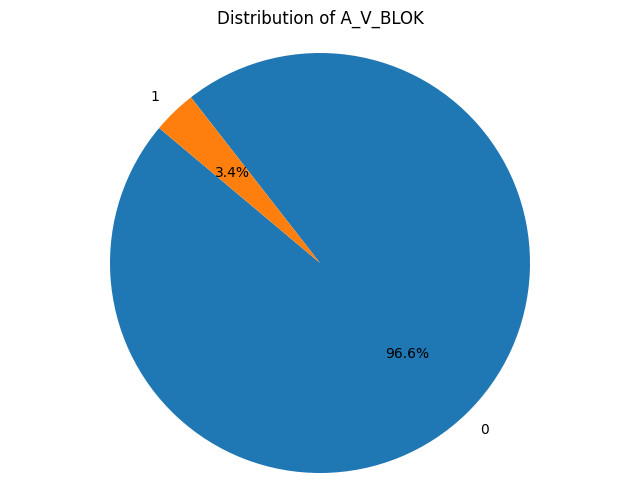

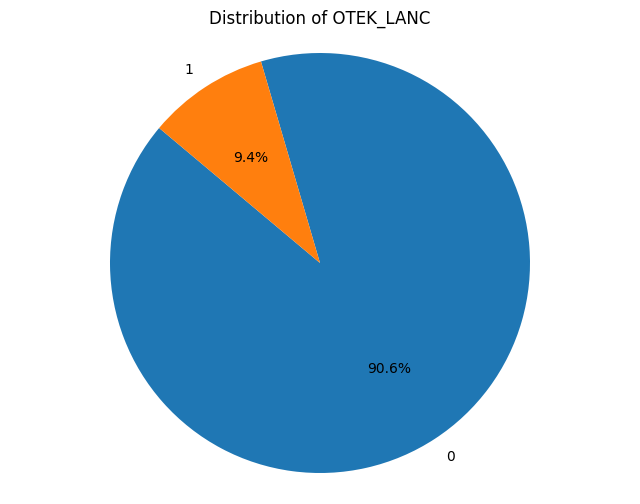

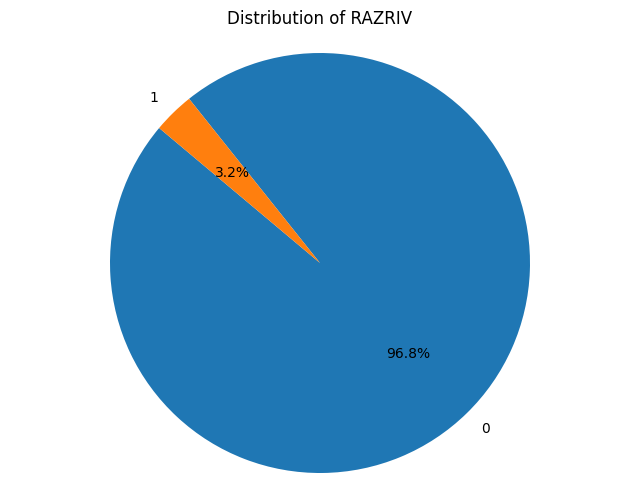

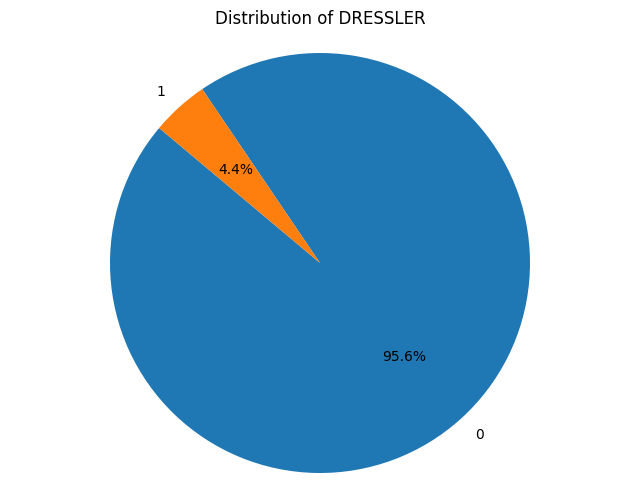

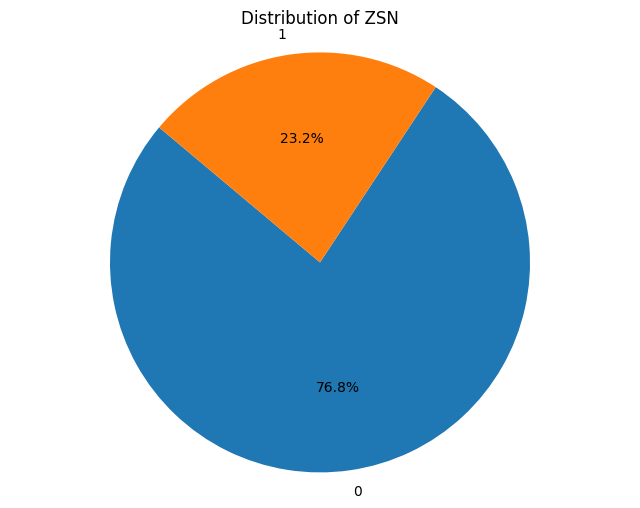

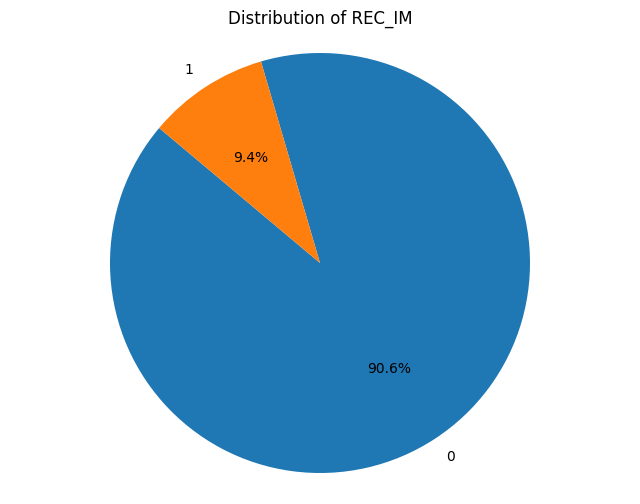

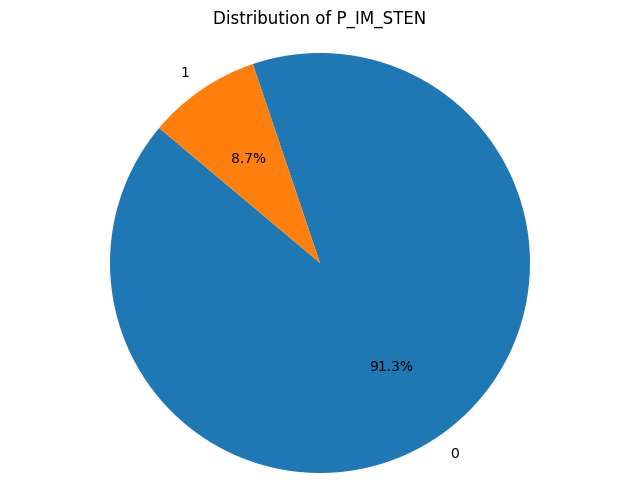

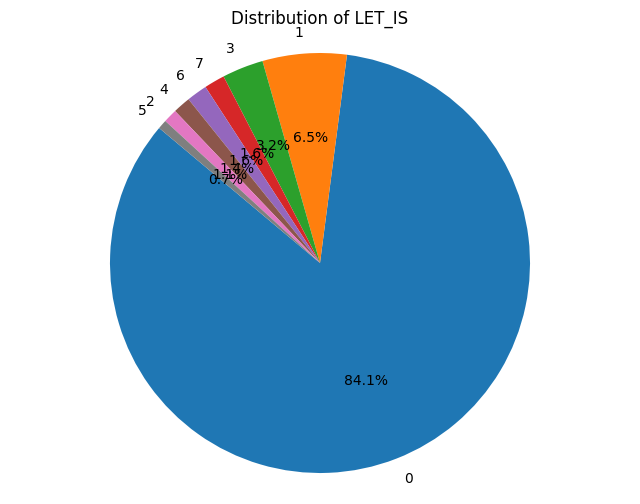

In [86]:
for column in df_cat.columns:
    category_counts = df_cat[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column}')
    plt.axis('equal')
    plt.show()
    if column == 'SEX':
        print("\n" + "=" * 50)
        print("EXPLANATION:")
        print("The pie chart illustrates the distribution of sex among patients:")
        print("  - '0' represents Females")
        print("  - '1' represents Males")
        print("This helps to understand the gender distribution in the dataset.")
        print("=" * 50 + "\n")

### <p style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">3.3 Visualization các biến liên quan đến nhồi máu cơ tim ( thậm chí là tử vong) </p>

<ul style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">
    <li>Biến phản hồi</li>
    <li>LET_IS: Tình trạng cuối cùng (giả sử là biến mục tiêu).</li>
    <li>Biến giải thích</li>
    <li>AGE</li>
    <li>SEX</li>
    <li>INF_ANAM</li>
    <li>STENOK_AN</li>
    <li>FK_STENOK</li>
    <li>IBS_POST</li>
    <li>IBS_NASL</li>
    <li>GB</li>
    <li>SIM_GIPERT</li>
    <li>DLIT_AG</li>
    <li>ZSN_A</li>
    <li>S_AD_KBRIG</li>
    <li>D_AD_KBRIG</li>
    <li>S_AD_ORIT</li>
    <li>D_AD_ORIT</li>
    <li>O_L_POST</li>
    <li>K_SH_POST</li>
</ul>

<li style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">Biểu đồ phân tán cho huyết áp tâm thu và huyết áp tâm trương</li>

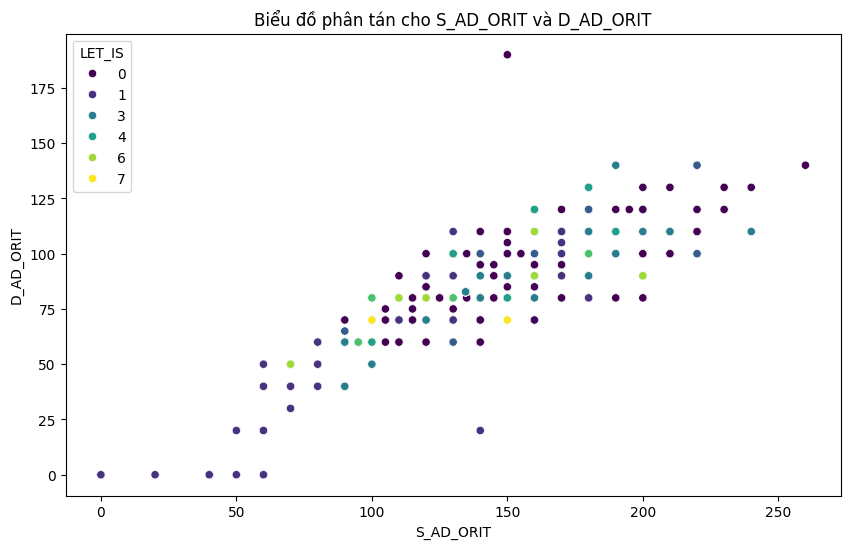

In [87]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='S_AD_ORIT', y='D_AD_ORIT', hue='LET_IS', data=df, palette='viridis')
scatter_plot.set_title('Biểu đồ phân tán cho S_AD_ORIT và D_AD_ORIT')
plt.xlabel('S_AD_ORIT')
plt.ylabel('D_AD_ORIT')
plt.legend(title='LET_IS')
plt.show()

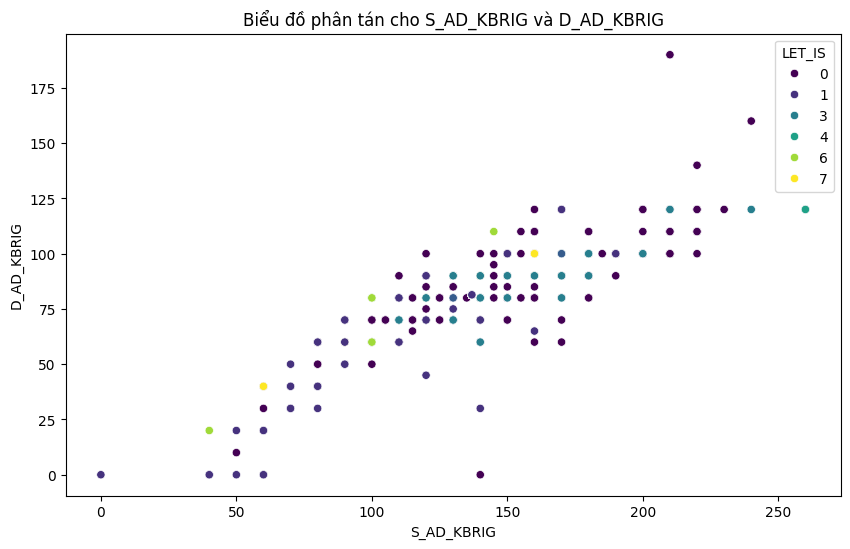

In [88]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='S_AD_KBRIG', y='D_AD_KBRIG', hue='LET_IS', data=df, palette='viridis')
scatter_plot.set_title('Biểu đồ phân tán cho S_AD_KBRIG và D_AD_KBRIG')
plt.xlabel('S_AD_KBRIG')
plt.ylabel('D_AD_KBRIG')
plt.legend(title='LET_IS')
plt.show()

<li style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">Biểu đồ boxplot cho lượng kali có ở trong máu và natri có ở trong máu</li>

Text(0, 0.5, 'K_BLOOD')

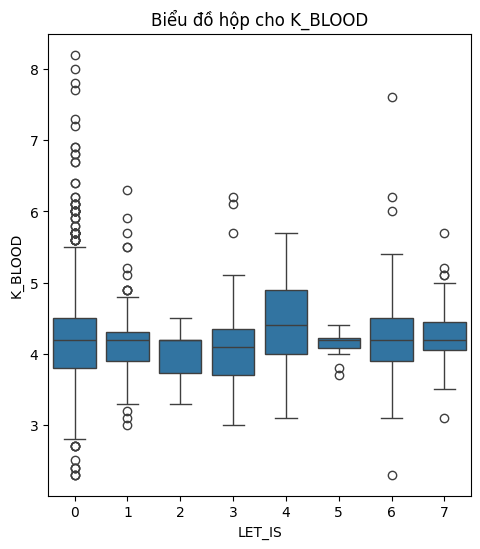

In [89]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
box_plot_k = sns.boxplot(x='LET_IS', y='K_BLOOD', data=df)
box_plot_k.set_title('Biểu đồ hộp cho K_BLOOD')
plt.xlabel('LET_IS')
plt.ylabel('K_BLOOD')

Text(0, 0.5, 'K_BLOOD')

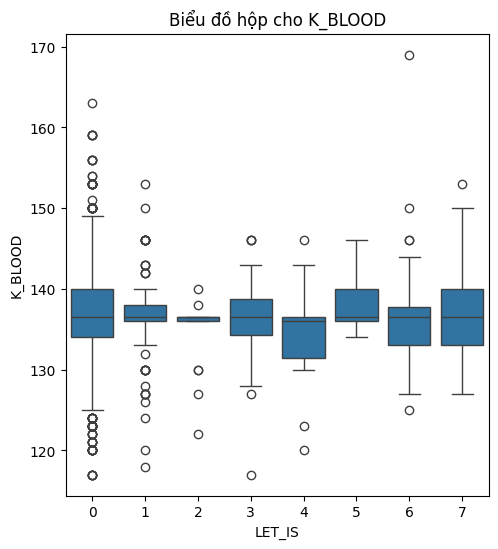

In [90]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
box_plot_k = sns.boxplot(x='LET_IS', y='NA_BLOOD', data=df)
box_plot_k.set_title('Biểu đồ hộp cho K_BLOOD')
plt.xlabel('LET_IS')
plt.ylabel('K_BLOOD')

<li style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">Biểu đồ cột về tuổi</li>

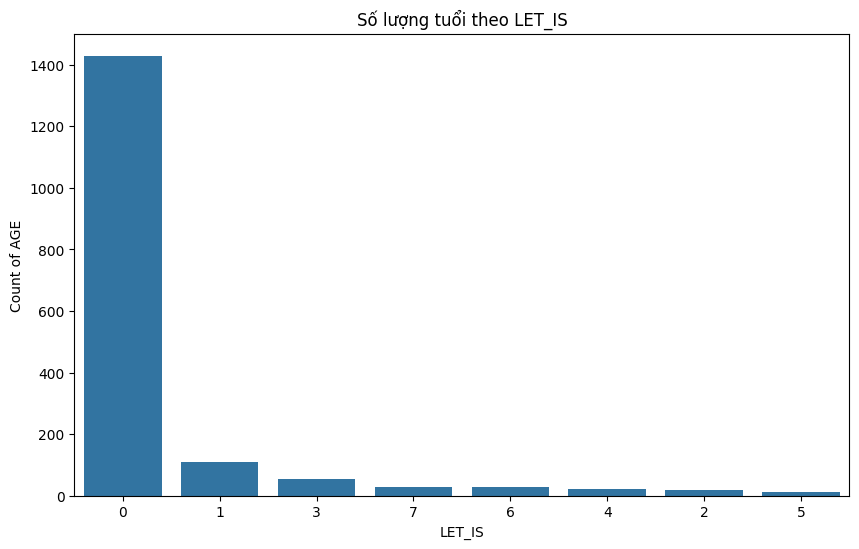

In [91]:
plt.figure(figsize=(10, 6))
count_plot_age = sns.countplot(x='LET_IS', data=df, order=df['LET_IS'].value_counts().index)
count_plot_age.set_title('Số lượng tuổi theo LET_IS')
plt.xlabel('LET_IS')
plt.ylabel('Count of AGE')
plt.show()

<li style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">Biểu đồ phân tán về giới tính</li>

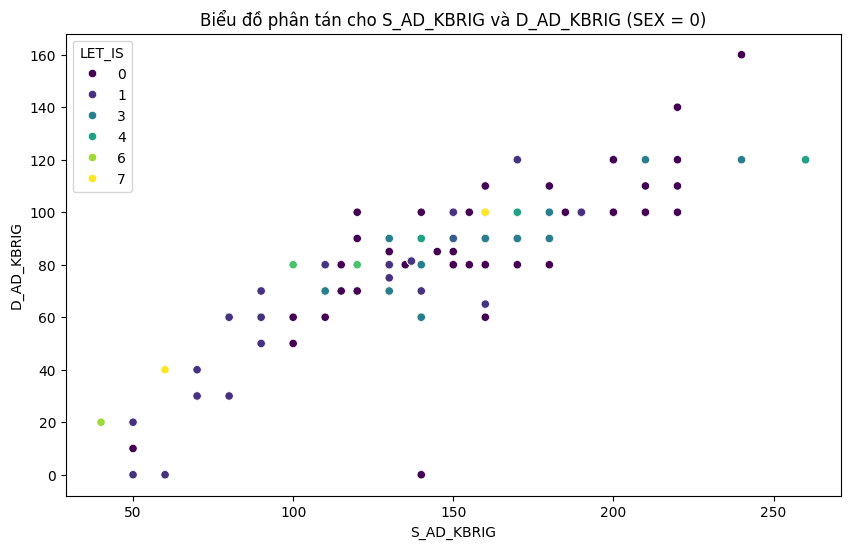

In [92]:
data_sex_0 = df[df['SEX'] == 0]
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='S_AD_KBRIG', y='D_AD_KBRIG', hue='LET_IS', data=data_sex_0, palette='viridis')
scatter_plot.set_title('Biểu đồ phân tán cho S_AD_KBRIG và D_AD_KBRIG (SEX = 0)')
plt.xlabel('S_AD_KBRIG')
plt.ylabel('D_AD_KBRIG')
plt.legend(title='LET_IS')
plt.show()

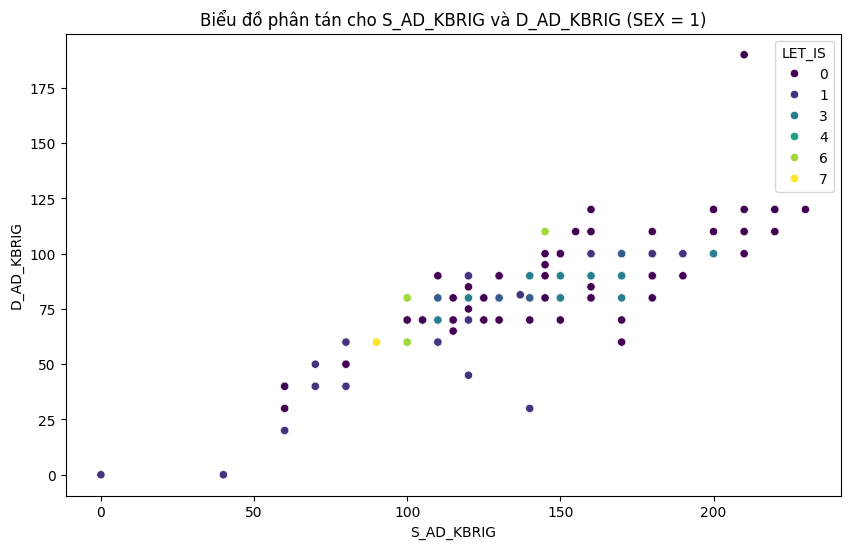

In [93]:
data_sex_1 = df[df['SEX'] == 1]
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='S_AD_KBRIG', y='D_AD_KBRIG', hue='LET_IS', data=data_sex_1, palette='viridis')
scatter_plot.set_title('Biểu đồ phân tán cho S_AD_KBRIG và D_AD_KBRIG (SEX = 1)')
plt.xlabel('S_AD_KBRIG')
plt.ylabel('D_AD_KBRIG')
plt.legend(title='LET_IS')
plt.show()


<li style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">Biểu đồ boxplot nồng độ alanine aminotransferase trong máu </li>

Text(0, 0.5, 'Nồng độ ALT trong máu')

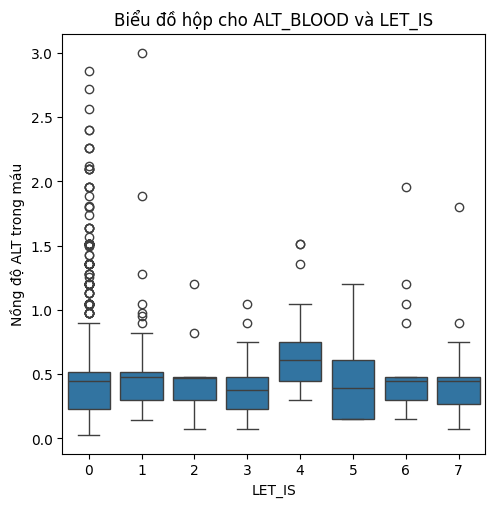

In [94]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
box_plot_alt = sns.boxplot(x='LET_IS', y='ALT_BLOOD', data=df)
box_plot_alt.set_title('Biểu đồ hộp cho ALT_BLOOD và LET_IS')
plt.xlabel('LET_IS')
plt.ylabel('Nồng độ ALT trong máu')

<li style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">Biểu đồ boxplot Nồng độ aspartate aminotransferase trong máu </li>

Text(0, 0.5, 'Nồng độ AST trong máu')

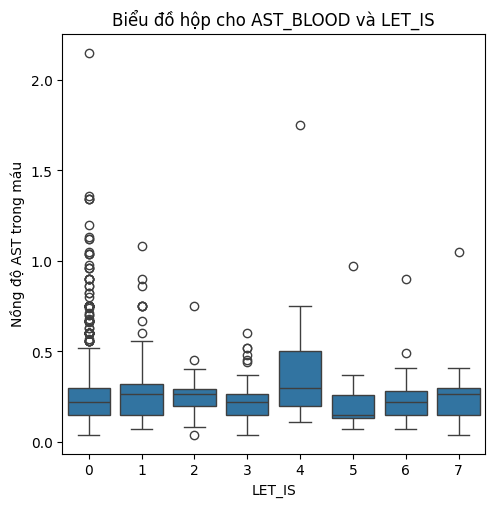

In [95]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 2)
box_plot_ast = sns.boxplot(x='LET_IS', y='AST_BLOOD', data=df)
box_plot_ast.set_title('Biểu đồ hộp cho AST_BLOOD và LET_IS')
plt.xlabel('LET_IS')
plt.ylabel('Nồng độ AST trong máu')

<li style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">Biểu đồ boxplot Nồng độ Nồng độ creatine kinase trong máu </li>

Text(0, 0.5, 'Nồng độ KFK trong máu')

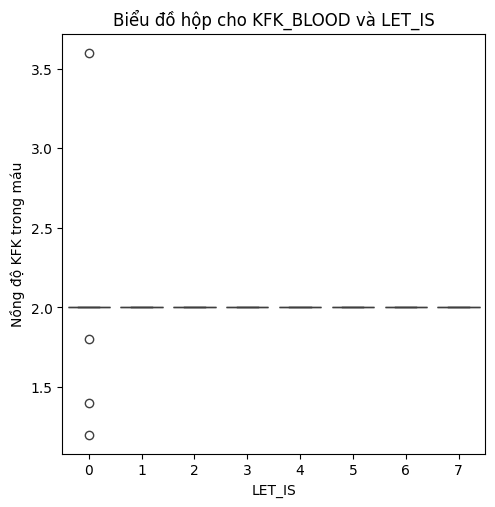

In [96]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 3)
box_plot_kfk = sns.boxplot(x='LET_IS', y='KFK_BLOOD', data=df)
box_plot_kfk.set_title('Biểu đồ hộp cho KFK_BLOOD và LET_IS')
plt.xlabel('LET_IS')
plt.ylabel('Nồng độ KFK trong máu')

<li style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">Biểu đồ boxplot Nồng độ Nồng độ Nồng độ leukocytes trong máu </li>

Text(0, 0.5, 'Nồng độ L trong máu')

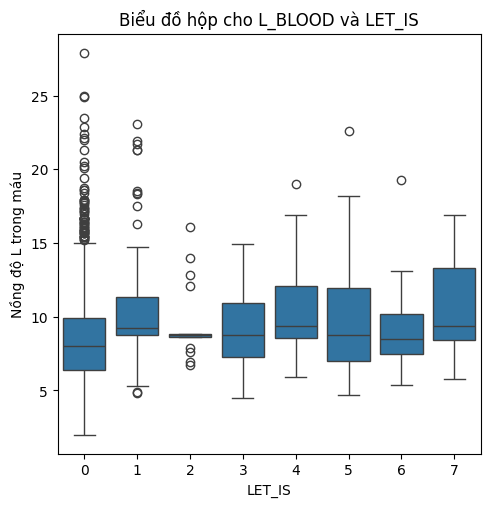

In [97]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 4)
box_plot_l = sns.boxplot(x='LET_IS', y='L_BLOOD', data=df)
box_plot_l.set_title('Biểu đồ hộp cho L_BLOOD và LET_IS')
plt.xlabel('LET_IS')
plt.ylabel('Nồng độ L trong máu')

<li style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">Biểu đồ dạng line bệnh tăng huyết áp </li>

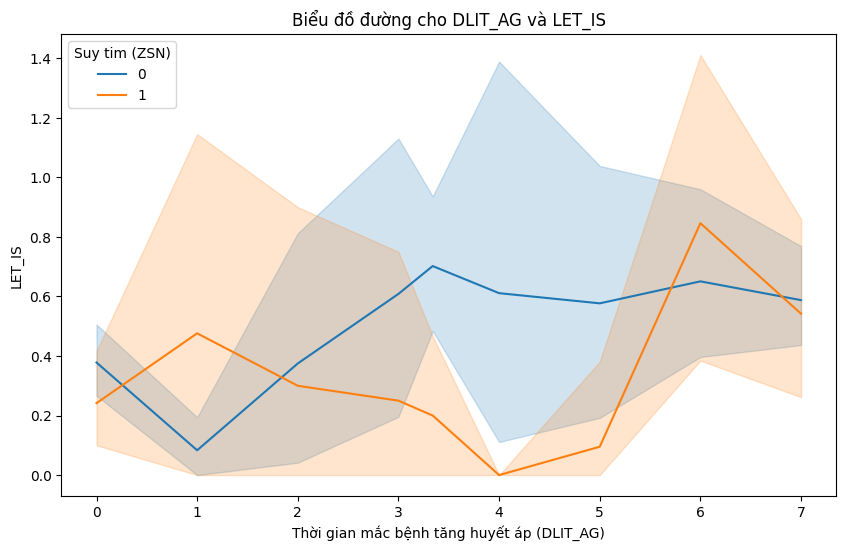

In [98]:
plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(x='DLIT_AG', y='LET_IS', hue='ZSN', data=df, markers=True)
line_plot.set_title('Biểu đồ đường cho DLIT_AG và LET_IS')
plt.xlabel('Thời gian mắc bệnh tăng huyết áp (DLIT_AG)')
plt.ylabel('LET_IS')
plt.legend(title='Suy tim (ZSN)')
plt.show()

## <p style="font-family: 'Comic Sans MS'; background-color: #ADD8E6; color: #000080; padding: 10px; font-weight: bold; text-align: center;">4. Xây dựng mô hình</p>

### <p style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">4.1 Train test split</p>

In [99]:
X = df[['AGE', 'SEX', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'S_AD_KBRIG', 'D_AD_KBRIG', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK']]
y = df['LET_IS']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_ = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

In [107]:
rs = 100
cv = RepeatedKFold(n_splits=10 , n_repeats=5, random_state=rs)

### <p style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">4.2 Logistic Regression</p>

In [109]:
def objective_lr(trial):
    
    param_logr = {'C' : trial.suggest_float("C", 0.001, 10.0, log=True),
    'solver' : trial.suggest_categorical('solver',["newton-cg", "lbfgs", "liblinear", "sag", "saga"]),
    'max_iter' : trial.suggest_int("max_iter", 1, 10000)
    }

    lr = make_pipeline(StandardScaler(),LogisticRegression(**param_logr,random_state=rs))
    lr.fit(X_train, y_train)
    score = cross_val_score(lr, X_train, y_train, cv=cv, scoring="accuracy").mean()
    return score

In [110]:
study_lr = optuna.create_study(direction='maximize',study_name = "logr")
study_lr.optimize(objective_lr, n_trials=500)

[I 2024-12-13 00:00:58,325] A new study created in memory with name: logr
[I 2024-12-13 00:00:59,091] Trial 0 finished with value: 0.8355882352941176 and parameters: {'C': 2.061139115577011, 'solver': 'newton-cg', 'max_iter': 741}. Best is trial 0 with value: 0.8355882352941176.
[I 2024-12-13 00:00:59,665] Trial 1 finished with value: 0.8364705882352942 and parameters: {'C': 1.1091046756775738, 'solver': 'lbfgs', 'max_iter': 856}. Best is trial 1 with value: 0.8364705882352942.
[I 2024-12-13 00:01:03,821] Trial 2 finished with value: 0.8410294117647059 and parameters: {'C': 0.016413536898785146, 'solver': 'saga', 'max_iter': 8251}. Best is trial 2 with value: 0.8410294117647059.
[I 2024-12-13 00:01:04,367] Trial 3 finished with value: 0.8401470588235295 and parameters: {'C': 0.0036617226761348027, 'solver': 'newton-cg', 'max_iter': 8934}. Best is trial 2 with value: 0.8410294117647059.
[I 2024-12-13 00:01:27,090] Trial 4 finished with value: 0.8358823529411765 and parameters: {'C': 1.7

In [111]:
print("Best trial:", study_lr.best_trial.number)
print("Best accuracy:", study_lr.best_trial.value)
print("Best hyperparameters:", study_lr.best_params)

Best trial: 55
Best accuracy: 0.8419117647058824
Best hyperparameters: {'C': 0.027263843819138836, 'solver': 'newton-cg', 'max_iter': 2946}


              precision    recall  f1-score   support

           0       0.87      0.99      0.93       288
           1       1.00      0.30      0.47        23
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.33      0.25      0.29         4

    accuracy                           0.86       340
   macro avg       0.28      0.19      0.21       340
weighted avg       0.81      0.86      0.82       340



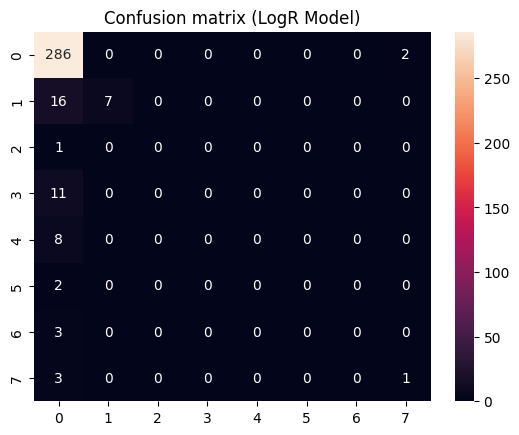

In [113]:
best_param_logr = study_lr.best_params
LR_pipe = make_pipeline(StandardScaler(),LogisticRegression(**best_param_logr)).fit(X_train,y_train)
y_pred_lr = LR_pipe.predict(X_test)

def display_results(y_test, y_pred, cm_title):
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='d').set_title(cm_title)
    print(classification_report(y_test,y_pred))
    
display_results(y_test, y_pred_lr, cm_title = "Confusion matrix (LogR Model)")

### <p style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">4.3 SVM</p>

In [116]:
def objective_svm(trial):
    param_grid = {
         'C': trial.suggest_float("C", 0.01, 10.0, log=True),
         'kernel': trial.suggest_categorical('kernel', ['linear' , 'poly' , 'rbf' , 'sigmoid']),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto'])
         }

    svm = make_pipeline(StandardScaler(),SVC(**param_grid,random_state=42))
    svm.fit(X_train, y_train)

    score = cross_val_score(svm, X_train, y_train, cv=cv, scoring="accuracy").mean()
    return score

In [117]:
study_svm = optuna.create_study(direction='maximize',study_name = "Svm")
study_svm.optimize(objective_svm, n_trials=500)

[I 2024-12-13 00:18:24,214] A new study created in memory with name: Svm
[I 2024-12-13 00:18:25,068] Trial 0 finished with value: 0.838970588235294 and parameters: {'C': 0.17392746392061273, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 0 with value: 0.838970588235294.
[I 2024-12-13 00:18:27,016] Trial 1 finished with value: 0.8413235294117647 and parameters: {'C': 0.4862910658973688, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 1 with value: 0.8413235294117647.
[I 2024-12-13 00:18:28,000] Trial 2 finished with value: 0.8419117647058824 and parameters: {'C': 0.021676881029276722, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 2 with value: 0.8419117647058824.
[I 2024-12-13 00:18:30,187] Trial 3 finished with value: 0.8297058823529413 and parameters: {'C': 5.931659276887445, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 2 with value: 0.8419117647058824.
[I 2024-12-13 00:18:32,144] Trial 4 finished with value: 0.8413235294117647 and parameters: {'C': 0.4859568637765617,

In [118]:
print("Best trial:", study_svm.best_trial.number)
print("Best accuracy:", study_svm.best_trial.value)
print("Best hyperparameters:", study_svm.best_params)

Best trial: 28
Best accuracy: 0.8438235294117648
Best hyperparameters: {'C': 1.37683860911336, 'kernel': 'rbf', 'gamma': 'auto'}


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       288
           1       0.80      0.17      0.29        23
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       1.00      0.25      0.40         4

    accuracy                           0.86       340
   macro avg       0.33      0.18      0.20       340
weighted avg       0.79      0.86      0.81       340



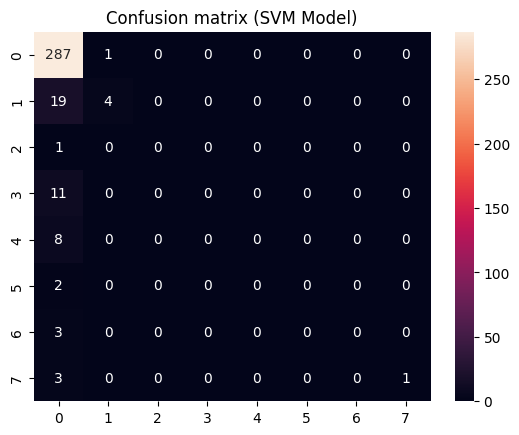

In [119]:
best_param_svm = study_svm.best_params
Svm_pipe = make_pipeline(StandardScaler(),SVC(**best_param_svm,random_state=42)).fit(X_train,y_train)
y_pred_dect = Svm_pipe.predict(X_test)  

display_results(y_test, y_pred_dect, cm_title = "Confusion matrix (SVM Model)")

### <p style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">4.4 Decision Tree</p>

In [123]:
def objective_dect(trial):
    param_dect = {'max_depth' : trial.suggest_int("max_depth", 2, 64),
                  'ccp_alpha' :trial.suggest_float('ccp_alpha',0.001, 10.0, log=True),
                  'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                  'min_samples_split' : trial.suggest_int("min_samples_split", 2, 30),
                  'min_samples_leaf' : trial.suggest_int("min_samples_leaf", 1, 30),
                  'criterion' : trial.suggest_categorical("criterion", ["gini", "entropy"])}

    dect = make_pipeline(StandardScaler(), DecisionTreeClassifier(**param_dect, random_state=rs))
    dect.fit(X_train, y_train)

    score = cross_val_score(dect, X_train, y_train, cv=cv, scoring="accuracy").mean()

    return score


In [124]:
study_dect = optuna.create_study(direction='maximize',study_name = "Dect")
study_dect.optimize(objective_dect, n_trials=500)

[I 2024-12-13 00:49:06,652] A new study created in memory with name: Dect
[I 2024-12-13 00:49:06,967] Trial 0 finished with value: 0.849264705882353 and parameters: {'max_depth': 49, 'ccp_alpha': 0.01322509998654029, 'max_features': None, 'min_samples_split': 21, 'min_samples_leaf': 27, 'criterion': 'entropy'}. Best is trial 0 with value: 0.849264705882353.
[I 2024-12-13 00:49:07,216] Trial 1 finished with value: 0.8413235294117648 and parameters: {'max_depth': 57, 'ccp_alpha': 0.016309209245388964, 'max_features': 'sqrt', 'min_samples_split': 8, 'min_samples_leaf': 8, 'criterion': 'entropy'}. Best is trial 0 with value: 0.849264705882353.
[I 2024-12-13 00:49:07,547] Trial 2 finished with value: 0.8489705882352943 and parameters: {'max_depth': 39, 'ccp_alpha': 0.031080453220238134, 'max_features': None, 'min_samples_split': 2, 'min_samples_leaf': 16, 'criterion': 'entropy'}. Best is trial 0 with value: 0.849264705882353.
[I 2024-12-13 00:49:07,817] Trial 3 finished with value: 0.838382

In [125]:
print("Best trial:", study_dect.best_trial.number)
print("Best accuracy:", study_dect.best_trial.value)
print("Best hyperparameters:", study_dect.best_params)

Best trial: 75
Best accuracy: 0.8494117647058824
Best hyperparameters: {'max_depth': 16, 'ccp_alpha': 0.011001336443722174, 'max_features': None, 'min_samples_split': 21, 'min_samples_leaf': 24, 'criterion': 'entropy'}


              precision    recall  f1-score   support

           0       0.86      1.00      0.93       288
           1       0.43      0.13      0.20        23
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4

    accuracy                           0.86       340
   macro avg       0.16      0.14      0.14       340
weighted avg       0.76      0.86      0.80       340



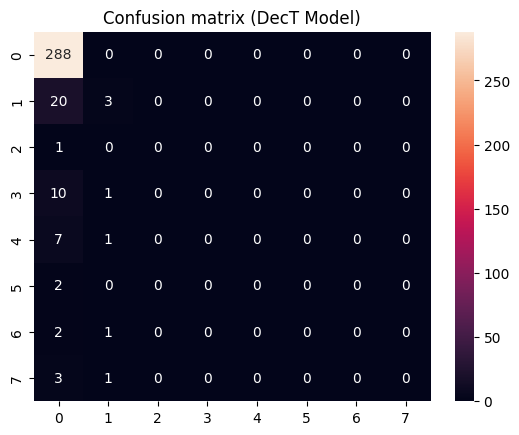

In [126]:
best_param_dect = study_dect.best_params
DecT_pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier(**best_param_dect,random_state=42)).fit(X_train,y_train)

y_pred_dect = DecT_pipe.predict(X_test)
    
display_results(y_test, y_pred_dect, cm_title = "Confusion matrix (DecT Model)")

### <p style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">4.5 Random Forest</p>

In [129]:
def objective_rdf(trial):
    param_grid = {
        'n_estimators': trial.suggest_int("n_estimators", 30, 300, log=True),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        'max_depth': trial.suggest_int("max_depth", 1, 100),
        'min_samples_split': trial.suggest_int("min_samples_split", 2, 30),
        'min_samples_leaf': trial.suggest_int("min_samples_leaf", 1, 30),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    rdf = make_pipeline(StandardScaler(), RandomForestClassifier(**param_grid, random_state=42))
    rdf.fit(X_train, y_train)

    score = cross_val_score(rdf, X_train, y_train, cv=cv, scoring="accuracy").mean()
    return score


In [131]:
study_rdf = optuna.create_study(direction='maximize',study_name = "Rdf")
study_rdf.optimize(objective_rdf, n_trials=50)

[I 2024-12-13 01:08:01,651] A new study created in memory with name: Rdf
[I 2024-12-13 01:08:05,014] Trial 0 finished with value: 0.838970588235294 and parameters: {'n_estimators': 62, 'criterion': 'log_loss', 'max_depth': 84, 'min_samples_split': 9, 'min_samples_leaf': 28, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.838970588235294.
[I 2024-12-13 01:08:16,708] Trial 1 finished with value: 0.8419117647058825 and parameters: {'n_estimators': 119, 'criterion': 'entropy', 'max_depth': 33, 'min_samples_split': 30, 'min_samples_leaf': 23, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.8419117647058825.
[I 2024-12-13 01:08:28,398] Trial 2 finished with value: 0.838970588235294 and parameters: {'n_estimators': 142, 'criterion': 'gini', 'max_depth': 34, 'min_samples_split': 19, 'min_samples_leaf': 29, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.8419117647058825.
[I 2024-12-13 01:08:34,872] Trial 3 finished with

In [132]:
print("Best trial:", study_rdf.best_trial.number)
print("Best accuracy:", study_rdf.best_trial.value)
print("Best hyperparameters:", study_rdf.best_params)

Best trial: 12
Best accuracy: 0.8488235294117648
Best hyperparameters: {'n_estimators': 286, 'criterion': 'log_loss', 'max_depth': 3, 'min_samples_split': 27, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': False}


              precision    recall  f1-score   support

           0       0.86      1.00      0.93       288
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        11
           4       0.25      0.12      0.17         8
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4

    accuracy                           0.85       340
   macro avg       0.14      0.14      0.14       340
weighted avg       0.74      0.85      0.79       340



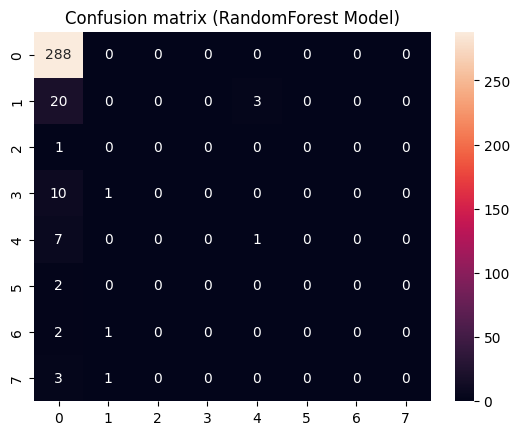

In [133]:
best_param_rdf = study_rdf.best_params

rdf_pipe = make_pipeline(StandardScaler(),RandomForestClassifier(**best_param_rdf,random_state=42)).fit(X_train,y_train)
# Svm = SVC(**best_param_svm,random_state=42).fit(X_train,y_train)

y_pred_dect = rdf_pipe.predict(X_test)
    

display_results(y_test, y_pred_dect, cm_title = "Confusion matrix (RandomForest Model)")

### <p style="font-family: 'Comic Sans MS'; padding: 10px; font-weight: bold;">4.6 Save model</p>

In [137]:
pip install onnx

  Using cached skl2onnx-1.17.0-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached onnx-1.17.0.tar.gz (12.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached onnxconverter_common-1.14.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached protobuf-5.29.1-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached protobuf-3.20.2-py2.py3-none-any.whl.metadata (720 bytes)
Using cached skl2onnx-1.17.0-py2.py3-none-any.whl (298 kB)
Using cached onnxconverter_common-1.14.0-py2.py3-none-any.whl (84 kB)
Using cached protobuf-3.20.2-py2.py3-none-any.whl (162 kB)
Failed to build onnx
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for onnx (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1277 lines of output]
      running bdist_wheel
      running build
      running build_py
      copying onnx\checker.py -> build\lib.win-amd64-cpython-313\onnx
      copying onnx\compose.py -> build\lib.win-amd64-cpython-313\onnx
      copying onnx\external_data_helper.py -> build\lib.win-amd64-cpython-313\onnx
      copying onnx\gen_proto.py -> build\lib.win-amd64-cpython-313\onnx
      copying onnx\helper.py -> build\lib.win-amd64-cpython-313\onnx
      copying onnx\hub.py -> build\lib.win-amd64-cpython-313\onnx
      copying onnx\inliner.py -> build\lib.win-amd64-cpython-313\onnx
      copying onnx\mapping.py -> build\lib.win-amd64-cpython-313\onnx
      copying onnx\model_container.py -> build\lib.win-amd64-cpython-313\onnx
      copying onnx\numpy_helper.py -> build\lib.win-amd64-cpython-313\onnx
      copying onnx\parser.py -> build\lib.win-amd6

In [139]:
from skl2onnx import to_onnx
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

# Tạo mô hình ONNX

initial_type = [('input', FloatTensorType([None, 8]))]
onnx_model = convert_sklearn(rdf_pipe, initial_types=initial_type)

# Lưu mô hình ONNX vào tệp
with open("rdr_diabetes.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

ModuleNotFoundError: No module named 'skl2onnx'